# Predicting Coupon Acceptance on E-Commerce Platforms

### Problem Statement: The objective of this project is to apply machine learning techniques to analyze driving scenarios and user attributes from data collected on an e-commerce platform. By predicting the likelihood of users accepting coupons during their journeys, the project aims to optimize the platform’s coupon distribution strategies. This, in turn, will enhance user engagement by offering timely and relevant promotions, ultimately improving the platform’s overall effectiveness in driving customer interactions and sales.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)
df=pd.read_csv('Ds_Data.csv')
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [4]:
df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Accept(Y/N?)             2
dtype: int64

In [5]:
df.shape

(12684, 25)

In [6]:
df.duplicated().sum()

291

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(12393, 25)

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12287
Bar                       106
CoffeeHouse               215
CarryAway                 148
RestaurantLessThan20      128
Restaurant20To50          188
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64

In [11]:
df.isnull().sum()/df.shape[0]*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.144678
Bar                      0.855322
CoffeeHouse              1.734850
CarryAway                1.194223
RestaurantLessThan20     1.032841
Restaurant20To50         1.516985
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Accept(Y/N?)             0.000000
dtype: float64

In [12]:
lst=["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]
for i in lst:
    print(df[i].value_counts())
    print()

Bar
never    5089
less1    3383
1~3      2432
4~8      1045
gt8       338
Name: count, dtype: int64

CoffeeHouse
less1    3310
1~3      3138
never    2895
4~8      1752
gt8      1083
Name: count, dtype: int64

CarryAway
1~3      4571
4~8      4171
less1    1819
gt8      1535
never     149
Name: count, dtype: int64

RestaurantLessThan20
1~3      5269
4~8      3493
less1    2034
gt8      1253
never     216
Name: count, dtype: int64

Restaurant20To50
less1    5946
1~3      3204
never    2083
4~8       718
gt8       254
Name: count, dtype: int64



#### Dropping "car" column as it has 99% of missing values.
#### Imputing missing values in the columns "Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50" with their respective mode values as they are object type.

In [13]:
df=df.drop(columns='car',axis=1)

In [14]:
for i in lst:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [15]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept(Y/N?)            0
dtype: int64

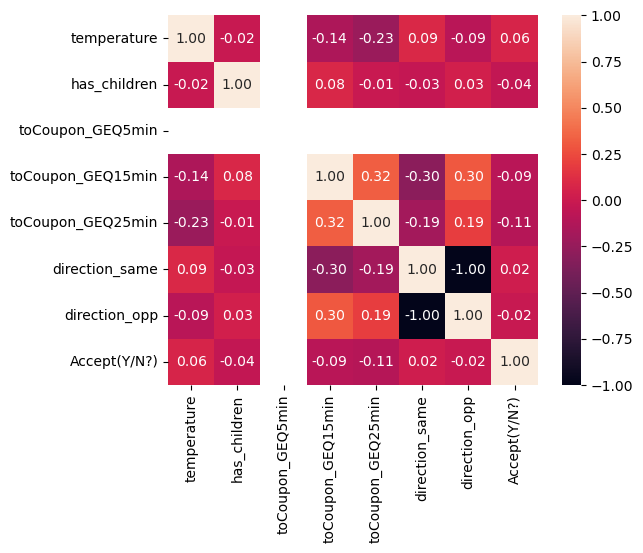

In [16]:
#Checking correlation between numerical features and target

numeric_features = df.select_dtypes(include=['int', 'float']).columns
df_numeric = df[numeric_features]
df_numeric.corr()
sns.heatmap(df_numeric.corr(), cbar=True, annot=True, square=True, fmt='.2f')
plt.show()

#### 1. The feature 'direction_same' is perfectly correlated with 'direction_opp'.
#### 2. The feature 'toCoupon_GEQ5min' shows no correlation with other features, as it holds a constant value of '1' for all observations, indicating that all restaurants/bars are at least five minutes away from the driver. 
#### As a result, dropping the 'direction_opp' and 'toCoupon_GEQ5min' features from the analysis.

In [17]:
df.drop(['direction_opp','toCoupon_GEQ5min'], axis=1, inplace=True)

#### Renaming Target Column

In [18]:
df.rename(columns={'Accept(Y/N?)':'Target'},inplace=True)

In [19]:
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Target
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0


#### Ananlyzing the affect of certain features on the acceptance and rejection of the coupons

In [20]:
def analysis(df, feature):
    df1 = pd.DataFrame(sorted(list(df[feature].unique())),columns=[feature])
    df1['Total'] = sorted(list(df.groupby(feature).Target.count()))
    df1['Total%'] = round(df1['Total']/df[feature].shape[0]*100,2)
    df1['Accepted'] = sorted(list(df[df.Target==1].groupby(feature).Target.count()))
    df1['Rejected'] = sorted(list(df[df.Target==0].groupby(feature).Target.count()))
    df1['%Accepted'] = round(df1['Accepted']/df1['Total']*100,2)
    df1['%Rejected'] = round(df1['Rejected']/df1['Total']*100,2)
    df1 = df1.sort_values(by='Total', ascending=True)
    
    fig = plt.subplots(figsize =(8, 4))
    plt.barh(df1[feature],df1['Total'],color='black')
    plt.barh(df1[feature],df1['Accepted'],color='red')
    plt.legend(labels=['Total','Accepted'])
    plt.xlabel('Count')
    plt.title(feature+' wise accepted coupons')

    return df1

#### 1. direction_same

,direction_same,Total,Total%,Accepted,Rejected,%Accepted,%Rejected
0,0,2649,21.37,1540,1109,58.14,41.86
1,1,9744,78.63,5472,4272,56.16,43.84


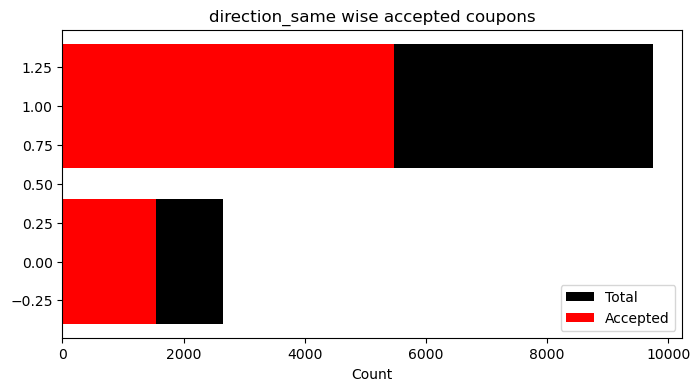

In [21]:
analysis(df,'direction_same')

#### Approximately 78% of travelers are heading in the opposite direction to where the coupons can be used, while only 21% are traveling in the same direction. Despite this, the coupon acceptance rate is nearly identical in both cases. Therefore, the feature 'direction_same' does not significantly contribute to predicting the target variable and can be considered uninformative.

In [22]:
df.drop(['direction_same'], axis=1, inplace=True)

#### 2. destination

,destination,Total,Total%,Accepted,Rejected,%Accepted,%Rejected
0,Home,3114,25.13,1553,1561,49.87,50.13
1,No Urgent Place,3161,25.51,1594,1567,50.43,49.57
2,Work,6118,49.37,3865,2253,63.17,36.83


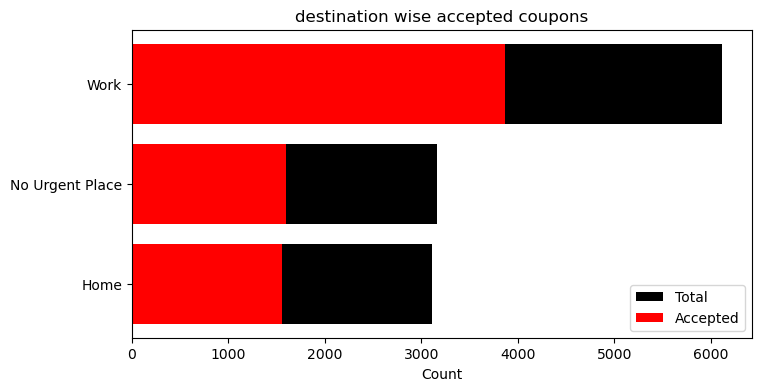

In [23]:
analysis(df,'destination')

#### Approximately 50% of travelers have no urgent destination, with a coupon acceptance rate of 63%. The other 50% are either commuting to work or returning home, and both groups exhibit a similar coupon acceptance rate.

#### 3. passanger

,passanger,Total,Total%,Accepted,Rejected,%Accepted,%Rejected
0,Alone,981,7.92,491,434,50.05,44.24
1,Friend(s),1068,8.62,634,490,59.36,45.88
2,Kid(s),3166,25.55,2127,1039,67.18,32.82
3,Partner,7178,57.92,3760,3418,52.38,47.62


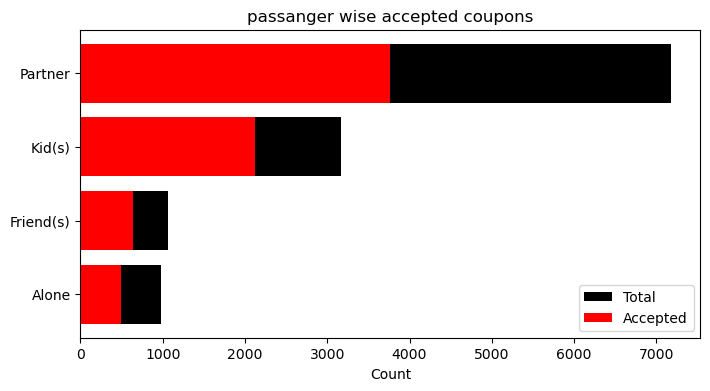

In [24]:
analysis(df,'passanger')

#### Approximately 58% of individuals in our dataset travel alone, while 25% travel with friends, 9% with a partner, and 8% with children. Interestingly, coupon acceptance is higher among those traveling with a passenger compared to those traveling solo.

#### 4. occupation

,occupation,Total,Total%,Accepted,Rejected,%Accepted,%Rejected
0,Architecture & Engineering,41,0.33,21,18,51.22,43.90
1,Arts Design Entertainment Sports & Media,42,0.34,24,20,57.14,47.62
2,Building & Grounds Cleaning & Maintenance,108,0.87,67,41,62.04,37.96
3,Business & Financial,129,1.04,69,47,53.49,36.43
4,Community & Social Services,150,1.21,95,60,63.33,40.00
5,Computer & Mathematical,168,1.36,97,62,57.74,36.90
6,Construction & Extraction,172,1.39,103,62,59.88,36.05
7,Education&Training&Library,172,1.39,103,71,59.88,41.28
8,Farming Fishing & Forestry,172,1.39,110,71,63.95,41.28
9,Food Preparation & Serving Related,214,1.73,110,77,51.40,35.98


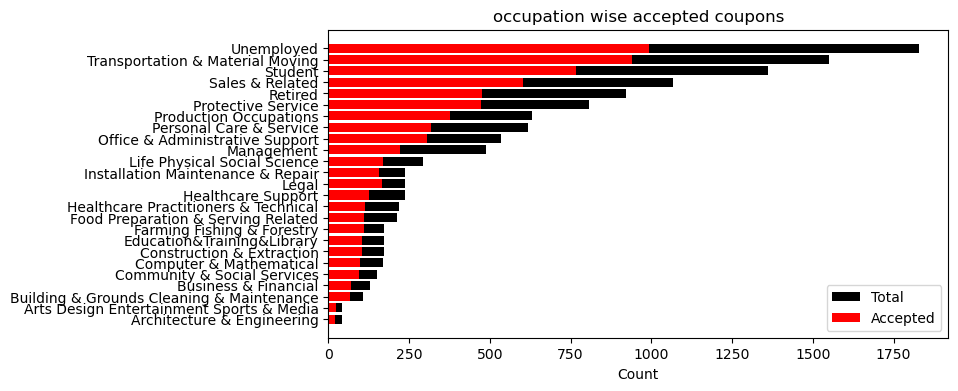

In [25]:
analysis(df,'occupation')

#### Data shows that certain occupations, particularly those in healthcare and technical fields, have higher coupon acceptance rates, while others, like retired individuals and legal professionals, tend to reject coupons more frequently.

#### However, the distribution of coupon acceptance and rejection across different occupations does not show significant variance or actionable insights that would meaningfully improve the predictive power of your model.

In [26]:
df.drop(['occupation'],axis=1,inplace=True)

#### 5. coupon

,coupon,Total,Total%,Accepted,Rejected,%Accepted,%Rejected
0,Bar,1487,12.00,656,610,44.12,41.02
1,Carry out & Take away,2010,16.22,824,784,41.00,39.00
2,Coffee House,2275,18.36,1665,831,73.19,36.53
3,Restaurant(20-50),2708,21.85,1924,1186,71.05,43.80
4,Restaurant(<20),3913,31.57,1943,1970,49.65,50.35


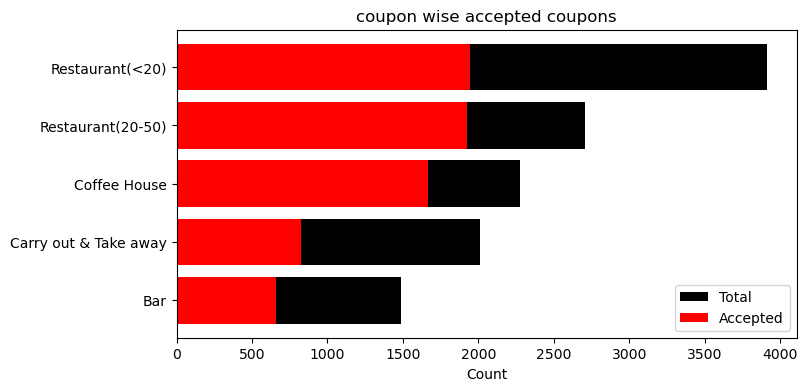

In [27]:
analysis(df,'coupon')

#### Carry out & Take away and Restaurant(<20) coupons are the most successful in terms of acceptance and should be prioritized in coupon distribution strategies.
#### Bar and Restaurant(20-50) coupons have lower acceptance rates and higher rejection rates, indicating they might not be as effective or relevant for users. 
#### The Coffee House coupons, despite being the most frequent, have a lower acceptance rate, which might suggest that users find them less attractive or applicable.

#### 6. has_children

,has_children,Total,Total%,Accepted,Rejected,%Accepted,%Rejected
0,0,5150,41.56,2778,2372,53.94,46.06
1,1,7243,58.44,4234,3009,58.46,41.54


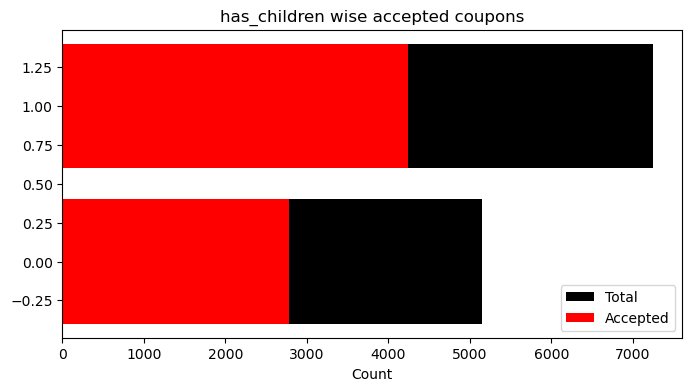

In [28]:
analysis(df,'has_children')

#### Individuals without children (58.46%) are slightly more likely to accept coupons compared to those with children (53.94%). This suggests that people without children may be more responsive to promotional offers, possibly due to fewer financial or time constraints compared to individuals with children.

#### 7. income

,income,Total,Total%,Accepted,Rejected,%Accepted,%Rejected
0,$100000 or More,832,6.71,407,395,48.92,47.48
1,$12500 - $24999,844,6.81,437,409,51.78,48.46
2,$25000 - $37499,865,6.98,456,420,52.72,48.55
3,$37500 - $49999,1013,8.17,593,437,58.54,43.14
4,$50000 - $62499,1624,13.10,964,660,59.36,40.64
5,$62500 - $74999,1688,13.62,974,714,57.70,42.30
6,$75000 - $87499,1760,14.20,987,766,56.08,43.52
7,$87500 - $99999,1795,14.48,1029,773,57.33,43.06
8,Less than $12500,1972,15.91,1165,807,59.08,40.92


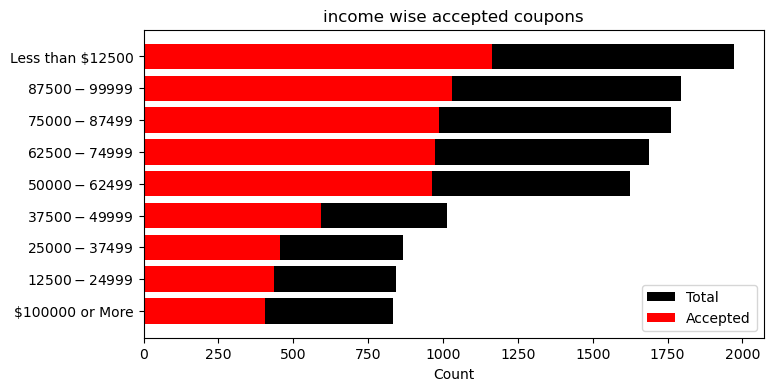

In [29]:
analysis(df,'income')

#### Acceptance rates tend to be higher in mid-income brackets and lower in high-income brackets.
#### Coupons are more effectively received by individuals in mid-income brackets. Higher-income individuals tend to accept coupons less frequently, possibly indicating lower sensitivity to promotional offers or a preference for different types of incentives.

#### 8. age

,age,Total,Total%,Accepted,Rejected,%Accepted,%Rejected
0,21,537,4.33,338,199,62.94,37.06
1,26,660,5.33,378,282,57.27,42.73
2,31,1079,8.71,618,461,57.28,42.72
3,36,1293,10.43,687,606,53.13,46.87
4,41,1756,14.17,888,868,50.57,49.43
5,46,1984,16.01,1079,905,54.39,45.61
6,50plus,2486,20.06,1475,1011,59.33,40.67
7,below21,2598,20.96,1549,1049,59.62,40.38


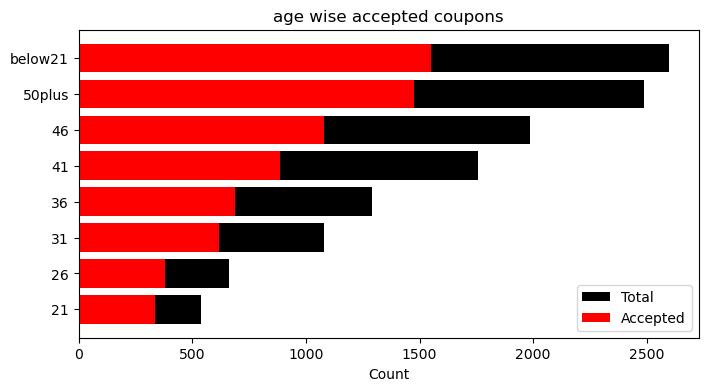

In [30]:
analysis(df,'age')

#### Coupon acceptance is higher among younger individuals, especially those below 21, and decreases with age. Older age groups, particularly those over 50, are less responsive to coupons compared to younger demographics.

#### 9. gender

,gender,Total,Total%,Accepted,Rejected,%Accepted,%Rejected
0,Female,6038,48.72,3460,2486,57.30,41.17
1,Male,6355,51.28,3552,2895,55.89,45.55


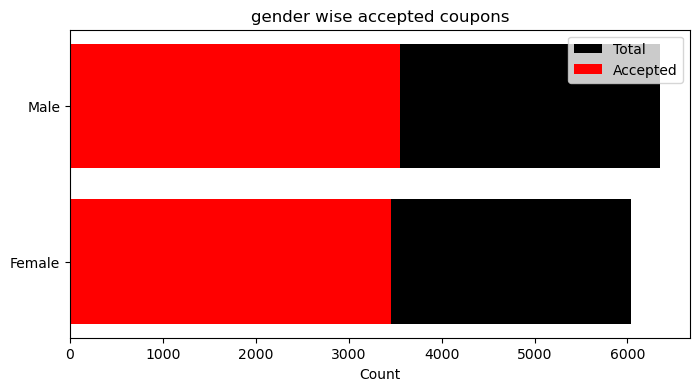

In [31]:
analysis(df,'gender')

#### Males are more likely to accept coupons and less likely to reject them compared to females. The difference in acceptance rates between genders is relatively modest, but males show slightly higher engagement with coupons.

#### 10. weather

,weather,Total,Total%,Accepted,Rejected,%Accepted,%Rejected
0,Rainy,1202,9.70,557,645,46.34,53.66
1,Snowy,1329,10.72,605,724,45.52,54.48
2,Sunny,9862,79.58,5850,4012,59.32,40.68


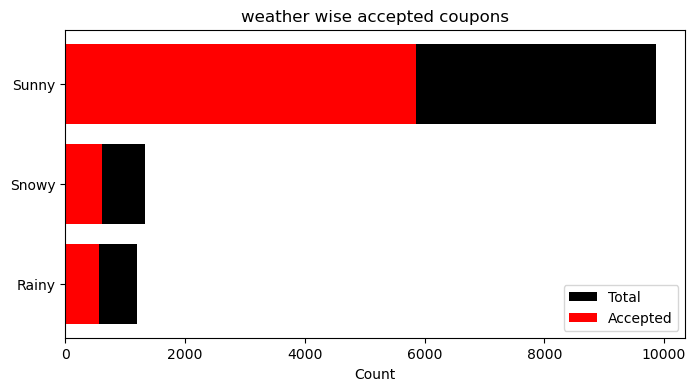

In [32]:
analysis(df,'weather')

#### Sunny weather is associated with higher coupon acceptance, while Snowy and Rainy conditions correlate with lower acceptance rates. This suggests that weather conditions impact users' likelihood to engage with coupons.

#### Transforming categorical features to numerical type

In [33]:
cat_cols=[]
for i in df:
    if df[i].dtype==object:
        cat_cols.append(i)
print(cat_cols)

['destination', 'passanger', 'weather', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [35]:
def preprocessor(df):
    res_df=df.copy()
    le=LabelEncoder()
    for i in cat_cols:
        res_df[i]=le.fit_transform(res_df[i])
    return res_df

In [36]:
encoded_df=preprocessor(df)

In [37]:
encoded_df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,Target
0,1,0,2,55,4,0,0,0,3,1,5,3,4,4,0,1,0,0,0,1
1,1,1,2,80,2,1,0,0,3,1,5,3,4,4,0,1,0,0,0,0
2,1,1,2,80,1,1,0,0,3,1,5,3,4,4,0,1,0,1,0,1
3,1,1,2,80,2,1,0,0,3,1,5,3,4,4,0,1,0,1,0,0
4,1,1,2,80,2,0,0,0,3,1,5,3,4,4,0,1,0,1,0,0


In [38]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12393 entries, 0 to 12683
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   destination           12393 non-null  int32
 1   passanger             12393 non-null  int32
 2   weather               12393 non-null  int32
 3   temperature           12393 non-null  int64
 4   coupon                12393 non-null  int32
 5   expiration            12393 non-null  int32
 6   gender                12393 non-null  int32
 7   age                   12393 non-null  int32
 8   maritalStatus         12393 non-null  int32
 9   has_children          12393 non-null  int64
 10  education             12393 non-null  int32
 11  income                12393 non-null  int32
 12  Bar                   12393 non-null  int32
 13  CoffeeHouse           12393 non-null  int32
 14  CarryAway             12393 non-null  int32
 15  RestaurantLessThan20  12393 non-null  int32
 16  Restauran

In [39]:
# Splitting data into features and target variables

X=encoded_df.drop(['Target'],axis=1)
y=encoded_df['Target']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .20, random_state=35)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluation_metrics(y_pred, y):
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy:", accuracy)

    precision = precision_score(y, y_pred)
    print("Precision:", precision)

    recall = recall_score(y, y_pred)
    print("Recall:", recall)

    f1 = f1_score(y, y_pred)
    print("F1 Score:", f1)

    auc_roc = roc_auc_score(y, y_pred)
    print("AUC-ROC:", auc_roc)

### Model training

#### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

#Test set prediction
y_pred_lr = lr.predict(X_test)
#Train set prediction
ytrain_pred_lr = lr.predict(X_train)

In [44]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(y_pred_lr, y_test)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain_pred_lr, y_train)

***Test set prediction evaluation:***

Accuracy: 0.6313029447357805
Precision: 0.6512729425695678
Recall: 0.7719298245614035
F1 Score: 0.7064868336544637
AUC-ROC: 0.6065531475748194

***Train set prediction evaluation:***

Accuracy: 0.6260843251966915
Precision: 0.6423810966373826
Recall: 0.7590835868981565
F1 Score: 0.6958733284108622
AUC-ROC: 0.6067199769480383


#### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#Test set prediction
y_pred_rf = rf.predict(X_test)
#Train set prediction
ytrain_pred_rf = rf.predict(X_train)

In [46]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(y_pred_rf, y_test)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain_pred_rf, y_train)

***Test set prediction evaluation:***

Accuracy: 0.7329568374344494
Precision: 0.7586440677966102
Recall: 0.7852631578947369
F1 Score: 0.7717241379310344
AUC-ROC: 0.7237511235393987

***Train set prediction evaluation:***

Accuracy: 0.9899132539842647
Precision: 0.9903485254691688
Recall: 0.9917666010381242
F1 Score: 0.9910570559828296
AUC-ROC: 0.9896434114504234


#### The Random Forest model shows a significant overfitting issue, with much higher accuracy on the training set compared to the test set.

#### SVM

In [47]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

#Test set prediction
y_pred_svm = svm.predict(X_test)
#Train set prediction
ytrain_pred_svm = svm.predict(X_train)

In [48]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(y_pred_svm, y_test)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain_pred_svm, y_train)

***Test set prediction evaluation:***

Accuracy: 0.6313029447357805
Precision: 0.6493278784336646
Recall: 0.7796491228070176
F1 Score: 0.7085459183673469
AUC-ROC: 0.6051945803788409

***Train set prediction evaluation:***

Accuracy: 0.6263869275771636
Precision: 0.6412179391030448
Recall: 0.7651691426525864
F1 Score: 0.6977313530275828
AUC-ROC: 0.6061805962858495


#### K-NN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Test set prediction
y_pred_knn = knn.predict(X_test)
#Train set prediction
ytrain_pred_knn = knn.predict(X_train)

In [50]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(y_pred_knn, y_test)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain_pred_knn, y_train)

***Test set prediction evaluation:***

Accuracy: 0.6337232755143203
Precision: 0.6726786907147628
Recall: 0.7066666666666667
F1 Score: 0.6892539356605065
AUC-ROC: 0.6208855154965212

***Train set prediction evaluation:***

Accuracy: 0.7640710106919508
Precision: 0.7746026378085897
Recall: 0.8199391444424557
F1 Score: 0.7966263803147552
AUC-ROC: 0.7559367550268669


#### The substantial difference between training and test accuracies indicates overfitting. The K-NN model shows strong performance on the training data but fails to generalize well to unseen data.

#### XGBoost

In [51]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

#Test set prediction
y_pred_xgb = xgb.predict(X_test)
#Train set prediction
ytrain_pred_xgb = xgb.predict(X_train)

In [52]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(y_pred_xgb, y_test)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain_pred_xgb, y_train)

***Test set prediction evaluation:***

Accuracy: 0.7402178297700686
Precision: 0.7687543014452857
Recall: 0.783859649122807
F1 Score: 0.7762334954829743
AUC-ROC: 0.7325370351875894

***Train set prediction evaluation:***

Accuracy: 0.9118418398224732
Precision: 0.9011063829787234
Recall: 0.9475568283515303
F1 Score: 0.923748036991799
AUC-ROC: 0.9066418299372627


#### The substantial difference between training and test accuracies indicates that the XGBoost model might be overfitting.

#### CatBoost

In [53]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier()
cb.fit(X_train, y_train)

#Test set prediction
y_pred_cb = cb.predict(X_test)
#Train set prediction
ytrain_pred_cb = cb.predict(X_train)

Learning rate set to 0.027437
0:	learn: 0.6887734	total: 148ms	remaining: 2m 27s
1:	learn: 0.6842115	total: 149ms	remaining: 1m 14s
2:	learn: 0.6808071	total: 151ms	remaining: 50.1s
3:	learn: 0.6774505	total: 152ms	remaining: 37.9s
4:	learn: 0.6732742	total: 154ms	remaining: 30.6s
5:	learn: 0.6695163	total: 156ms	remaining: 25.8s
6:	learn: 0.6658539	total: 157ms	remaining: 22.3s
7:	learn: 0.6627327	total: 160ms	remaining: 19.9s
8:	learn: 0.6597334	total: 163ms	remaining: 17.9s
9:	learn: 0.6567641	total: 166ms	remaining: 16.4s
10:	learn: 0.6536478	total: 169ms	remaining: 15.2s
11:	learn: 0.6508024	total: 171ms	remaining: 14.1s
12:	learn: 0.6483080	total: 174ms	remaining: 13.2s
13:	learn: 0.6465501	total: 177ms	remaining: 12.5s
14:	learn: 0.6440103	total: 179ms	remaining: 11.8s
15:	learn: 0.6421464	total: 182ms	remaining: 11.2s
16:	learn: 0.6396338	total: 183ms	remaining: 10.6s
17:	learn: 0.6377894	total: 185ms	remaining: 10.1s
18:	learn: 0.6354425	total: 187ms	remaining: 9.64s
19:	learn

228:	learn: 0.5265469	total: 592ms	remaining: 1.99s
229:	learn: 0.5264030	total: 594ms	remaining: 1.99s
230:	learn: 0.5262188	total: 596ms	remaining: 1.98s
231:	learn: 0.5259887	total: 598ms	remaining: 1.98s
232:	learn: 0.5256971	total: 599ms	remaining: 1.97s
233:	learn: 0.5254949	total: 601ms	remaining: 1.97s
234:	learn: 0.5252583	total: 603ms	remaining: 1.96s
235:	learn: 0.5250478	total: 605ms	remaining: 1.96s
236:	learn: 0.5247184	total: 607ms	remaining: 1.95s
237:	learn: 0.5244869	total: 609ms	remaining: 1.95s
238:	learn: 0.5243436	total: 611ms	remaining: 1.94s
239:	learn: 0.5240140	total: 612ms	remaining: 1.94s
240:	learn: 0.5238184	total: 614ms	remaining: 1.93s
241:	learn: 0.5235830	total: 616ms	remaining: 1.93s
242:	learn: 0.5232847	total: 617ms	remaining: 1.92s
243:	learn: 0.5230654	total: 619ms	remaining: 1.92s
244:	learn: 0.5228533	total: 621ms	remaining: 1.91s
245:	learn: 0.5226474	total: 623ms	remaining: 1.91s
246:	learn: 0.5224652	total: 625ms	remaining: 1.9s
247:	learn: 0

447:	learn: 0.4765995	total: 991ms	remaining: 1.22s
448:	learn: 0.4763756	total: 994ms	remaining: 1.22s
449:	learn: 0.4762054	total: 996ms	remaining: 1.22s
450:	learn: 0.4759296	total: 997ms	remaining: 1.21s
451:	learn: 0.4757275	total: 999ms	remaining: 1.21s
452:	learn: 0.4754815	total: 1s	remaining: 1.21s
453:	learn: 0.4753400	total: 1s	remaining: 1.21s
454:	learn: 0.4751532	total: 1s	remaining: 1.2s
455:	learn: 0.4749584	total: 1.01s	remaining: 1.2s
456:	learn: 0.4747615	total: 1.01s	remaining: 1.2s
457:	learn: 0.4745887	total: 1.01s	remaining: 1.2s
458:	learn: 0.4744313	total: 1.01s	remaining: 1.19s
459:	learn: 0.4742361	total: 1.01s	remaining: 1.19s
460:	learn: 0.4741057	total: 1.02s	remaining: 1.19s
461:	learn: 0.4739009	total: 1.02s	remaining: 1.19s
462:	learn: 0.4737503	total: 1.02s	remaining: 1.18s
463:	learn: 0.4735712	total: 1.02s	remaining: 1.18s
464:	learn: 0.4733222	total: 1.02s	remaining: 1.18s
465:	learn: 0.4731614	total: 1.02s	remaining: 1.17s
466:	learn: 0.4728977	tot

668:	learn: 0.4392943	total: 1.39s	remaining: 686ms
669:	learn: 0.4390917	total: 1.39s	remaining: 684ms
670:	learn: 0.4389874	total: 1.39s	remaining: 682ms
671:	learn: 0.4387856	total: 1.39s	remaining: 680ms
672:	learn: 0.4385991	total: 1.39s	remaining: 678ms
673:	learn: 0.4384725	total: 1.4s	remaining: 675ms
674:	learn: 0.4383169	total: 1.4s	remaining: 673ms
675:	learn: 0.4381779	total: 1.4s	remaining: 671ms
676:	learn: 0.4380540	total: 1.4s	remaining: 669ms
677:	learn: 0.4378644	total: 1.4s	remaining: 667ms
678:	learn: 0.4377082	total: 1.41s	remaining: 664ms
679:	learn: 0.4375442	total: 1.41s	remaining: 662ms
680:	learn: 0.4373866	total: 1.41s	remaining: 660ms
681:	learn: 0.4372430	total: 1.41s	remaining: 658ms
682:	learn: 0.4371021	total: 1.41s	remaining: 656ms
683:	learn: 0.4369643	total: 1.41s	remaining: 653ms
684:	learn: 0.4368341	total: 1.42s	remaining: 651ms
685:	learn: 0.4366611	total: 1.42s	remaining: 649ms
686:	learn: 0.4365129	total: 1.42s	remaining: 647ms
687:	learn: 0.436

893:	learn: 0.4095978	total: 1.79s	remaining: 212ms
894:	learn: 0.4095034	total: 1.79s	remaining: 210ms
895:	learn: 0.4093851	total: 1.79s	remaining: 208ms
896:	learn: 0.4092568	total: 1.8s	remaining: 206ms
897:	learn: 0.4091202	total: 1.8s	remaining: 204ms
898:	learn: 0.4089994	total: 1.8s	remaining: 202ms
899:	learn: 0.4088660	total: 1.8s	remaining: 200ms
900:	learn: 0.4087812	total: 1.8s	remaining: 198ms
901:	learn: 0.4086412	total: 1.8s	remaining: 196ms
902:	learn: 0.4085222	total: 1.81s	remaining: 194ms
903:	learn: 0.4083886	total: 1.81s	remaining: 192ms
904:	learn: 0.4082796	total: 1.81s	remaining: 190ms
905:	learn: 0.4082034	total: 1.81s	remaining: 188ms
906:	learn: 0.4080522	total: 1.81s	remaining: 186ms
907:	learn: 0.4078912	total: 1.82s	remaining: 184ms
908:	learn: 0.4077714	total: 1.82s	remaining: 182ms
909:	learn: 0.4076631	total: 1.82s	remaining: 180ms
910:	learn: 0.4075200	total: 1.82s	remaining: 178ms
911:	learn: 0.4074170	total: 1.82s	remaining: 176ms
912:	learn: 0.4073

In [54]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(y_pred_cb, y_test)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain_pred_cb, y_train)

***Test set prediction evaluation:***

Accuracy: 0.7579669221460267
Precision: 0.7687296416938111
Recall: 0.8280701754385965
F1 Score: 0.7972972972972973
AUC-ROC: 0.7456290156130364

***Train set prediction evaluation:***

Accuracy: 0.8384103288279201
Precision: 0.8247758761206194
Recall: 0.9056738858063361
F1 Score: 0.8633339020644941
AUC-ROC: 0.8286169290367479


#### CatBoost has the highest test accuracy at 75.80%, which indicates that it performs best on unseen data compared to the other algorithms.
#### Random Forest has the highest training accuracy but shows a significant drop in test accuracy, indicating potential overfitting.
#### K-NN, XGBoost, and Logistic Regression also show varying degrees of overfitting, with their test accuracies lower than their training accuracies.

#### Conclusion:  CatBoost is the best algorithm based on test accuracy. It has the highest test accuracy among the algorithms, indicating it generalizes well to unseen data while maintaining a relatively good balance between training and test performance.



#### Fine-tuning catboost algorithm

In [55]:
from sklearn.model_selection import GridSearchCV
grid = {'max_depth': [3,4,5,6],'n_estimators':[100, 150, 200, 250, 300]}
gscv = GridSearchCV (estimator = cb, param_grid = grid, scoring ='accuracy', cv = 10)

In [56]:
#fit the model
gscv.fit(X_train,y_train)

print()
print(gscv.best_estimator_)
print()
print(gscv.best_score_)
print()
print(gscv.best_params_)

Learning rate set to 0.216661
0:	learn: 0.6774237	total: 707us	remaining: 70ms
1:	learn: 0.6652679	total: 1.34ms	remaining: 65.6ms
2:	learn: 0.6560754	total: 1.99ms	remaining: 64.5ms
3:	learn: 0.6504741	total: 2.65ms	remaining: 63.6ms
4:	learn: 0.6396426	total: 3.25ms	remaining: 61.7ms
5:	learn: 0.6338471	total: 3.83ms	remaining: 60.1ms
6:	learn: 0.6299690	total: 4.42ms	remaining: 58.8ms
7:	learn: 0.6263644	total: 5.03ms	remaining: 57.8ms
8:	learn: 0.6211228	total: 5.64ms	remaining: 57ms
9:	learn: 0.6162433	total: 6.22ms	remaining: 56ms
10:	learn: 0.6139006	total: 6.84ms	remaining: 55.3ms
11:	learn: 0.6117130	total: 7.44ms	remaining: 54.6ms
12:	learn: 0.6094116	total: 8.04ms	remaining: 53.8ms
13:	learn: 0.6064232	total: 8.65ms	remaining: 53.1ms
14:	learn: 0.6051814	total: 9.28ms	remaining: 52.6ms
15:	learn: 0.6029291	total: 9.88ms	remaining: 51.9ms
16:	learn: 0.6014502	total: 10.5ms	remaining: 51.3ms
17:	learn: 0.5998426	total: 11.1ms	remaining: 50.6ms
18:	learn: 0.5990208	total: 11.8m

Learning rate set to 0.216661
0:	learn: 0.6787523	total: 701us	remaining: 69.5ms
1:	learn: 0.6644153	total: 1.31ms	remaining: 64.2ms
2:	learn: 0.6542794	total: 1.85ms	remaining: 59.8ms
3:	learn: 0.6464410	total: 2.43ms	remaining: 58.3ms
4:	learn: 0.6380953	total: 2.97ms	remaining: 56.5ms
5:	learn: 0.6340664	total: 3.5ms	remaining: 54.8ms
6:	learn: 0.6297416	total: 4.12ms	remaining: 54.7ms
7:	learn: 0.6258692	total: 4.71ms	remaining: 54.2ms
8:	learn: 0.6200297	total: 5.32ms	remaining: 53.8ms
9:	learn: 0.6165763	total: 5.95ms	remaining: 53.5ms
10:	learn: 0.6143659	total: 6.58ms	remaining: 53.2ms
11:	learn: 0.6118536	total: 7.18ms	remaining: 52.7ms
12:	learn: 0.6094270	total: 7.8ms	remaining: 52.2ms
13:	learn: 0.6061862	total: 8.42ms	remaining: 51.7ms
14:	learn: 0.6047178	total: 9.06ms	remaining: 51.4ms
15:	learn: 0.6028385	total: 9.72ms	remaining: 51ms
16:	learn: 0.6010879	total: 10.3ms	remaining: 50.5ms
17:	learn: 0.5989060	total: 11ms	remaining: 50.1ms
18:	learn: 0.5980893	total: 11.6m

Learning rate set to 0.216672
0:	learn: 0.6781935	total: 698us	remaining: 69.1ms
1:	learn: 0.6662560	total: 1.28ms	remaining: 62.9ms
2:	learn: 0.6561901	total: 1.85ms	remaining: 59.8ms
3:	learn: 0.6485746	total: 2.4ms	remaining: 57.5ms
4:	learn: 0.6383922	total: 3.01ms	remaining: 57.1ms
5:	learn: 0.6344506	total: 3.65ms	remaining: 57.2ms
6:	learn: 0.6319666	total: 4.25ms	remaining: 56.4ms
7:	learn: 0.6280196	total: 4.85ms	remaining: 55.8ms
8:	learn: 0.6232611	total: 5.47ms	remaining: 55.4ms
9:	learn: 0.6172489	total: 6.09ms	remaining: 54.8ms
10:	learn: 0.6151271	total: 6.72ms	remaining: 54.4ms
11:	learn: 0.6128284	total: 7.35ms	remaining: 53.9ms
12:	learn: 0.6107969	total: 7.94ms	remaining: 53.2ms
13:	learn: 0.6086681	total: 8.57ms	remaining: 52.7ms
14:	learn: 0.6071834	total: 9.2ms	remaining: 52.1ms
15:	learn: 0.6052913	total: 9.83ms	remaining: 51.6ms
16:	learn: 0.6037095	total: 10.5ms	remaining: 51.1ms
17:	learn: 0.6021481	total: 11.2ms	remaining: 50.9ms
18:	learn: 0.6009459	total: 1

83:	learn: 0.5455853	total: 58.2ms	remaining: 11.1ms
84:	learn: 0.5451124	total: 59.1ms	remaining: 10.4ms
85:	learn: 0.5447994	total: 59.8ms	remaining: 9.74ms
86:	learn: 0.5443840	total: 60.5ms	remaining: 9.04ms
87:	learn: 0.5441880	total: 61.2ms	remaining: 8.35ms
88:	learn: 0.5439307	total: 62ms	remaining: 7.66ms
89:	learn: 0.5435631	total: 62.7ms	remaining: 6.96ms
90:	learn: 0.5429296	total: 63.4ms	remaining: 6.27ms
91:	learn: 0.5425317	total: 64.1ms	remaining: 5.58ms
92:	learn: 0.5421566	total: 65ms	remaining: 4.89ms
93:	learn: 0.5416928	total: 65.8ms	remaining: 4.2ms
94:	learn: 0.5413741	total: 66.6ms	remaining: 3.5ms
95:	learn: 0.5408462	total: 67.5ms	remaining: 2.81ms
96:	learn: 0.5405108	total: 68.2ms	remaining: 2.11ms
97:	learn: 0.5401811	total: 68.9ms	remaining: 1.41ms
98:	learn: 0.5394302	total: 69.6ms	remaining: 703us
99:	learn: 0.5391768	total: 70.3ms	remaining: 0us
Learning rate set to 0.216672
0:	learn: 0.6786944	total: 728us	remaining: 72.1ms
1:	learn: 0.6648684	total: 1

93:	learn: 0.5452203	total: 66.7ms	remaining: 4.26ms
94:	learn: 0.5446701	total: 67.5ms	remaining: 3.55ms
95:	learn: 0.5444740	total: 68.3ms	remaining: 2.84ms
96:	learn: 0.5439643	total: 69ms	remaining: 2.13ms
97:	learn: 0.5435567	total: 69.7ms	remaining: 1.42ms
98:	learn: 0.5432219	total: 70.3ms	remaining: 710us
99:	learn: 0.5429498	total: 71ms	remaining: 0us
Learning rate set to 0.216672
0:	learn: 0.6787430	total: 713us	remaining: 70.6ms
1:	learn: 0.6682745	total: 1.32ms	remaining: 64.7ms
2:	learn: 0.6584993	total: 1.91ms	remaining: 61.7ms
3:	learn: 0.6521966	total: 2.5ms	remaining: 60ms
4:	learn: 0.6411196	total: 3.09ms	remaining: 58.7ms
5:	learn: 0.6371525	total: 3.67ms	remaining: 57.5ms
6:	learn: 0.6340489	total: 4.27ms	remaining: 56.8ms
7:	learn: 0.6302040	total: 4.88ms	remaining: 56.2ms
8:	learn: 0.6230704	total: 5.48ms	remaining: 55.4ms
9:	learn: 0.6204763	total: 6.13ms	remaining: 55.1ms
10:	learn: 0.6167762	total: 6.95ms	remaining: 56.3ms
11:	learn: 0.6134666	total: 7.59ms	rem

58:	learn: 0.5761597	total: 39.9ms	remaining: 61.6ms
59:	learn: 0.5757558	total: 40.8ms	remaining: 61.2ms
60:	learn: 0.5748720	total: 41.6ms	remaining: 60.7ms
61:	learn: 0.5740892	total: 42.5ms	remaining: 60.3ms
62:	learn: 0.5733054	total: 43.3ms	remaining: 59.7ms
63:	learn: 0.5729803	total: 44ms	remaining: 59.1ms
64:	learn: 0.5724217	total: 44.7ms	remaining: 58.5ms
65:	learn: 0.5709674	total: 45.5ms	remaining: 58ms
66:	learn: 0.5703890	total: 46.3ms	remaining: 57.4ms
67:	learn: 0.5700519	total: 47ms	remaining: 56.7ms
68:	learn: 0.5696092	total: 47.8ms	remaining: 56.1ms
69:	learn: 0.5691338	total: 48.6ms	remaining: 55.5ms
70:	learn: 0.5686790	total: 49.3ms	remaining: 54.9ms
71:	learn: 0.5680616	total: 50ms	remaining: 54.2ms
72:	learn: 0.5676697	total: 50.9ms	remaining: 53.6ms
73:	learn: 0.5672551	total: 51.7ms	remaining: 53.1ms
74:	learn: 0.5667161	total: 52.5ms	remaining: 52.5ms
75:	learn: 0.5662066	total: 53.2ms	remaining: 51.8ms
76:	learn: 0.5658447	total: 54ms	remaining: 51.2ms
77:

107:	learn: 0.5509618	total: 70.7ms	remaining: 27.5ms
108:	learn: 0.5505906	total: 71.5ms	remaining: 26.9ms
109:	learn: 0.5504199	total: 72.3ms	remaining: 26.3ms
110:	learn: 0.5502146	total: 73.1ms	remaining: 25.7ms
111:	learn: 0.5499363	total: 73.8ms	remaining: 25ms
112:	learn: 0.5497264	total: 74.6ms	remaining: 24.4ms
113:	learn: 0.5494871	total: 75.3ms	remaining: 23.8ms
114:	learn: 0.5492448	total: 76.1ms	remaining: 23.2ms
115:	learn: 0.5489088	total: 76.8ms	remaining: 22.5ms
116:	learn: 0.5484507	total: 77.6ms	remaining: 21.9ms
117:	learn: 0.5482101	total: 78.3ms	remaining: 21.2ms
118:	learn: 0.5479281	total: 79.1ms	remaining: 20.6ms
119:	learn: 0.5477120	total: 79.8ms	remaining: 20ms
120:	learn: 0.5474728	total: 80.5ms	remaining: 19.3ms
121:	learn: 0.5472794	total: 81.3ms	remaining: 18.7ms
122:	learn: 0.5471654	total: 82ms	remaining: 18ms
123:	learn: 0.5469517	total: 82.7ms	remaining: 17.3ms
124:	learn: 0.5467961	total: 83.4ms	remaining: 16.7ms
125:	learn: 0.5461006	total: 84.1ms	

Learning rate set to 0.149392
0:	learn: 0.6824625	total: 681us	remaining: 102ms
1:	learn: 0.6735153	total: 1.26ms	remaining: 93.4ms
2:	learn: 0.6664553	total: 1.78ms	remaining: 87.5ms
3:	learn: 0.6599462	total: 2.37ms	remaining: 86.3ms
4:	learn: 0.6517639	total: 2.92ms	remaining: 84.8ms
5:	learn: 0.6482118	total: 3.42ms	remaining: 82.2ms
6:	learn: 0.6426983	total: 3.98ms	remaining: 81.3ms
7:	learn: 0.6399310	total: 4.57ms	remaining: 81ms
8:	learn: 0.6343245	total: 5.18ms	remaining: 81.2ms
9:	learn: 0.6314791	total: 5.78ms	remaining: 81ms
10:	learn: 0.6294031	total: 6.39ms	remaining: 80.7ms
11:	learn: 0.6263222	total: 6.97ms	remaining: 80.2ms
12:	learn: 0.6239002	total: 7.56ms	remaining: 79.7ms
13:	learn: 0.6191179	total: 8.18ms	remaining: 79.5ms
14:	learn: 0.6176861	total: 8.77ms	remaining: 79ms
15:	learn: 0.6161563	total: 9.4ms	remaining: 78.7ms
16:	learn: 0.6149758	total: 10ms	remaining: 78.5ms
17:	learn: 0.6124445	total: 10.6ms	remaining: 78ms
18:	learn: 0.6111537	total: 11.2ms	rema

50:	learn: 0.5761428	total: 32.8ms	remaining: 63.7ms
51:	learn: 0.5756046	total: 33.6ms	remaining: 63.4ms
52:	learn: 0.5751912	total: 34.4ms	remaining: 63ms
53:	learn: 0.5746947	total: 35.2ms	remaining: 62.5ms
54:	learn: 0.5741985	total: 35.9ms	remaining: 62ms
55:	learn: 0.5735284	total: 36.6ms	remaining: 61.5ms
56:	learn: 0.5728825	total: 37.3ms	remaining: 60.8ms
57:	learn: 0.5724956	total: 38ms	remaining: 60.3ms
58:	learn: 0.5722180	total: 38.8ms	remaining: 59.8ms
59:	learn: 0.5716640	total: 39.5ms	remaining: 59.2ms
60:	learn: 0.5708380	total: 40.2ms	remaining: 58.6ms
61:	learn: 0.5702243	total: 41.2ms	remaining: 58.5ms
62:	learn: 0.5697271	total: 42ms	remaining: 57.9ms
63:	learn: 0.5692378	total: 42.6ms	remaining: 57.3ms
64:	learn: 0.5688337	total: 43.3ms	remaining: 56.6ms
65:	learn: 0.5683600	total: 44ms	remaining: 56ms
66:	learn: 0.5679314	total: 44.6ms	remaining: 55.3ms
67:	learn: 0.5665222	total: 45.3ms	remaining: 54.6ms
68:	learn: 0.5660848	total: 45.9ms	remaining: 53.9ms
69:	l

104:	learn: 0.5541997	total: 69.4ms	remaining: 29.7ms
105:	learn: 0.5540087	total: 70.2ms	remaining: 29.1ms
106:	learn: 0.5534969	total: 70.8ms	remaining: 28.5ms
107:	learn: 0.5531853	total: 71.5ms	remaining: 27.8ms
108:	learn: 0.5528711	total: 72.2ms	remaining: 27.1ms
109:	learn: 0.5526019	total: 72.9ms	remaining: 26.5ms
110:	learn: 0.5522970	total: 73.6ms	remaining: 25.9ms
111:	learn: 0.5519402	total: 74.3ms	remaining: 25.2ms
112:	learn: 0.5516216	total: 75ms	remaining: 24.5ms
113:	learn: 0.5509476	total: 75.8ms	remaining: 23.9ms
114:	learn: 0.5506069	total: 76.7ms	remaining: 23.3ms
115:	learn: 0.5502745	total: 77.4ms	remaining: 22.7ms
116:	learn: 0.5500496	total: 78.2ms	remaining: 22ms
117:	learn: 0.5495626	total: 78.9ms	remaining: 21.4ms
118:	learn: 0.5493406	total: 79.6ms	remaining: 20.7ms
119:	learn: 0.5490617	total: 80.3ms	remaining: 20.1ms
120:	learn: 0.5488923	total: 81ms	remaining: 19.4ms
121:	learn: 0.5486046	total: 81.6ms	remaining: 18.7ms
122:	learn: 0.5483217	total: 82.3m

Learning rate set to 0.149392
0:	learn: 0.6823311	total: 711us	remaining: 106ms
1:	learn: 0.6744399	total: 1.31ms	remaining: 97.2ms
2:	learn: 0.6646620	total: 1.9ms	remaining: 93.2ms
3:	learn: 0.6581835	total: 2.5ms	remaining: 91.2ms
4:	learn: 0.6514800	total: 3.08ms	remaining: 89.3ms
5:	learn: 0.6465007	total: 3.61ms	remaining: 86.6ms
6:	learn: 0.6412680	total: 4.14ms	remaining: 84.7ms
7:	learn: 0.6374440	total: 4.73ms	remaining: 84ms
8:	learn: 0.6331001	total: 5.34ms	remaining: 83.7ms
9:	learn: 0.6282142	total: 5.95ms	remaining: 83.3ms
10:	learn: 0.6252387	total: 6.58ms	remaining: 83.2ms
11:	learn: 0.6221252	total: 7.2ms	remaining: 82.9ms
12:	learn: 0.6208723	total: 7.82ms	remaining: 82.5ms
13:	learn: 0.6182047	total: 8.42ms	remaining: 81.8ms
14:	learn: 0.6166538	total: 9.03ms	remaining: 81.3ms
15:	learn: 0.6146779	total: 9.7ms	remaining: 81.2ms
16:	learn: 0.6136374	total: 10.3ms	remaining: 80.5ms
17:	learn: 0.6123754	total: 10.9ms	remaining: 80ms
18:	learn: 0.6098934	total: 11.5ms	r

68:	learn: 0.5682994	total: 44.9ms	remaining: 52.7ms
69:	learn: 0.5677677	total: 45.7ms	remaining: 52.2ms
70:	learn: 0.5672433	total: 46.4ms	remaining: 51.6ms
71:	learn: 0.5665534	total: 47.1ms	remaining: 51ms
72:	learn: 0.5660651	total: 47.8ms	remaining: 50.4ms
73:	learn: 0.5654645	total: 48.4ms	remaining: 49.7ms
74:	learn: 0.5650855	total: 49.1ms	remaining: 49.1ms
75:	learn: 0.5647066	total: 49.8ms	remaining: 48.5ms
76:	learn: 0.5642828	total: 50.5ms	remaining: 47.9ms
77:	learn: 0.5640600	total: 51.2ms	remaining: 47.3ms
78:	learn: 0.5634751	total: 51.9ms	remaining: 46.6ms
79:	learn: 0.5630928	total: 52.6ms	remaining: 46ms
80:	learn: 0.5627079	total: 53.3ms	remaining: 45.4ms
81:	learn: 0.5623188	total: 54ms	remaining: 44.8ms
82:	learn: 0.5620567	total: 54.7ms	remaining: 44.2ms
83:	learn: 0.5617038	total: 55.4ms	remaining: 43.5ms
84:	learn: 0.5612599	total: 56.1ms	remaining: 42.9ms
85:	learn: 0.5609013	total: 56.8ms	remaining: 42.3ms
86:	learn: 0.5605363	total: 57.5ms	remaining: 41.6ms

Learning rate set to 0.114746
0:	learn: 0.6847578	total: 2.5ms	remaining: 498ms
1:	learn: 0.6768836	total: 4.34ms	remaining: 430ms
2:	learn: 0.6707661	total: 6.18ms	remaining: 406ms
3:	learn: 0.6647687	total: 7.73ms	remaining: 379ms
4:	learn: 0.6608501	total: 9.48ms	remaining: 370ms
5:	learn: 0.6551681	total: 11.1ms	remaining: 358ms
6:	learn: 0.6506605	total: 12.3ms	remaining: 340ms
7:	learn: 0.6453758	total: 13.6ms	remaining: 327ms
8:	learn: 0.6408527	total: 14.9ms	remaining: 316ms
9:	learn: 0.6362907	total: 16.2ms	remaining: 307ms
10:	learn: 0.6342202	total: 17.4ms	remaining: 299ms
11:	learn: 0.6307249	total: 18.6ms	remaining: 292ms
12:	learn: 0.6279001	total: 19.9ms	remaining: 286ms
13:	learn: 0.6254916	total: 21.1ms	remaining: 280ms
14:	learn: 0.6236390	total: 22.3ms	remaining: 275ms
15:	learn: 0.6221393	total: 23.5ms	remaining: 270ms
16:	learn: 0.6213540	total: 24.7ms	remaining: 266ms
17:	learn: 0.6197674	total: 26.3ms	remaining: 266ms
18:	learn: 0.6180402	total: 27.6ms	remaining:

67:	learn: 0.5759530	total: 83.5ms	remaining: 162ms
68:	learn: 0.5752354	total: 85ms	remaining: 161ms
69:	learn: 0.5749739	total: 86.2ms	remaining: 160ms
70:	learn: 0.5746833	total: 87.4ms	remaining: 159ms
71:	learn: 0.5742562	total: 88.6ms	remaining: 157ms
72:	learn: 0.5739795	total: 89.8ms	remaining: 156ms
73:	learn: 0.5734861	total: 91ms	remaining: 155ms
74:	learn: 0.5732058	total: 92.3ms	remaining: 154ms
75:	learn: 0.5728643	total: 93.5ms	remaining: 153ms
76:	learn: 0.5725202	total: 94.8ms	remaining: 151ms
77:	learn: 0.5721776	total: 96ms	remaining: 150ms
78:	learn: 0.5720085	total: 97.2ms	remaining: 149ms
79:	learn: 0.5716425	total: 98.4ms	remaining: 148ms
80:	learn: 0.5707445	total: 99.7ms	remaining: 146ms
81:	learn: 0.5700141	total: 101ms	remaining: 145ms
82:	learn: 0.5694838	total: 102ms	remaining: 144ms
83:	learn: 0.5690852	total: 103ms	remaining: 143ms
84:	learn: 0.5684678	total: 105ms	remaining: 141ms
85:	learn: 0.5681074	total: 106ms	remaining: 140ms
86:	learn: 0.5675260	to

163:	learn: 0.5450726	total: 205ms	remaining: 45.1ms
164:	learn: 0.5448514	total: 207ms	remaining: 43.9ms
165:	learn: 0.5445664	total: 208ms	remaining: 42.6ms
166:	learn: 0.5443762	total: 210ms	remaining: 41.4ms
167:	learn: 0.5440972	total: 211ms	remaining: 40.2ms
168:	learn: 0.5439633	total: 212ms	remaining: 38.9ms
169:	learn: 0.5436693	total: 213ms	remaining: 37.6ms
170:	learn: 0.5435366	total: 215ms	remaining: 36.4ms
171:	learn: 0.5433148	total: 216ms	remaining: 35.1ms
172:	learn: 0.5431531	total: 217ms	remaining: 33.9ms
173:	learn: 0.5429972	total: 218ms	remaining: 32.6ms
174:	learn: 0.5428373	total: 220ms	remaining: 31.4ms
175:	learn: 0.5426590	total: 221ms	remaining: 30.2ms
176:	learn: 0.5424869	total: 223ms	remaining: 28.9ms
177:	learn: 0.5421328	total: 224ms	remaining: 27.7ms
178:	learn: 0.5419178	total: 226ms	remaining: 26.5ms
179:	learn: 0.5417387	total: 227ms	remaining: 25.2ms
180:	learn: 0.5415226	total: 228ms	remaining: 24ms
181:	learn: 0.5411704	total: 230ms	remaining: 22

Learning rate set to 0.114751
0:	learn: 0.6834037	total: 1.36ms	remaining: 271ms
1:	learn: 0.6758227	total: 2.62ms	remaining: 259ms
2:	learn: 0.6684933	total: 3.75ms	remaining: 246ms
3:	learn: 0.6620165	total: 4.87ms	remaining: 239ms
4:	learn: 0.6546574	total: 6.03ms	remaining: 235ms
5:	learn: 0.6491566	total: 7.17ms	remaining: 232ms
6:	learn: 0.6463931	total: 8.34ms	remaining: 230ms
7:	learn: 0.6424649	total: 9.51ms	remaining: 228ms
8:	learn: 0.6388986	total: 10.6ms	remaining: 225ms
9:	learn: 0.6359289	total: 11.8ms	remaining: 224ms
10:	learn: 0.6319298	total: 13ms	remaining: 223ms
11:	learn: 0.6281640	total: 14.2ms	remaining: 223ms
12:	learn: 0.6254332	total: 15.4ms	remaining: 222ms
13:	learn: 0.6223448	total: 16.7ms	remaining: 222ms
14:	learn: 0.6206113	total: 17.9ms	remaining: 220ms
15:	learn: 0.6183531	total: 19.1ms	remaining: 219ms
16:	learn: 0.6154100	total: 20.4ms	remaining: 219ms
17:	learn: 0.6129170	total: 21.5ms	remaining: 218ms
18:	learn: 0.6115405	total: 22.7ms	remaining: 

158:	learn: 0.5433191	total: 200ms	remaining: 51.4ms
159:	learn: 0.5430706	total: 201ms	remaining: 50.2ms
160:	learn: 0.5428797	total: 202ms	remaining: 49ms
161:	learn: 0.5426587	total: 203ms	remaining: 47.7ms
162:	learn: 0.5424659	total: 205ms	remaining: 46.4ms
163:	learn: 0.5422612	total: 206ms	remaining: 45.2ms
164:	learn: 0.5419733	total: 207ms	remaining: 43.9ms
165:	learn: 0.5417815	total: 209ms	remaining: 42.7ms
166:	learn: 0.5416048	total: 210ms	remaining: 41.5ms
167:	learn: 0.5414675	total: 211ms	remaining: 40.2ms
168:	learn: 0.5412573	total: 213ms	remaining: 39ms
169:	learn: 0.5409855	total: 214ms	remaining: 37.8ms
170:	learn: 0.5406660	total: 215ms	remaining: 36.5ms
171:	learn: 0.5404816	total: 217ms	remaining: 35.3ms
172:	learn: 0.5403319	total: 218ms	remaining: 34ms
173:	learn: 0.5400835	total: 219ms	remaining: 32.8ms
174:	learn: 0.5399081	total: 220ms	remaining: 31.5ms
175:	learn: 0.5397209	total: 222ms	remaining: 30.3ms
176:	learn: 0.5395983	total: 223ms	remaining: 29ms
1

Learning rate set to 0.114751
0:	learn: 0.6843971	total: 1.28ms	remaining: 256ms
1:	learn: 0.6762433	total: 2.45ms	remaining: 243ms
2:	learn: 0.6695591	total: 3.61ms	remaining: 237ms
3:	learn: 0.6632700	total: 4.72ms	remaining: 231ms
4:	learn: 0.6560416	total: 5.85ms	remaining: 228ms
5:	learn: 0.6492185	total: 6.94ms	remaining: 225ms
6:	learn: 0.6451889	total: 8.49ms	remaining: 234ms
7:	learn: 0.6409881	total: 9.83ms	remaining: 236ms
8:	learn: 0.6363555	total: 11ms	remaining: 233ms
9:	learn: 0.6320301	total: 12.2ms	remaining: 233ms
10:	learn: 0.6299845	total: 13.4ms	remaining: 230ms
11:	learn: 0.6272145	total: 14.6ms	remaining: 229ms
12:	learn: 0.6250433	total: 15.7ms	remaining: 226ms
13:	learn: 0.6228065	total: 16.9ms	remaining: 225ms
14:	learn: 0.6211057	total: 18.1ms	remaining: 223ms
15:	learn: 0.6195912	total: 19.4ms	remaining: 223ms
16:	learn: 0.6163930	total: 20.5ms	remaining: 221ms
17:	learn: 0.6137735	total: 21.7ms	remaining: 220ms
18:	learn: 0.6123608	total: 23ms	remaining: 21

57:	learn: 0.5821063	total: 72ms	remaining: 176ms
58:	learn: 0.5812736	total: 73.4ms	remaining: 175ms
59:	learn: 0.5802568	total: 74.6ms	remaining: 174ms
60:	learn: 0.5798906	total: 75.8ms	remaining: 173ms
61:	learn: 0.5794311	total: 77ms	remaining: 171ms
62:	learn: 0.5790726	total: 78.2ms	remaining: 170ms
63:	learn: 0.5774076	total: 79.5ms	remaining: 169ms
64:	learn: 0.5767571	total: 80.8ms	remaining: 168ms
65:	learn: 0.5763462	total: 82.1ms	remaining: 167ms
66:	learn: 0.5757762	total: 83.4ms	remaining: 166ms
67:	learn: 0.5752828	total: 84.7ms	remaining: 164ms
68:	learn: 0.5746399	total: 85.9ms	remaining: 163ms
69:	learn: 0.5740913	total: 87.3ms	remaining: 162ms
70:	learn: 0.5737999	total: 92.2ms	remaining: 168ms
71:	learn: 0.5734824	total: 94.8ms	remaining: 169ms
72:	learn: 0.5731041	total: 97.3ms	remaining: 169ms
73:	learn: 0.5726829	total: 98.7ms	remaining: 168ms
74:	learn: 0.5723668	total: 100ms	remaining: 167ms
75:	learn: 0.5721431	total: 102ms	remaining: 166ms
76:	learn: 0.57153

163:	learn: 0.5445414	total: 203ms	remaining: 44.5ms
164:	learn: 0.5442521	total: 205ms	remaining: 43.5ms
165:	learn: 0.5440333	total: 206ms	remaining: 42.2ms
166:	learn: 0.5438423	total: 208ms	remaining: 41ms
167:	learn: 0.5435601	total: 209ms	remaining: 39.8ms
168:	learn: 0.5433840	total: 210ms	remaining: 38.6ms
169:	learn: 0.5430883	total: 212ms	remaining: 37.3ms
170:	learn: 0.5428983	total: 213ms	remaining: 36.1ms
171:	learn: 0.5426259	total: 214ms	remaining: 34.9ms
172:	learn: 0.5423419	total: 215ms	remaining: 33.6ms
173:	learn: 0.5421575	total: 217ms	remaining: 32.4ms
174:	learn: 0.5419650	total: 218ms	remaining: 31.1ms
175:	learn: 0.5417688	total: 219ms	remaining: 29.9ms
176:	learn: 0.5415419	total: 221ms	remaining: 28.7ms
177:	learn: 0.5412737	total: 222ms	remaining: 27.5ms
178:	learn: 0.5411015	total: 224ms	remaining: 26.2ms
179:	learn: 0.5408767	total: 225ms	remaining: 25ms
180:	learn: 0.5406525	total: 226ms	remaining: 23.7ms
181:	learn: 0.5405389	total: 227ms	remaining: 22.5

231:	learn: 0.5387505	total: 288ms	remaining: 22.4ms
232:	learn: 0.5386060	total: 290ms	remaining: 21.1ms
233:	learn: 0.5384003	total: 291ms	remaining: 19.9ms
234:	learn: 0.5382439	total: 292ms	remaining: 18.6ms
235:	learn: 0.5380655	total: 293ms	remaining: 17.4ms
236:	learn: 0.5379480	total: 295ms	remaining: 16.2ms
237:	learn: 0.5377479	total: 296ms	remaining: 14.9ms
238:	learn: 0.5375288	total: 297ms	remaining: 13.7ms
239:	learn: 0.5372942	total: 298ms	remaining: 12.4ms
240:	learn: 0.5370967	total: 300ms	remaining: 11.2ms
241:	learn: 0.5369600	total: 301ms	remaining: 9.95ms
242:	learn: 0.5367424	total: 302ms	remaining: 8.71ms
243:	learn: 0.5365757	total: 304ms	remaining: 7.47ms
244:	learn: 0.5364462	total: 305ms	remaining: 6.22ms
245:	learn: 0.5363136	total: 306ms	remaining: 4.98ms
246:	learn: 0.5361174	total: 308ms	remaining: 3.74ms
247:	learn: 0.5359221	total: 309ms	remaining: 2.49ms
248:	learn: 0.5357917	total: 310ms	remaining: 1.25ms
249:	learn: 0.5356491	total: 311ms	remaining: 

Learning rate set to 0.093513
0:	learn: 0.6855141	total: 1.37ms	remaining: 342ms
1:	learn: 0.6789387	total: 2.61ms	remaining: 323ms
2:	learn: 0.6721052	total: 3.69ms	remaining: 304ms
3:	learn: 0.6660621	total: 4.9ms	remaining: 301ms
4:	learn: 0.6613707	total: 6.15ms	remaining: 301ms
5:	learn: 0.6569397	total: 7.31ms	remaining: 297ms
6:	learn: 0.6531952	total: 8.42ms	remaining: 292ms
7:	learn: 0.6493488	total: 9.49ms	remaining: 287ms
8:	learn: 0.6451289	total: 10.6ms	remaining: 285ms
9:	learn: 0.6419820	total: 11.7ms	remaining: 282ms
10:	learn: 0.6387036	total: 13ms	remaining: 282ms
11:	learn: 0.6364562	total: 14.2ms	remaining: 281ms
12:	learn: 0.6339854	total: 15.3ms	remaining: 279ms
13:	learn: 0.6313870	total: 16.5ms	remaining: 278ms
14:	learn: 0.6279647	total: 17.7ms	remaining: 277ms
15:	learn: 0.6258096	total: 18.9ms	remaining: 276ms
16:	learn: 0.6228629	total: 20.1ms	remaining: 276ms
17:	learn: 0.6216359	total: 21.3ms	remaining: 275ms
18:	learn: 0.6198483	total: 22.4ms	remaining: 2

166:	learn: 0.5494432	total: 205ms	remaining: 102ms
167:	learn: 0.5493391	total: 206ms	remaining: 101ms
168:	learn: 0.5491229	total: 208ms	remaining: 99.5ms
169:	learn: 0.5489456	total: 209ms	remaining: 98.4ms
170:	learn: 0.5487839	total: 210ms	remaining: 97.2ms
171:	learn: 0.5485335	total: 212ms	remaining: 96ms
172:	learn: 0.5483636	total: 213ms	remaining: 94.7ms
173:	learn: 0.5481423	total: 214ms	remaining: 93.5ms
174:	learn: 0.5479790	total: 215ms	remaining: 92.3ms
175:	learn: 0.5477695	total: 217ms	remaining: 91.2ms
176:	learn: 0.5476209	total: 218ms	remaining: 89.9ms
177:	learn: 0.5474337	total: 219ms	remaining: 88.7ms
178:	learn: 0.5472759	total: 221ms	remaining: 87.5ms
179:	learn: 0.5471510	total: 222ms	remaining: 86.3ms
180:	learn: 0.5469083	total: 223ms	remaining: 85.1ms
181:	learn: 0.5466923	total: 224ms	remaining: 83.8ms
182:	learn: 0.5462962	total: 226ms	remaining: 82.6ms
183:	learn: 0.5460956	total: 227ms	remaining: 81.4ms
184:	learn: 0.5459089	total: 228ms	remaining: 80.1

189:	learn: 0.5484586	total: 237ms	remaining: 74.8ms
190:	learn: 0.5482923	total: 238ms	remaining: 73.6ms
191:	learn: 0.5480927	total: 240ms	remaining: 72.4ms
192:	learn: 0.5479681	total: 241ms	remaining: 71.2ms
193:	learn: 0.5478821	total: 242ms	remaining: 70ms
194:	learn: 0.5476765	total: 244ms	remaining: 68.7ms
195:	learn: 0.5474770	total: 245ms	remaining: 67.4ms
196:	learn: 0.5472644	total: 246ms	remaining: 66.2ms
197:	learn: 0.5471303	total: 247ms	remaining: 65ms
198:	learn: 0.5468823	total: 249ms	remaining: 63.7ms
199:	learn: 0.5467593	total: 250ms	remaining: 62.5ms
200:	learn: 0.5465709	total: 251ms	remaining: 61.3ms
201:	learn: 0.5464252	total: 253ms	remaining: 60ms
202:	learn: 0.5462378	total: 254ms	remaining: 58.8ms
203:	learn: 0.5461047	total: 255ms	remaining: 57.5ms
204:	learn: 0.5459394	total: 257ms	remaining: 56.3ms
205:	learn: 0.5457939	total: 258ms	remaining: 55.1ms
206:	learn: 0.5455688	total: 259ms	remaining: 53.8ms
207:	learn: 0.5453117	total: 261ms	remaining: 52.6ms

211:	learn: 0.5449286	total: 263ms	remaining: 47.2ms
212:	learn: 0.5447476	total: 265ms	remaining: 46ms
213:	learn: 0.5446073	total: 266ms	remaining: 44.8ms
214:	learn: 0.5444870	total: 268ms	remaining: 43.6ms
215:	learn: 0.5443170	total: 269ms	remaining: 42.3ms
216:	learn: 0.5442067	total: 270ms	remaining: 41.1ms
217:	learn: 0.5440123	total: 271ms	remaining: 39.8ms
218:	learn: 0.5437052	total: 273ms	remaining: 38.6ms
219:	learn: 0.5435474	total: 274ms	remaining: 37.4ms
220:	learn: 0.5433854	total: 276ms	remaining: 36.2ms
221:	learn: 0.5432751	total: 277ms	remaining: 34.9ms
222:	learn: 0.5431228	total: 278ms	remaining: 33.7ms
223:	learn: 0.5429774	total: 279ms	remaining: 32.4ms
224:	learn: 0.5428715	total: 281ms	remaining: 31.2ms
225:	learn: 0.5427245	total: 282ms	remaining: 30ms
226:	learn: 0.5426222	total: 283ms	remaining: 28.7ms
227:	learn: 0.5423525	total: 285ms	remaining: 27.5ms
228:	learn: 0.5421476	total: 286ms	remaining: 26.2ms
229:	learn: 0.5419791	total: 287ms	remaining: 25ms

238:	learn: 0.5374324	total: 297ms	remaining: 13.7ms
239:	learn: 0.5373339	total: 298ms	remaining: 12.4ms
240:	learn: 0.5372067	total: 300ms	remaining: 11.2ms
241:	learn: 0.5371005	total: 301ms	remaining: 9.95ms
242:	learn: 0.5369779	total: 302ms	remaining: 8.71ms
243:	learn: 0.5368398	total: 304ms	remaining: 7.46ms
244:	learn: 0.5367192	total: 305ms	remaining: 6.22ms
245:	learn: 0.5366133	total: 306ms	remaining: 4.97ms
246:	learn: 0.5364601	total: 307ms	remaining: 3.73ms
247:	learn: 0.5363418	total: 309ms	remaining: 2.49ms
248:	learn: 0.5361796	total: 310ms	remaining: 1.24ms
249:	learn: 0.5359906	total: 311ms	remaining: 0us
Learning rate set to 0.093517
0:	learn: 0.6854576	total: 1.27ms	remaining: 317ms
1:	learn: 0.6790457	total: 2.47ms	remaining: 306ms
2:	learn: 0.6733883	total: 3.6ms	remaining: 297ms
3:	learn: 0.6666875	total: 5.02ms	remaining: 308ms
4:	learn: 0.6617929	total: 6.17ms	remaining: 303ms
5:	learn: 0.6568157	total: 7.36ms	remaining: 299ms
6:	learn: 0.6532688	total: 8.5ms

Learning rate set to 0.093517
0:	learn: 0.6859350	total: 1.28ms	remaining: 318ms
1:	learn: 0.6791050	total: 2.41ms	remaining: 299ms
2:	learn: 0.6731068	total: 3.58ms	remaining: 295ms
3:	learn: 0.6689544	total: 4.67ms	remaining: 287ms
4:	learn: 0.6625183	total: 5.8ms	remaining: 284ms
5:	learn: 0.6580673	total: 6.88ms	remaining: 280ms
6:	learn: 0.6529999	total: 8.04ms	remaining: 279ms
7:	learn: 0.6490741	total: 9.15ms	remaining: 277ms
8:	learn: 0.6447757	total: 10.3ms	remaining: 275ms
9:	learn: 0.6418071	total: 11.4ms	remaining: 273ms
10:	learn: 0.6389231	total: 12.4ms	remaining: 270ms
11:	learn: 0.6350839	total: 13.7ms	remaining: 271ms
12:	learn: 0.6322115	total: 14.9ms	remaining: 271ms
13:	learn: 0.6302114	total: 16ms	remaining: 270ms
14:	learn: 0.6275727	total: 17.2ms	remaining: 269ms
15:	learn: 0.6249661	total: 18.4ms	remaining: 269ms
16:	learn: 0.6231022	total: 19.6ms	remaining: 269ms
17:	learn: 0.6218693	total: 20.8ms	remaining: 268ms
18:	learn: 0.6202452	total: 21.9ms	remaining: 2

161:	learn: 0.5502137	total: 198ms	remaining: 107ms
162:	learn: 0.5499375	total: 199ms	remaining: 106ms
163:	learn: 0.5497577	total: 200ms	remaining: 105ms
164:	learn: 0.5495000	total: 202ms	remaining: 104ms
165:	learn: 0.5493359	total: 203ms	remaining: 103ms
166:	learn: 0.5491236	total: 204ms	remaining: 102ms
167:	learn: 0.5489541	total: 206ms	remaining: 100ms
168:	learn: 0.5487973	total: 207ms	remaining: 99.4ms
169:	learn: 0.5485868	total: 209ms	remaining: 98.1ms
170:	learn: 0.5482878	total: 210ms	remaining: 97ms
171:	learn: 0.5480796	total: 211ms	remaining: 95.7ms
172:	learn: 0.5477541	total: 212ms	remaining: 94.5ms
173:	learn: 0.5475442	total: 214ms	remaining: 93.3ms
174:	learn: 0.5473360	total: 215ms	remaining: 92.2ms
175:	learn: 0.5471561	total: 216ms	remaining: 91ms
176:	learn: 0.5468875	total: 218ms	remaining: 89.7ms
177:	learn: 0.5467045	total: 219ms	remaining: 88.6ms
178:	learn: 0.5465701	total: 220ms	remaining: 87.4ms
179:	learn: 0.5461566	total: 222ms	remaining: 86.1ms
180:

177:	learn: 0.5498389	total: 224ms	remaining: 90.7ms
178:	learn: 0.5495928	total: 226ms	remaining: 89.5ms
179:	learn: 0.5494362	total: 227ms	remaining: 88.3ms
180:	learn: 0.5492798	total: 228ms	remaining: 87.1ms
181:	learn: 0.5490603	total: 230ms	remaining: 85.8ms
182:	learn: 0.5488038	total: 231ms	remaining: 84.5ms
183:	learn: 0.5486397	total: 232ms	remaining: 83.3ms
184:	learn: 0.5484429	total: 234ms	remaining: 82.1ms
185:	learn: 0.5481997	total: 235ms	remaining: 80.9ms
186:	learn: 0.5479933	total: 236ms	remaining: 79.6ms
187:	learn: 0.5478274	total: 238ms	remaining: 78.3ms
188:	learn: 0.5476442	total: 239ms	remaining: 77ms
189:	learn: 0.5475197	total: 240ms	remaining: 75.8ms
190:	learn: 0.5472950	total: 241ms	remaining: 74.5ms
191:	learn: 0.5470548	total: 243ms	remaining: 73.3ms
192:	learn: 0.5469081	total: 244ms	remaining: 72ms
193:	learn: 0.5466701	total: 245ms	remaining: 70.7ms
194:	learn: 0.5465600	total: 246ms	remaining: 69.5ms
195:	learn: 0.5463283	total: 248ms	remaining: 68.2

197:	learn: 0.5445223	total: 246ms	remaining: 64.7ms
198:	learn: 0.5443462	total: 248ms	remaining: 63.5ms
199:	learn: 0.5441911	total: 249ms	remaining: 62.3ms
200:	learn: 0.5439662	total: 250ms	remaining: 61.1ms
201:	learn: 0.5437959	total: 252ms	remaining: 59.8ms
202:	learn: 0.5435596	total: 253ms	remaining: 58.6ms
203:	learn: 0.5434548	total: 255ms	remaining: 57.4ms
204:	learn: 0.5432767	total: 256ms	remaining: 56.2ms
205:	learn: 0.5431191	total: 257ms	remaining: 55ms
206:	learn: 0.5429914	total: 259ms	remaining: 53.7ms
207:	learn: 0.5428649	total: 260ms	remaining: 52.5ms
208:	learn: 0.5427459	total: 261ms	remaining: 51.3ms
209:	learn: 0.5426053	total: 263ms	remaining: 50ms
210:	learn: 0.5423868	total: 264ms	remaining: 48.8ms
211:	learn: 0.5421886	total: 265ms	remaining: 47.6ms
212:	learn: 0.5420193	total: 267ms	remaining: 46.3ms
213:	learn: 0.5418965	total: 268ms	remaining: 45.1ms
214:	learn: 0.5417335	total: 269ms	remaining: 43.9ms
215:	learn: 0.5416472	total: 271ms	remaining: 42.6

223:	learn: 0.5462842	total: 272ms	remaining: 92.3ms
224:	learn: 0.5460796	total: 273ms	remaining: 91.1ms
225:	learn: 0.5459692	total: 275ms	remaining: 89.9ms
226:	learn: 0.5458593	total: 276ms	remaining: 88.8ms
227:	learn: 0.5455922	total: 277ms	remaining: 87.6ms
228:	learn: 0.5454159	total: 279ms	remaining: 86.4ms
229:	learn: 0.5453173	total: 280ms	remaining: 85.2ms
230:	learn: 0.5451381	total: 282ms	remaining: 84.1ms
231:	learn: 0.5449722	total: 283ms	remaining: 82.9ms
232:	learn: 0.5448195	total: 284ms	remaining: 81.7ms
233:	learn: 0.5446819	total: 285ms	remaining: 80.5ms
234:	learn: 0.5445329	total: 287ms	remaining: 79.3ms
235:	learn: 0.5443819	total: 288ms	remaining: 78ms
236:	learn: 0.5442429	total: 289ms	remaining: 76.8ms
237:	learn: 0.5440675	total: 290ms	remaining: 75.6ms
238:	learn: 0.5439511	total: 291ms	remaining: 74.4ms
239:	learn: 0.5438132	total: 293ms	remaining: 73.1ms
240:	learn: 0.5436360	total: 294ms	remaining: 71.9ms
241:	learn: 0.5435055	total: 295ms	remaining: 70

199:	learn: 0.5533583	total: 244ms	remaining: 122ms
200:	learn: 0.5531895	total: 246ms	remaining: 121ms
201:	learn: 0.5530236	total: 248ms	remaining: 120ms
202:	learn: 0.5527514	total: 249ms	remaining: 119ms
203:	learn: 0.5525146	total: 251ms	remaining: 118ms
204:	learn: 0.5523222	total: 252ms	remaining: 117ms
205:	learn: 0.5522005	total: 253ms	remaining: 116ms
206:	learn: 0.5520837	total: 255ms	remaining: 114ms
207:	learn: 0.5519681	total: 256ms	remaining: 113ms
208:	learn: 0.5518135	total: 258ms	remaining: 112ms
209:	learn: 0.5516280	total: 259ms	remaining: 111ms
210:	learn: 0.5514826	total: 260ms	remaining: 110ms
211:	learn: 0.5513474	total: 262ms	remaining: 109ms
212:	learn: 0.5511196	total: 263ms	remaining: 107ms
213:	learn: 0.5510078	total: 264ms	remaining: 106ms
214:	learn: 0.5508159	total: 266ms	remaining: 105ms
215:	learn: 0.5507179	total: 267ms	remaining: 104ms
216:	learn: 0.5506002	total: 268ms	remaining: 103ms
217:	learn: 0.5504281	total: 269ms	remaining: 101ms
218:	learn: 

168:	learn: 0.5553523	total: 208ms	remaining: 161ms
169:	learn: 0.5551693	total: 209ms	remaining: 160ms
170:	learn: 0.5549650	total: 211ms	remaining: 159ms
171:	learn: 0.5547530	total: 212ms	remaining: 158ms
172:	learn: 0.5545806	total: 213ms	remaining: 157ms
173:	learn: 0.5542954	total: 215ms	remaining: 155ms
174:	learn: 0.5541391	total: 216ms	remaining: 154ms
175:	learn: 0.5539374	total: 217ms	remaining: 153ms
176:	learn: 0.5538117	total: 219ms	remaining: 152ms
177:	learn: 0.5536120	total: 220ms	remaining: 151ms
178:	learn: 0.5534400	total: 221ms	remaining: 150ms
179:	learn: 0.5533271	total: 223ms	remaining: 148ms
180:	learn: 0.5531680	total: 224ms	remaining: 147ms
181:	learn: 0.5529608	total: 225ms	remaining: 146ms
182:	learn: 0.5527359	total: 226ms	remaining: 145ms
183:	learn: 0.5525459	total: 228ms	remaining: 144ms
184:	learn: 0.5523558	total: 229ms	remaining: 142ms
185:	learn: 0.5522201	total: 230ms	remaining: 141ms
186:	learn: 0.5520449	total: 232ms	remaining: 140ms
187:	learn: 

153:	learn: 0.5612266	total: 197ms	remaining: 187ms
154:	learn: 0.5610219	total: 198ms	remaining: 186ms
155:	learn: 0.5607099	total: 200ms	remaining: 184ms
156:	learn: 0.5604240	total: 201ms	remaining: 183ms
157:	learn: 0.5601663	total: 202ms	remaining: 182ms
158:	learn: 0.5599087	total: 203ms	remaining: 180ms
159:	learn: 0.5597484	total: 204ms	remaining: 179ms
160:	learn: 0.5594979	total: 206ms	remaining: 178ms
161:	learn: 0.5592786	total: 207ms	remaining: 176ms
162:	learn: 0.5589717	total: 208ms	remaining: 175ms
163:	learn: 0.5588188	total: 210ms	remaining: 174ms
164:	learn: 0.5587030	total: 211ms	remaining: 172ms
165:	learn: 0.5585604	total: 212ms	remaining: 171ms
166:	learn: 0.5584238	total: 213ms	remaining: 170ms
167:	learn: 0.5582631	total: 215ms	remaining: 169ms
168:	learn: 0.5580443	total: 223ms	remaining: 172ms
169:	learn: 0.5579120	total: 225ms	remaining: 172ms
170:	learn: 0.5575893	total: 227ms	remaining: 171ms
171:	learn: 0.5573873	total: 228ms	remaining: 170ms
172:	learn: 

115:	learn: 0.5734340	total: 147ms	remaining: 233ms
116:	learn: 0.5731623	total: 148ms	remaining: 232ms
117:	learn: 0.5728959	total: 150ms	remaining: 231ms
118:	learn: 0.5726628	total: 151ms	remaining: 230ms
119:	learn: 0.5722815	total: 152ms	remaining: 228ms
120:	learn: 0.5720056	total: 154ms	remaining: 227ms
121:	learn: 0.5718248	total: 155ms	remaining: 226ms
122:	learn: 0.5716026	total: 156ms	remaining: 225ms
123:	learn: 0.5713243	total: 158ms	remaining: 224ms
124:	learn: 0.5710259	total: 159ms	remaining: 223ms
125:	learn: 0.5706465	total: 160ms	remaining: 221ms
126:	learn: 0.5699313	total: 162ms	remaining: 220ms
127:	learn: 0.5693982	total: 163ms	remaining: 219ms
128:	learn: 0.5691701	total: 164ms	remaining: 218ms
129:	learn: 0.5689184	total: 166ms	remaining: 217ms
130:	learn: 0.5687418	total: 167ms	remaining: 215ms
131:	learn: 0.5678435	total: 168ms	remaining: 214ms
132:	learn: 0.5676254	total: 170ms	remaining: 213ms
133:	learn: 0.5674183	total: 171ms	remaining: 212ms
134:	learn: 

80:	learn: 0.5808282	total: 98.9ms	remaining: 267ms
81:	learn: 0.5805887	total: 100ms	remaining: 266ms
82:	learn: 0.5804088	total: 101ms	remaining: 265ms
83:	learn: 0.5800448	total: 103ms	remaining: 264ms
84:	learn: 0.5798876	total: 104ms	remaining: 263ms
85:	learn: 0.5793241	total: 105ms	remaining: 262ms
86:	learn: 0.5790722	total: 106ms	remaining: 260ms
87:	learn: 0.5787529	total: 107ms	remaining: 259ms
88:	learn: 0.5784952	total: 109ms	remaining: 258ms
89:	learn: 0.5782999	total: 110ms	remaining: 257ms
90:	learn: 0.5781261	total: 111ms	remaining: 256ms
91:	learn: 0.5776089	total: 113ms	remaining: 255ms
92:	learn: 0.5774338	total: 114ms	remaining: 254ms
93:	learn: 0.5771856	total: 115ms	remaining: 253ms
94:	learn: 0.5768586	total: 117ms	remaining: 252ms
95:	learn: 0.5762749	total: 118ms	remaining: 251ms
96:	learn: 0.5757847	total: 120ms	remaining: 251ms
97:	learn: 0.5756166	total: 121ms	remaining: 250ms
98:	learn: 0.5753693	total: 122ms	remaining: 248ms
99:	learn: 0.5751579	total: 12

48:	learn: 0.5984775	total: 59.5ms	remaining: 305ms
49:	learn: 0.5978662	total: 61ms	remaining: 305ms
50:	learn: 0.5967473	total: 62.3ms	remaining: 304ms
51:	learn: 0.5959207	total: 63.6ms	remaining: 303ms
52:	learn: 0.5954685	total: 64.9ms	remaining: 302ms
53:	learn: 0.5951364	total: 66.2ms	remaining: 301ms
54:	learn: 0.5944233	total: 67.4ms	remaining: 300ms
55:	learn: 0.5940481	total: 68.7ms	remaining: 299ms
56:	learn: 0.5935660	total: 70ms	remaining: 298ms
57:	learn: 0.5932828	total: 71.2ms	remaining: 297ms
58:	learn: 0.5927522	total: 72.4ms	remaining: 296ms
59:	learn: 0.5913886	total: 73.7ms	remaining: 295ms
60:	learn: 0.5910400	total: 75ms	remaining: 294ms
61:	learn: 0.5903793	total: 76.2ms	remaining: 293ms
62:	learn: 0.5901500	total: 77.4ms	remaining: 291ms
63:	learn: 0.5898540	total: 78.6ms	remaining: 290ms
64:	learn: 0.5890020	total: 79.8ms	remaining: 289ms
65:	learn: 0.5886270	total: 81.1ms	remaining: 288ms
66:	learn: 0.5883272	total: 82.3ms	remaining: 286ms
67:	learn: 0.58778

16:	learn: 0.6309744	total: 20ms	remaining: 334ms
17:	learn: 0.6294921	total: 21.4ms	remaining: 335ms
18:	learn: 0.6270636	total: 22.7ms	remaining: 336ms
19:	learn: 0.6254576	total: 23.9ms	remaining: 334ms
20:	learn: 0.6233569	total: 25.1ms	remaining: 333ms
21:	learn: 0.6220943	total: 26.3ms	remaining: 332ms
22:	learn: 0.6199382	total: 27.5ms	remaining: 331ms
23:	learn: 0.6186708	total: 28.8ms	remaining: 331ms
24:	learn: 0.6181714	total: 30.1ms	remaining: 331ms
25:	learn: 0.6174965	total: 31.3ms	remaining: 330ms
26:	learn: 0.6167787	total: 32.6ms	remaining: 329ms
27:	learn: 0.6151547	total: 33.8ms	remaining: 328ms
28:	learn: 0.6142466	total: 35ms	remaining: 327ms
29:	learn: 0.6134445	total: 36.3ms	remaining: 327ms
30:	learn: 0.6128306	total: 37.5ms	remaining: 325ms
31:	learn: 0.6123209	total: 38.6ms	remaining: 324ms
32:	learn: 0.6110949	total: 40ms	remaining: 323ms
33:	learn: 0.6104161	total: 41.2ms	remaining: 322ms
34:	learn: 0.6096819	total: 42.5ms	remaining: 321ms
35:	learn: 0.60866

Learning rate set to 0.079119
0:	learn: 0.6863985	total: 1.41ms	remaining: 423ms
1:	learn: 0.6809102	total: 2.71ms	remaining: 405ms
2:	learn: 0.6756542	total: 3.9ms	remaining: 387ms
3:	learn: 0.6697111	total: 5.12ms	remaining: 379ms
4:	learn: 0.6646119	total: 6.21ms	remaining: 366ms
5:	learn: 0.6601114	total: 7.37ms	remaining: 361ms
6:	learn: 0.6564761	total: 8.46ms	remaining: 354ms
7:	learn: 0.6524517	total: 9.63ms	remaining: 352ms
8:	learn: 0.6491011	total: 10.8ms	remaining: 350ms
9:	learn: 0.6470953	total: 12ms	remaining: 348ms
10:	learn: 0.6451108	total: 13.1ms	remaining: 344ms
11:	learn: 0.6422056	total: 14.3ms	remaining: 344ms
12:	learn: 0.6392498	total: 15.5ms	remaining: 342ms
13:	learn: 0.6367191	total: 16.7ms	remaining: 341ms
14:	learn: 0.6351738	total: 17.8ms	remaining: 339ms
15:	learn: 0.6323325	total: 19ms	remaining: 338ms
16:	learn: 0.6302714	total: 20.2ms	remaining: 337ms
17:	learn: 0.6279476	total: 21.4ms	remaining: 335ms
18:	learn: 0.6267481	total: 22.5ms	remaining: 333

158:	learn: 0.5594751	total: 196ms	remaining: 173ms
159:	learn: 0.5592484	total: 197ms	remaining: 172ms
160:	learn: 0.5590192	total: 198ms	remaining: 171ms
161:	learn: 0.5588540	total: 200ms	remaining: 170ms
162:	learn: 0.5586332	total: 201ms	remaining: 169ms
163:	learn: 0.5583972	total: 202ms	remaining: 168ms
164:	learn: 0.5582342	total: 203ms	remaining: 166ms
165:	learn: 0.5579195	total: 205ms	remaining: 165ms
166:	learn: 0.5577791	total: 206ms	remaining: 164ms
167:	learn: 0.5576251	total: 207ms	remaining: 163ms
168:	learn: 0.5574075	total: 208ms	remaining: 162ms
169:	learn: 0.5572026	total: 210ms	remaining: 160ms
170:	learn: 0.5570190	total: 211ms	remaining: 159ms
171:	learn: 0.5568525	total: 212ms	remaining: 158ms
172:	learn: 0.5565868	total: 213ms	remaining: 157ms
173:	learn: 0.5564266	total: 215ms	remaining: 155ms
174:	learn: 0.5563074	total: 216ms	remaining: 154ms
175:	learn: 0.5559883	total: 217ms	remaining: 153ms
176:	learn: 0.5557532	total: 219ms	remaining: 152ms
177:	learn: 

169:	learn: 0.5563324	total: 205ms	remaining: 157ms
170:	learn: 0.5561691	total: 206ms	remaining: 156ms
171:	learn: 0.5560705	total: 208ms	remaining: 155ms
172:	learn: 0.5558445	total: 209ms	remaining: 154ms
173:	learn: 0.5556465	total: 210ms	remaining: 152ms
174:	learn: 0.5554810	total: 212ms	remaining: 151ms
175:	learn: 0.5552629	total: 214ms	remaining: 150ms
176:	learn: 0.5550684	total: 215ms	remaining: 149ms
177:	learn: 0.5548544	total: 216ms	remaining: 148ms
178:	learn: 0.5547116	total: 224ms	remaining: 151ms
179:	learn: 0.5545565	total: 226ms	remaining: 151ms
180:	learn: 0.5543675	total: 228ms	remaining: 150ms
181:	learn: 0.5541819	total: 229ms	remaining: 149ms
182:	learn: 0.5540535	total: 231ms	remaining: 148ms
183:	learn: 0.5538967	total: 232ms	remaining: 146ms
184:	learn: 0.5536457	total: 234ms	remaining: 145ms
185:	learn: 0.5535353	total: 235ms	remaining: 144ms
186:	learn: 0.5533566	total: 236ms	remaining: 143ms
187:	learn: 0.5531589	total: 237ms	remaining: 141ms
188:	learn: 

76:	learn: 0.5341376	total: 59.3ms	remaining: 17.7ms
77:	learn: 0.5336019	total: 60.1ms	remaining: 17ms
78:	learn: 0.5329981	total: 61.2ms	remaining: 16.3ms
79:	learn: 0.5322359	total: 62.1ms	remaining: 15.5ms
80:	learn: 0.5313965	total: 63ms	remaining: 14.8ms
81:	learn: 0.5306828	total: 63.9ms	remaining: 14ms
82:	learn: 0.5298014	total: 64.7ms	remaining: 13.2ms
83:	learn: 0.5292763	total: 65.5ms	remaining: 12.5ms
84:	learn: 0.5285416	total: 66.4ms	remaining: 11.7ms
85:	learn: 0.5280223	total: 67.2ms	remaining: 10.9ms
86:	learn: 0.5275665	total: 67.9ms	remaining: 10.2ms
87:	learn: 0.5271429	total: 68.8ms	remaining: 9.38ms
88:	learn: 0.5267720	total: 69.8ms	remaining: 8.63ms
89:	learn: 0.5264870	total: 70.7ms	remaining: 7.85ms
90:	learn: 0.5259223	total: 71.6ms	remaining: 7.08ms
91:	learn: 0.5253535	total: 72.4ms	remaining: 6.3ms
92:	learn: 0.5248538	total: 73.3ms	remaining: 5.51ms
93:	learn: 0.5242728	total: 74.1ms	remaining: 4.73ms
94:	learn: 0.5237685	total: 74.9ms	remaining: 3.94ms


79:	learn: 0.5290123	total: 62.6ms	remaining: 15.7ms
80:	learn: 0.5284870	total: 63.5ms	remaining: 14.9ms
81:	learn: 0.5279522	total: 64.3ms	remaining: 14.1ms
82:	learn: 0.5271083	total: 65.1ms	remaining: 13.3ms
83:	learn: 0.5264502	total: 65.9ms	remaining: 12.5ms
84:	learn: 0.5260485	total: 66.7ms	remaining: 11.8ms
85:	learn: 0.5255731	total: 67.4ms	remaining: 11ms
86:	learn: 0.5250842	total: 68.2ms	remaining: 10.2ms
87:	learn: 0.5243820	total: 69ms	remaining: 9.41ms
88:	learn: 0.5237454	total: 69.7ms	remaining: 8.62ms
89:	learn: 0.5230342	total: 70.5ms	remaining: 7.84ms
90:	learn: 0.5226484	total: 71.3ms	remaining: 7.05ms
91:	learn: 0.5219167	total: 72.1ms	remaining: 6.27ms
92:	learn: 0.5215082	total: 72.9ms	remaining: 5.49ms
93:	learn: 0.5209192	total: 73.7ms	remaining: 4.7ms
94:	learn: 0.5204421	total: 74.5ms	remaining: 3.92ms
95:	learn: 0.5198496	total: 75.2ms	remaining: 3.13ms
96:	learn: 0.5192465	total: 76ms	remaining: 2.35ms
97:	learn: 0.5189234	total: 76.7ms	remaining: 1.56ms


84:	learn: 0.5226128	total: 66.2ms	remaining: 11.7ms
85:	learn: 0.5217730	total: 67.1ms	remaining: 10.9ms
86:	learn: 0.5211366	total: 68ms	remaining: 10.2ms
87:	learn: 0.5201701	total: 68.8ms	remaining: 9.38ms
88:	learn: 0.5197967	total: 69.6ms	remaining: 8.6ms
89:	learn: 0.5192358	total: 70.4ms	remaining: 7.82ms
90:	learn: 0.5184387	total: 71.2ms	remaining: 7.04ms
91:	learn: 0.5180081	total: 71.9ms	remaining: 6.25ms
92:	learn: 0.5175194	total: 72.8ms	remaining: 5.47ms
93:	learn: 0.5171872	total: 73.5ms	remaining: 4.69ms
94:	learn: 0.5166125	total: 74.3ms	remaining: 3.91ms
95:	learn: 0.5159903	total: 75.1ms	remaining: 3.13ms
96:	learn: 0.5156271	total: 75.9ms	remaining: 2.35ms
97:	learn: 0.5151849	total: 76.8ms	remaining: 1.57ms
98:	learn: 0.5147215	total: 77.6ms	remaining: 784us
99:	learn: 0.5143372	total: 78.4ms	remaining: 0us
Learning rate set to 0.216672
0:	learn: 0.6747451	total: 791us	remaining: 78.4ms
1:	learn: 0.6578060	total: 1.49ms	remaining: 73ms
2:	learn: 0.6468001	total: 2

88:	learn: 0.5390735	total: 67.3ms	remaining: 46.2ms
89:	learn: 0.5386125	total: 68.2ms	remaining: 45.5ms
90:	learn: 0.5379891	total: 69ms	remaining: 44.7ms
91:	learn: 0.5376831	total: 69.8ms	remaining: 44ms
92:	learn: 0.5371776	total: 70.5ms	remaining: 43.2ms
93:	learn: 0.5367709	total: 71.3ms	remaining: 42.5ms
94:	learn: 0.5362337	total: 72.1ms	remaining: 41.8ms
95:	learn: 0.5355417	total: 72.9ms	remaining: 41ms
96:	learn: 0.5351801	total: 73.7ms	remaining: 40.3ms
97:	learn: 0.5345193	total: 74.5ms	remaining: 39.5ms
98:	learn: 0.5340133	total: 75.2ms	remaining: 38.7ms
99:	learn: 0.5335924	total: 76.1ms	remaining: 38ms
100:	learn: 0.5329333	total: 76.9ms	remaining: 37.3ms
101:	learn: 0.5325663	total: 77.7ms	remaining: 36.6ms
102:	learn: 0.5320532	total: 78.6ms	remaining: 35.9ms
103:	learn: 0.5316277	total: 79.4ms	remaining: 35.1ms
104:	learn: 0.5310312	total: 80.3ms	remaining: 34.4ms
105:	learn: 0.5306586	total: 81ms	remaining: 33.6ms
106:	learn: 0.5302994	total: 81.8ms	remaining: 32.

116:	learn: 0.5299073	total: 89.8ms	remaining: 25.3ms
117:	learn: 0.5292990	total: 90.8ms	remaining: 24.6ms
118:	learn: 0.5288642	total: 91.6ms	remaining: 23.9ms
119:	learn: 0.5285089	total: 92.4ms	remaining: 23.1ms
120:	learn: 0.5280760	total: 93.1ms	remaining: 22.3ms
121:	learn: 0.5275015	total: 93.9ms	remaining: 21.6ms
122:	learn: 0.5271056	total: 94.7ms	remaining: 20.8ms
123:	learn: 0.5266871	total: 95.5ms	remaining: 20ms
124:	learn: 0.5262505	total: 96.3ms	remaining: 19.3ms
125:	learn: 0.5258455	total: 97.1ms	remaining: 18.5ms
126:	learn: 0.5250757	total: 97.9ms	remaining: 17.7ms
127:	learn: 0.5247155	total: 98.6ms	remaining: 16.9ms
128:	learn: 0.5244741	total: 99.4ms	remaining: 16.2ms
129:	learn: 0.5239770	total: 100ms	remaining: 15.4ms
130:	learn: 0.5233617	total: 101ms	remaining: 14.6ms
131:	learn: 0.5229345	total: 102ms	remaining: 13.9ms
132:	learn: 0.5222161	total: 102ms	remaining: 13.1ms
133:	learn: 0.5218579	total: 103ms	remaining: 12.3ms
134:	learn: 0.5215524	total: 104ms	

141:	learn: 0.5147154	total: 110ms	remaining: 6.22ms
142:	learn: 0.5142543	total: 111ms	remaining: 5.46ms
143:	learn: 0.5140493	total: 112ms	remaining: 4.68ms
144:	learn: 0.5135685	total: 113ms	remaining: 3.9ms
145:	learn: 0.5131629	total: 114ms	remaining: 3.12ms
146:	learn: 0.5127230	total: 115ms	remaining: 2.34ms
147:	learn: 0.5123345	total: 116ms	remaining: 1.56ms
148:	learn: 0.5119310	total: 117ms	remaining: 782us
149:	learn: 0.5117284	total: 117ms	remaining: 0us
Learning rate set to 0.149385
0:	learn: 0.6788695	total: 809us	remaining: 121ms
1:	learn: 0.6677320	total: 1.5ms	remaining: 111ms
2:	learn: 0.6594791	total: 2.19ms	remaining: 107ms
3:	learn: 0.6504627	total: 2.88ms	remaining: 105ms
4:	learn: 0.6422227	total: 3.54ms	remaining: 103ms
5:	learn: 0.6363328	total: 4.23ms	remaining: 102ms
6:	learn: 0.6298699	total: 4.92ms	remaining: 101ms
7:	learn: 0.6268600	total: 5.63ms	remaining: 99.8ms
8:	learn: 0.6223515	total: 6.42ms	remaining: 101ms
9:	learn: 0.6168961	total: 7.25ms	remain

Learning rate set to 0.149392
0:	learn: 0.6790948	total: 807us	remaining: 120ms
1:	learn: 0.6679181	total: 1.53ms	remaining: 113ms
2:	learn: 0.6595543	total: 2.25ms	remaining: 110ms
3:	learn: 0.6504716	total: 2.9ms	remaining: 106ms
4:	learn: 0.6425970	total: 3.56ms	remaining: 103ms
5:	learn: 0.6380413	total: 4.25ms	remaining: 102ms
6:	learn: 0.6343182	total: 4.97ms	remaining: 102ms
7:	learn: 0.6307268	total: 5.73ms	remaining: 102ms
8:	learn: 0.6240388	total: 6.47ms	remaining: 101ms
9:	learn: 0.6212525	total: 7.21ms	remaining: 101ms
10:	learn: 0.6173954	total: 7.93ms	remaining: 100ms
11:	learn: 0.6121088	total: 8.67ms	remaining: 99.8ms
12:	learn: 0.6085881	total: 9.38ms	remaining: 98.9ms
13:	learn: 0.6065344	total: 10.1ms	remaining: 98.3ms
14:	learn: 0.6048377	total: 10.9ms	remaining: 97.8ms
15:	learn: 0.6032077	total: 11.6ms	remaining: 97.5ms
16:	learn: 0.6008216	total: 12.4ms	remaining: 97ms
17:	learn: 0.5995143	total: 13.1ms	remaining: 96.4ms
18:	learn: 0.5981277	total: 13.9ms	remain

21:	learn: 0.5897697	total: 17.2ms	remaining: 99.8ms
22:	learn: 0.5881868	total: 18.2ms	remaining: 100ms
23:	learn: 0.5865895	total: 19ms	remaining: 99.6ms
24:	learn: 0.5850520	total: 19.9ms	remaining: 99.4ms
25:	learn: 0.5841838	total: 20.7ms	remaining: 98.9ms
26:	learn: 0.5827718	total: 21.6ms	remaining: 98.4ms
27:	learn: 0.5819810	total: 22.4ms	remaining: 97.5ms
28:	learn: 0.5803879	total: 23.2ms	remaining: 96.7ms
29:	learn: 0.5793318	total: 24ms	remaining: 96ms
30:	learn: 0.5785098	total: 24.8ms	remaining: 95.1ms
31:	learn: 0.5771826	total: 25.6ms	remaining: 94.3ms
32:	learn: 0.5753786	total: 26.4ms	remaining: 93.7ms
33:	learn: 0.5746776	total: 27.2ms	remaining: 92.9ms
34:	learn: 0.5738320	total: 28ms	remaining: 92.1ms
35:	learn: 0.5731320	total: 28.8ms	remaining: 91.3ms
36:	learn: 0.5723297	total: 29.7ms	remaining: 90.6ms
37:	learn: 0.5716649	total: 30.5ms	remaining: 90ms
38:	learn: 0.5711680	total: 31.3ms	remaining: 89.2ms
39:	learn: 0.5704914	total: 32.2ms	remaining: 88.4ms
40:	

36:	learn: 0.5773424	total: 29.4ms	remaining: 89.6ms
37:	learn: 0.5767795	total: 30.3ms	remaining: 89.4ms
38:	learn: 0.5752198	total: 31.2ms	remaining: 88.7ms
39:	learn: 0.5745185	total: 32.2ms	remaining: 88.5ms
40:	learn: 0.5732916	total: 33.1ms	remaining: 88ms
41:	learn: 0.5726016	total: 34ms	remaining: 87.5ms
42:	learn: 0.5724410	total: 34.7ms	remaining: 86.4ms
43:	learn: 0.5719828	total: 35.5ms	remaining: 85.5ms
44:	learn: 0.5715115	total: 36.4ms	remaining: 84.8ms
45:	learn: 0.5711995	total: 37.2ms	remaining: 84.2ms
46:	learn: 0.5703055	total: 38.2ms	remaining: 83.7ms
47:	learn: 0.5696526	total: 39.1ms	remaining: 83ms
48:	learn: 0.5693342	total: 39.9ms	remaining: 82.3ms
49:	learn: 0.5678945	total: 40.9ms	remaining: 81.8ms
50:	learn: 0.5660415	total: 41.7ms	remaining: 81ms
51:	learn: 0.5655345	total: 42.6ms	remaining: 80.2ms
52:	learn: 0.5641038	total: 43.4ms	remaining: 79.5ms
53:	learn: 0.5632898	total: 44.3ms	remaining: 78.8ms
54:	learn: 0.5626110	total: 45.1ms	remaining: 77.9ms
5

54:	learn: 0.5593463	total: 43.4ms	remaining: 75ms
55:	learn: 0.5588940	total: 44.3ms	remaining: 74.4ms
56:	learn: 0.5584234	total: 45.2ms	remaining: 73.8ms
57:	learn: 0.5572609	total: 46ms	remaining: 73ms
58:	learn: 0.5567343	total: 46.9ms	remaining: 72.4ms
59:	learn: 0.5562094	total: 47.8ms	remaining: 71.7ms
60:	learn: 0.5554746	total: 48.6ms	remaining: 71ms
61:	learn: 0.5550606	total: 49.8ms	remaining: 70.7ms
62:	learn: 0.5541251	total: 50.6ms	remaining: 69.9ms
63:	learn: 0.5533589	total: 51.4ms	remaining: 69.1ms
64:	learn: 0.5526650	total: 52.3ms	remaining: 68.3ms
65:	learn: 0.5520527	total: 53.1ms	remaining: 67.6ms
66:	learn: 0.5513828	total: 54ms	remaining: 66.8ms
67:	learn: 0.5505042	total: 54.9ms	remaining: 66.2ms
68:	learn: 0.5497475	total: 55.7ms	remaining: 65.3ms
69:	learn: 0.5490686	total: 56.5ms	remaining: 64.5ms
70:	learn: 0.5481229	total: 57.3ms	remaining: 63.8ms
71:	learn: 0.5477468	total: 58.2ms	remaining: 63.1ms
72:	learn: 0.5472043	total: 59.1ms	remaining: 62.3ms
73:

63:	learn: 0.5561524	total: 51.4ms	remaining: 69.1ms
64:	learn: 0.5554853	total: 52.5ms	remaining: 68.6ms
65:	learn: 0.5545872	total: 53.4ms	remaining: 67.9ms
66:	learn: 0.5540816	total: 54.2ms	remaining: 67.1ms
67:	learn: 0.5530873	total: 54.9ms	remaining: 66.3ms
68:	learn: 0.5524750	total: 55.7ms	remaining: 65.4ms
69:	learn: 0.5519257	total: 56.5ms	remaining: 64.6ms
70:	learn: 0.5513518	total: 57.3ms	remaining: 63.8ms
71:	learn: 0.5506619	total: 58.1ms	remaining: 62.9ms
72:	learn: 0.5500735	total: 58.9ms	remaining: 62.1ms
73:	learn: 0.5491287	total: 59.7ms	remaining: 61.3ms
74:	learn: 0.5484244	total: 60.4ms	remaining: 60.4ms
75:	learn: 0.5476524	total: 61.3ms	remaining: 59.7ms
76:	learn: 0.5467961	total: 62.1ms	remaining: 58.9ms
77:	learn: 0.5460797	total: 62.9ms	remaining: 58.1ms
78:	learn: 0.5456230	total: 63.7ms	remaining: 57.2ms
79:	learn: 0.5451140	total: 64.4ms	remaining: 56.4ms
80:	learn: 0.5444572	total: 65.2ms	remaining: 55.6ms
81:	learn: 0.5439720	total: 66ms	remaining: 54

90:	learn: 0.5383985	total: 67.8ms	remaining: 44ms
91:	learn: 0.5379247	total: 68.7ms	remaining: 43.3ms
92:	learn: 0.5374182	total: 69.5ms	remaining: 42.6ms
93:	learn: 0.5370896	total: 70.3ms	remaining: 41.9ms
94:	learn: 0.5366076	total: 71.2ms	remaining: 41.2ms
95:	learn: 0.5360623	total: 72ms	remaining: 40.5ms
96:	learn: 0.5356261	total: 72.8ms	remaining: 39.8ms
97:	learn: 0.5351833	total: 73.6ms	remaining: 39ms
98:	learn: 0.5347545	total: 74.4ms	remaining: 38.3ms
99:	learn: 0.5343991	total: 75.3ms	remaining: 37.7ms
100:	learn: 0.5340053	total: 76.1ms	remaining: 36.9ms
101:	learn: 0.5337650	total: 77.1ms	remaining: 36.3ms
102:	learn: 0.5335535	total: 77.9ms	remaining: 35.6ms
103:	learn: 0.5329912	total: 78.8ms	remaining: 34.9ms
104:	learn: 0.5325106	total: 79.6ms	remaining: 34.1ms
105:	learn: 0.5320530	total: 80.4ms	remaining: 33.4ms
106:	learn: 0.5316038	total: 81.1ms	remaining: 32.6ms
107:	learn: 0.5310220	total: 81.8ms	remaining: 31.8ms
108:	learn: 0.5305618	total: 82.6ms	remainin

Learning rate set to 0.114746
0:	learn: 0.6813883	total: 1.53ms	remaining: 305ms
1:	learn: 0.6730128	total: 2.95ms	remaining: 292ms
2:	learn: 0.6622097	total: 4.22ms	remaining: 277ms
3:	learn: 0.6557037	total: 5.53ms	remaining: 271ms
4:	learn: 0.6485130	total: 6.74ms	remaining: 263ms
5:	learn: 0.6429943	total: 8.01ms	remaining: 259ms
6:	learn: 0.6376221	total: 9.25ms	remaining: 255ms
7:	learn: 0.6333749	total: 10.4ms	remaining: 251ms
8:	learn: 0.6295764	total: 11.8ms	remaining: 251ms
9:	learn: 0.6271141	total: 13.2ms	remaining: 251ms
10:	learn: 0.6226473	total: 14.5ms	remaining: 249ms
11:	learn: 0.6201993	total: 15.8ms	remaining: 247ms
12:	learn: 0.6166445	total: 17.1ms	remaining: 245ms
13:	learn: 0.6147685	total: 18.4ms	remaining: 244ms
14:	learn: 0.6131064	total: 19.7ms	remaining: 243ms
15:	learn: 0.6107358	total: 21.1ms	remaining: 243ms
16:	learn: 0.6084257	total: 22.4ms	remaining: 241ms
17:	learn: 0.6073751	total: 23.7ms	remaining: 239ms
18:	learn: 0.6052594	total: 25.1ms	remaining

45:	learn: 0.5706778	total: 62.6ms	remaining: 210ms
46:	learn: 0.5703643	total: 64.3ms	remaining: 209ms
47:	learn: 0.5698996	total: 65.7ms	remaining: 208ms
48:	learn: 0.5693624	total: 67.1ms	remaining: 207ms
49:	learn: 0.5687147	total: 68.5ms	remaining: 205ms
50:	learn: 0.5682585	total: 69.8ms	remaining: 204ms
51:	learn: 0.5671624	total: 71.2ms	remaining: 203ms
52:	learn: 0.5667035	total: 72.6ms	remaining: 202ms
53:	learn: 0.5658712	total: 74ms	remaining: 200ms
54:	learn: 0.5654195	total: 75.4ms	remaining: 199ms
55:	learn: 0.5648720	total: 76.9ms	remaining: 198ms
56:	learn: 0.5645743	total: 78.2ms	remaining: 196ms
57:	learn: 0.5637275	total: 79.6ms	remaining: 195ms
58:	learn: 0.5634691	total: 81ms	remaining: 193ms
59:	learn: 0.5630130	total: 82.3ms	remaining: 192ms
60:	learn: 0.5614340	total: 83.6ms	remaining: 191ms
61:	learn: 0.5608987	total: 84.9ms	remaining: 189ms
62:	learn: 0.5605224	total: 86.3ms	remaining: 188ms
63:	learn: 0.5599989	total: 87.6ms	remaining: 186ms
64:	learn: 0.559

88:	learn: 0.5488114	total: 123ms	remaining: 154ms
89:	learn: 0.5483948	total: 125ms	remaining: 152ms
90:	learn: 0.5480626	total: 126ms	remaining: 151ms
91:	learn: 0.5473995	total: 128ms	remaining: 150ms
92:	learn: 0.5468574	total: 129ms	remaining: 149ms
93:	learn: 0.5461459	total: 131ms	remaining: 147ms
94:	learn: 0.5457726	total: 132ms	remaining: 146ms
95:	learn: 0.5452506	total: 133ms	remaining: 145ms
96:	learn: 0.5444099	total: 135ms	remaining: 143ms
97:	learn: 0.5438587	total: 136ms	remaining: 142ms
98:	learn: 0.5435004	total: 138ms	remaining: 141ms
99:	learn: 0.5431619	total: 139ms	remaining: 139ms
100:	learn: 0.5426073	total: 141ms	remaining: 138ms
101:	learn: 0.5421735	total: 142ms	remaining: 136ms
102:	learn: 0.5414431	total: 144ms	remaining: 135ms
103:	learn: 0.5408828	total: 145ms	remaining: 134ms
104:	learn: 0.5405768	total: 147ms	remaining: 133ms
105:	learn: 0.5401527	total: 148ms	remaining: 131ms
106:	learn: 0.5397804	total: 149ms	remaining: 130ms
107:	learn: 0.5392906	to

136:	learn: 0.5275204	total: 194ms	remaining: 89.1ms
137:	learn: 0.5271601	total: 195ms	remaining: 87.8ms
138:	learn: 0.5268302	total: 197ms	remaining: 86.4ms
139:	learn: 0.5263701	total: 198ms	remaining: 84.9ms
140:	learn: 0.5260348	total: 200ms	remaining: 83.6ms
141:	learn: 0.5256940	total: 201ms	remaining: 82.1ms
142:	learn: 0.5254035	total: 203ms	remaining: 80.8ms
143:	learn: 0.5252019	total: 205ms	remaining: 79.5ms
144:	learn: 0.5248952	total: 206ms	remaining: 78.3ms
145:	learn: 0.5246557	total: 208ms	remaining: 76.9ms
146:	learn: 0.5243614	total: 209ms	remaining: 75.5ms
147:	learn: 0.5240566	total: 211ms	remaining: 74.1ms
148:	learn: 0.5237005	total: 212ms	remaining: 72.7ms
149:	learn: 0.5234421	total: 214ms	remaining: 71.2ms
150:	learn: 0.5230945	total: 215ms	remaining: 69.8ms
151:	learn: 0.5227060	total: 217ms	remaining: 68.4ms
152:	learn: 0.5223313	total: 218ms	remaining: 66.9ms
153:	learn: 0.5218691	total: 219ms	remaining: 65.5ms
154:	learn: 0.5214823	total: 221ms	remaining: 

175:	learn: 0.5095602	total: 249ms	remaining: 34ms
176:	learn: 0.5092156	total: 251ms	remaining: 32.6ms
177:	learn: 0.5089198	total: 252ms	remaining: 31.1ms
178:	learn: 0.5086520	total: 254ms	remaining: 29.7ms
179:	learn: 0.5084112	total: 255ms	remaining: 28.3ms
180:	learn: 0.5081398	total: 257ms	remaining: 26.9ms
181:	learn: 0.5078991	total: 258ms	remaining: 25.5ms
182:	learn: 0.5076188	total: 259ms	remaining: 24.1ms
183:	learn: 0.5074045	total: 261ms	remaining: 22.7ms
184:	learn: 0.5070814	total: 262ms	remaining: 21.3ms
185:	learn: 0.5068033	total: 264ms	remaining: 19.9ms
186:	learn: 0.5065657	total: 265ms	remaining: 18.5ms
187:	learn: 0.5063247	total: 267ms	remaining: 17ms
188:	learn: 0.5060559	total: 268ms	remaining: 15.6ms
189:	learn: 0.5058162	total: 270ms	remaining: 14.2ms
190:	learn: 0.5055248	total: 271ms	remaining: 12.8ms
191:	learn: 0.5052628	total: 273ms	remaining: 11.4ms
192:	learn: 0.5050104	total: 274ms	remaining: 9.94ms
193:	learn: 0.5046896	total: 275ms	remaining: 8.52

Learning rate set to 0.114751
0:	learn: 0.6809988	total: 1.86ms	remaining: 370ms
1:	learn: 0.6706500	total: 3.61ms	remaining: 358ms
2:	learn: 0.6622666	total: 5.28ms	remaining: 346ms
3:	learn: 0.6544405	total: 6.83ms	remaining: 335ms
4:	learn: 0.6482636	total: 8.36ms	remaining: 326ms
5:	learn: 0.6409727	total: 9.92ms	remaining: 321ms
6:	learn: 0.6365703	total: 11.2ms	remaining: 310ms
7:	learn: 0.6298787	total: 12.7ms	remaining: 305ms
8:	learn: 0.6260222	total: 14.1ms	remaining: 300ms
9:	learn: 0.6211929	total: 15.5ms	remaining: 294ms
10:	learn: 0.6184374	total: 17ms	remaining: 292ms
11:	learn: 0.6147020	total: 18.4ms	remaining: 289ms
12:	learn: 0.6128855	total: 19.7ms	remaining: 284ms
13:	learn: 0.6109916	total: 21ms	remaining: 279ms
14:	learn: 0.6078487	total: 22.4ms	remaining: 276ms
15:	learn: 0.6048539	total: 23.7ms	remaining: 273ms
16:	learn: 0.6026278	total: 25.1ms	remaining: 270ms
17:	learn: 0.5998806	total: 26.4ms	remaining: 267ms
18:	learn: 0.5978955	total: 27.7ms	remaining: 26

45:	learn: 0.5745933	total: 62.6ms	remaining: 210ms
46:	learn: 0.5739163	total: 64.2ms	remaining: 209ms
47:	learn: 0.5734034	total: 65.7ms	remaining: 208ms
48:	learn: 0.5730767	total: 67.1ms	remaining: 207ms
49:	learn: 0.5727759	total: 68.5ms	remaining: 205ms
50:	learn: 0.5722035	total: 70ms	remaining: 205ms
51:	learn: 0.5706116	total: 71.4ms	remaining: 203ms
52:	learn: 0.5699228	total: 72.8ms	remaining: 202ms
53:	learn: 0.5696066	total: 74.4ms	remaining: 201ms
54:	learn: 0.5686223	total: 75.8ms	remaining: 200ms
55:	learn: 0.5680630	total: 77.1ms	remaining: 198ms
56:	learn: 0.5666217	total: 78.6ms	remaining: 197ms
57:	learn: 0.5660693	total: 80.1ms	remaining: 196ms
58:	learn: 0.5656603	total: 81.5ms	remaining: 195ms
59:	learn: 0.5649411	total: 82.7ms	remaining: 193ms
60:	learn: 0.5644876	total: 84.2ms	remaining: 192ms
61:	learn: 0.5640837	total: 85.6ms	remaining: 191ms
62:	learn: 0.5636079	total: 87ms	remaining: 189ms
63:	learn: 0.5630829	total: 88.4ms	remaining: 188ms
64:	learn: 0.562

89:	learn: 0.5472100	total: 123ms	remaining: 150ms
90:	learn: 0.5466445	total: 124ms	remaining: 149ms
91:	learn: 0.5463077	total: 126ms	remaining: 147ms
92:	learn: 0.5458885	total: 127ms	remaining: 146ms
93:	learn: 0.5451289	total: 128ms	remaining: 145ms
94:	learn: 0.5447450	total: 130ms	remaining: 144ms
95:	learn: 0.5441977	total: 131ms	remaining: 142ms
96:	learn: 0.5438283	total: 133ms	remaining: 141ms
97:	learn: 0.5431921	total: 134ms	remaining: 140ms
98:	learn: 0.5428005	total: 136ms	remaining: 138ms
99:	learn: 0.5421551	total: 137ms	remaining: 137ms
100:	learn: 0.5415014	total: 139ms	remaining: 136ms
101:	learn: 0.5407894	total: 140ms	remaining: 135ms
102:	learn: 0.5402565	total: 142ms	remaining: 133ms
103:	learn: 0.5393862	total: 143ms	remaining: 132ms
104:	learn: 0.5387737	total: 145ms	remaining: 131ms
105:	learn: 0.5384069	total: 146ms	remaining: 129ms
106:	learn: 0.5378314	total: 147ms	remaining: 128ms
107:	learn: 0.5373293	total: 149ms	remaining: 127ms
108:	learn: 0.5367537	t

137:	learn: 0.5344014	total: 196ms	remaining: 159ms
138:	learn: 0.5340033	total: 197ms	remaining: 158ms
139:	learn: 0.5335550	total: 199ms	remaining: 156ms
140:	learn: 0.5331473	total: 200ms	remaining: 155ms
141:	learn: 0.5326775	total: 201ms	remaining: 153ms
142:	learn: 0.5323617	total: 203ms	remaining: 152ms
143:	learn: 0.5320610	total: 204ms	remaining: 150ms
144:	learn: 0.5316827	total: 211ms	remaining: 153ms
145:	learn: 0.5313747	total: 214ms	remaining: 152ms
146:	learn: 0.5310883	total: 216ms	remaining: 151ms
147:	learn: 0.5307461	total: 218ms	remaining: 150ms
148:	learn: 0.5305472	total: 220ms	remaining: 149ms
149:	learn: 0.5302962	total: 222ms	remaining: 148ms
150:	learn: 0.5299356	total: 224ms	remaining: 147ms
151:	learn: 0.5296240	total: 225ms	remaining: 145ms
152:	learn: 0.5291510	total: 227ms	remaining: 144ms
153:	learn: 0.5288827	total: 228ms	remaining: 142ms
154:	learn: 0.5284521	total: 229ms	remaining: 141ms
155:	learn: 0.5280140	total: 231ms	remaining: 139ms
156:	learn: 

147:	learn: 0.5349904	total: 206ms	remaining: 142ms
148:	learn: 0.5345593	total: 207ms	remaining: 141ms
149:	learn: 0.5341675	total: 209ms	remaining: 139ms
150:	learn: 0.5338601	total: 210ms	remaining: 138ms
151:	learn: 0.5334814	total: 212ms	remaining: 137ms
152:	learn: 0.5331802	total: 213ms	remaining: 135ms
153:	learn: 0.5328649	total: 215ms	remaining: 134ms
154:	learn: 0.5326040	total: 217ms	remaining: 133ms
155:	learn: 0.5322546	total: 218ms	remaining: 131ms
156:	learn: 0.5319212	total: 220ms	remaining: 130ms
157:	learn: 0.5317184	total: 221ms	remaining: 129ms
158:	learn: 0.5312833	total: 223ms	remaining: 127ms
159:	learn: 0.5310021	total: 224ms	remaining: 126ms
160:	learn: 0.5306278	total: 225ms	remaining: 125ms
161:	learn: 0.5301745	total: 227ms	remaining: 123ms
162:	learn: 0.5298940	total: 228ms	remaining: 122ms
163:	learn: 0.5296433	total: 230ms	remaining: 120ms
164:	learn: 0.5292389	total: 231ms	remaining: 119ms
165:	learn: 0.5289122	total: 232ms	remaining: 118ms
166:	learn: 

141:	learn: 0.5323027	total: 197ms	remaining: 150ms
142:	learn: 0.5318110	total: 198ms	remaining: 149ms
143:	learn: 0.5314431	total: 200ms	remaining: 147ms
144:	learn: 0.5311763	total: 201ms	remaining: 146ms
145:	learn: 0.5308661	total: 203ms	remaining: 144ms
146:	learn: 0.5304881	total: 204ms	remaining: 143ms
147:	learn: 0.5300880	total: 206ms	remaining: 142ms
148:	learn: 0.5297390	total: 207ms	remaining: 140ms
149:	learn: 0.5294355	total: 209ms	remaining: 139ms
150:	learn: 0.5290782	total: 210ms	remaining: 138ms
151:	learn: 0.5287958	total: 211ms	remaining: 136ms
152:	learn: 0.5284486	total: 213ms	remaining: 135ms
153:	learn: 0.5281818	total: 214ms	remaining: 134ms
154:	learn: 0.5278258	total: 216ms	remaining: 132ms
155:	learn: 0.5274685	total: 217ms	remaining: 131ms
156:	learn: 0.5270803	total: 218ms	remaining: 129ms
157:	learn: 0.5267902	total: 220ms	remaining: 128ms
158:	learn: 0.5264517	total: 221ms	remaining: 127ms
159:	learn: 0.5261495	total: 223ms	remaining: 125ms
160:	learn: 

142:	learn: 0.5365748	total: 196ms	remaining: 147ms
143:	learn: 0.5362918	total: 198ms	remaining: 146ms
144:	learn: 0.5358770	total: 199ms	remaining: 144ms
145:	learn: 0.5355865	total: 201ms	remaining: 143ms
146:	learn: 0.5353163	total: 202ms	remaining: 142ms
147:	learn: 0.5347648	total: 204ms	remaining: 140ms
148:	learn: 0.5344252	total: 205ms	remaining: 139ms
149:	learn: 0.5340957	total: 207ms	remaining: 138ms
150:	learn: 0.5336583	total: 208ms	remaining: 136ms
151:	learn: 0.5333558	total: 210ms	remaining: 135ms
152:	learn: 0.5331482	total: 211ms	remaining: 134ms
153:	learn: 0.5328024	total: 212ms	remaining: 132ms
154:	learn: 0.5324759	total: 214ms	remaining: 131ms
155:	learn: 0.5322630	total: 215ms	remaining: 130ms
156:	learn: 0.5318890	total: 217ms	remaining: 128ms
157:	learn: 0.5315528	total: 218ms	remaining: 127ms
158:	learn: 0.5313047	total: 220ms	remaining: 126ms
159:	learn: 0.5310878	total: 222ms	remaining: 125ms
160:	learn: 0.5307038	total: 223ms	remaining: 123ms
161:	learn: 

143:	learn: 0.5356991	total: 199ms	remaining: 146ms
144:	learn: 0.5354858	total: 200ms	remaining: 145ms
145:	learn: 0.5351415	total: 202ms	remaining: 144ms
146:	learn: 0.5347154	total: 203ms	remaining: 143ms
147:	learn: 0.5343247	total: 205ms	remaining: 141ms
148:	learn: 0.5339529	total: 206ms	remaining: 140ms
149:	learn: 0.5336998	total: 208ms	remaining: 139ms
150:	learn: 0.5334367	total: 209ms	remaining: 137ms
151:	learn: 0.5331601	total: 211ms	remaining: 136ms
152:	learn: 0.5327086	total: 212ms	remaining: 134ms
153:	learn: 0.5322743	total: 213ms	remaining: 133ms
154:	learn: 0.5319652	total: 215ms	remaining: 132ms
155:	learn: 0.5315313	total: 217ms	remaining: 131ms
156:	learn: 0.5312002	total: 218ms	remaining: 129ms
157:	learn: 0.5308914	total: 220ms	remaining: 128ms
158:	learn: 0.5304954	total: 221ms	remaining: 127ms
159:	learn: 0.5300676	total: 223ms	remaining: 125ms
160:	learn: 0.5298378	total: 224ms	remaining: 124ms
161:	learn: 0.5296256	total: 225ms	remaining: 122ms
162:	learn: 

144:	learn: 0.5321849	total: 204ms	remaining: 148ms
145:	learn: 0.5318793	total: 205ms	remaining: 146ms
146:	learn: 0.5314723	total: 207ms	remaining: 145ms
147:	learn: 0.5311562	total: 209ms	remaining: 144ms
148:	learn: 0.5308167	total: 211ms	remaining: 143ms
149:	learn: 0.5304993	total: 213ms	remaining: 142ms
150:	learn: 0.5301295	total: 214ms	remaining: 140ms
151:	learn: 0.5298902	total: 216ms	remaining: 139ms
152:	learn: 0.5293974	total: 217ms	remaining: 138ms
153:	learn: 0.5289896	total: 219ms	remaining: 136ms
154:	learn: 0.5286207	total: 220ms	remaining: 135ms
155:	learn: 0.5281721	total: 222ms	remaining: 134ms
156:	learn: 0.5278588	total: 223ms	remaining: 132ms
157:	learn: 0.5275856	total: 225ms	remaining: 131ms
158:	learn: 0.5273341	total: 226ms	remaining: 129ms
159:	learn: 0.5270875	total: 228ms	remaining: 128ms
160:	learn: 0.5267875	total: 229ms	remaining: 127ms
161:	learn: 0.5265302	total: 231ms	remaining: 125ms
162:	learn: 0.5262522	total: 232ms	remaining: 124ms
163:	learn: 

144:	learn: 0.5335938	total: 201ms	remaining: 146ms
145:	learn: 0.5332699	total: 203ms	remaining: 145ms
146:	learn: 0.5329207	total: 205ms	remaining: 144ms
147:	learn: 0.5326228	total: 206ms	remaining: 142ms
148:	learn: 0.5322809	total: 208ms	remaining: 141ms
149:	learn: 0.5320138	total: 209ms	remaining: 140ms
150:	learn: 0.5316706	total: 211ms	remaining: 138ms
151:	learn: 0.5314951	total: 213ms	remaining: 137ms
152:	learn: 0.5312512	total: 214ms	remaining: 136ms
153:	learn: 0.5308021	total: 216ms	remaining: 135ms
154:	learn: 0.5303968	total: 218ms	remaining: 133ms
155:	learn: 0.5300795	total: 219ms	remaining: 132ms
156:	learn: 0.5297225	total: 220ms	remaining: 131ms
157:	learn: 0.5294906	total: 222ms	remaining: 129ms
158:	learn: 0.5292018	total: 223ms	remaining: 128ms
159:	learn: 0.5288575	total: 224ms	remaining: 126ms
160:	learn: 0.5285247	total: 226ms	remaining: 125ms
161:	learn: 0.5282608	total: 227ms	remaining: 123ms
162:	learn: 0.5280140	total: 229ms	remaining: 122ms
163:	learn: 

143:	learn: 0.5328316	total: 201ms	remaining: 148ms
144:	learn: 0.5324061	total: 203ms	remaining: 147ms
145:	learn: 0.5320604	total: 204ms	remaining: 145ms
146:	learn: 0.5315984	total: 206ms	remaining: 144ms
147:	learn: 0.5312301	total: 207ms	remaining: 143ms
148:	learn: 0.5308323	total: 209ms	remaining: 141ms
149:	learn: 0.5304805	total: 211ms	remaining: 140ms
150:	learn: 0.5301872	total: 212ms	remaining: 139ms
151:	learn: 0.5299582	total: 213ms	remaining: 138ms
152:	learn: 0.5297861	total: 215ms	remaining: 136ms
153:	learn: 0.5294735	total: 216ms	remaining: 135ms
154:	learn: 0.5291444	total: 218ms	remaining: 133ms
155:	learn: 0.5287082	total: 219ms	remaining: 132ms
156:	learn: 0.5284186	total: 221ms	remaining: 131ms
157:	learn: 0.5281327	total: 223ms	remaining: 130ms
158:	learn: 0.5276440	total: 224ms	remaining: 128ms
159:	learn: 0.5271952	total: 225ms	remaining: 127ms
160:	learn: 0.5269378	total: 227ms	remaining: 125ms
161:	learn: 0.5265383	total: 228ms	remaining: 124ms
162:	learn: 

139:	learn: 0.5360444	total: 199ms	remaining: 157ms
140:	learn: 0.5355532	total: 201ms	remaining: 155ms
141:	learn: 0.5352335	total: 202ms	remaining: 154ms
142:	learn: 0.5347478	total: 204ms	remaining: 153ms
143:	learn: 0.5345094	total: 205ms	remaining: 151ms
144:	learn: 0.5341025	total: 207ms	remaining: 150ms
145:	learn: 0.5336572	total: 208ms	remaining: 148ms
146:	learn: 0.5333824	total: 210ms	remaining: 147ms
147:	learn: 0.5330703	total: 211ms	remaining: 146ms
148:	learn: 0.5326803	total: 213ms	remaining: 144ms
149:	learn: 0.5323849	total: 214ms	remaining: 143ms
150:	learn: 0.5320722	total: 216ms	remaining: 141ms
151:	learn: 0.5317304	total: 217ms	remaining: 140ms
152:	learn: 0.5313869	total: 219ms	remaining: 139ms
153:	learn: 0.5311200	total: 220ms	remaining: 137ms
154:	learn: 0.5308300	total: 222ms	remaining: 136ms
155:	learn: 0.5304726	total: 223ms	remaining: 134ms
156:	learn: 0.5301602	total: 224ms	remaining: 133ms
157:	learn: 0.5298750	total: 226ms	remaining: 132ms
158:	learn: 

131:	learn: 0.5371627	total: 182ms	remaining: 163ms
132:	learn: 0.5367736	total: 184ms	remaining: 162ms
133:	learn: 0.5364682	total: 186ms	remaining: 161ms
134:	learn: 0.5361444	total: 187ms	remaining: 160ms
135:	learn: 0.5356793	total: 189ms	remaining: 158ms
136:	learn: 0.5353204	total: 191ms	remaining: 157ms
137:	learn: 0.5350432	total: 192ms	remaining: 156ms
138:	learn: 0.5346655	total: 194ms	remaining: 155ms
139:	learn: 0.5342770	total: 202ms	remaining: 159ms
140:	learn: 0.5339893	total: 204ms	remaining: 158ms
141:	learn: 0.5335927	total: 206ms	remaining: 157ms
142:	learn: 0.5332133	total: 208ms	remaining: 155ms
143:	learn: 0.5328716	total: 209ms	remaining: 154ms
144:	learn: 0.5325714	total: 211ms	remaining: 153ms
145:	learn: 0.5322082	total: 213ms	remaining: 152ms
146:	learn: 0.5317840	total: 215ms	remaining: 151ms
147:	learn: 0.5314806	total: 216ms	remaining: 149ms
148:	learn: 0.5312703	total: 218ms	remaining: 148ms
149:	learn: 0.5308137	total: 220ms	remaining: 146ms
150:	learn: 

144:	learn: 0.5399691	total: 201ms	remaining: 215ms
145:	learn: 0.5396885	total: 203ms	remaining: 214ms
146:	learn: 0.5393224	total: 204ms	remaining: 213ms
147:	learn: 0.5389784	total: 206ms	remaining: 211ms
148:	learn: 0.5386243	total: 207ms	remaining: 210ms
149:	learn: 0.5383642	total: 209ms	remaining: 209ms
150:	learn: 0.5381432	total: 210ms	remaining: 207ms
151:	learn: 0.5378652	total: 212ms	remaining: 206ms
152:	learn: 0.5375824	total: 213ms	remaining: 205ms
153:	learn: 0.5372894	total: 215ms	remaining: 203ms
154:	learn: 0.5369957	total: 216ms	remaining: 202ms
155:	learn: 0.5367388	total: 217ms	remaining: 201ms
156:	learn: 0.5365132	total: 219ms	remaining: 199ms
157:	learn: 0.5360813	total: 220ms	remaining: 198ms
158:	learn: 0.5357709	total: 221ms	remaining: 196ms
159:	learn: 0.5355334	total: 223ms	remaining: 195ms
160:	learn: 0.5350978	total: 224ms	remaining: 194ms
161:	learn: 0.5348598	total: 226ms	remaining: 193ms
162:	learn: 0.5345233	total: 227ms	remaining: 191ms
163:	learn: 

88:	learn: 0.5657526	total: 121ms	remaining: 288ms
89:	learn: 0.5655368	total: 123ms	remaining: 288ms
90:	learn: 0.5651152	total: 125ms	remaining: 287ms
91:	learn: 0.5646515	total: 126ms	remaining: 285ms
92:	learn: 0.5643792	total: 128ms	remaining: 284ms
93:	learn: 0.5638446	total: 129ms	remaining: 283ms
94:	learn: 0.5636320	total: 131ms	remaining: 282ms
95:	learn: 0.5633694	total: 132ms	remaining: 281ms
96:	learn: 0.5631001	total: 134ms	remaining: 280ms
97:	learn: 0.5627104	total: 135ms	remaining: 279ms
98:	learn: 0.5624523	total: 137ms	remaining: 278ms
99:	learn: 0.5618441	total: 138ms	remaining: 277ms
100:	learn: 0.5615535	total: 140ms	remaining: 275ms
101:	learn: 0.5610553	total: 141ms	remaining: 274ms
102:	learn: 0.5607182	total: 142ms	remaining: 272ms
103:	learn: 0.5602583	total: 144ms	remaining: 272ms
104:	learn: 0.5600673	total: 146ms	remaining: 271ms
105:	learn: 0.5597754	total: 147ms	remaining: 270ms
106:	learn: 0.5594718	total: 149ms	remaining: 268ms
107:	learn: 0.5592229	to

26:	learn: 0.6041949	total: 37.3ms	remaining: 377ms
27:	learn: 0.6030353	total: 38.8ms	remaining: 377ms
28:	learn: 0.6024031	total: 40.2ms	remaining: 375ms
29:	learn: 0.6007872	total: 41.5ms	remaining: 374ms
30:	learn: 0.5997790	total: 42.9ms	remaining: 372ms
31:	learn: 0.5978608	total: 44.3ms	remaining: 371ms
32:	learn: 0.5969957	total: 45.7ms	remaining: 369ms
33:	learn: 0.5957365	total: 47ms	remaining: 368ms
34:	learn: 0.5947532	total: 48.6ms	remaining: 368ms
35:	learn: 0.5941525	total: 50ms	remaining: 366ms
36:	learn: 0.5933498	total: 51.4ms	remaining: 365ms
37:	learn: 0.5926849	total: 52.8ms	remaining: 364ms
38:	learn: 0.5910398	total: 54.1ms	remaining: 362ms
39:	learn: 0.5900945	total: 55.4ms	remaining: 360ms
40:	learn: 0.5888354	total: 56.9ms	remaining: 359ms
41:	learn: 0.5879790	total: 58.2ms	remaining: 358ms
42:	learn: 0.5872447	total: 59.6ms	remaining: 356ms
43:	learn: 0.5865099	total: 60.9ms	remaining: 354ms
44:	learn: 0.5857731	total: 62.2ms	remaining: 353ms
45:	learn: 0.584

Learning rate set to 0.079115
0:	learn: 0.6843857	total: 1.43ms	remaining: 426ms
1:	learn: 0.6765786	total: 2.78ms	remaining: 415ms
2:	learn: 0.6708570	total: 4.12ms	remaining: 407ms
3:	learn: 0.6649028	total: 5.38ms	remaining: 399ms
4:	learn: 0.6581055	total: 6.59ms	remaining: 389ms
5:	learn: 0.6533136	total: 7.83ms	remaining: 384ms
6:	learn: 0.6484337	total: 9.12ms	remaining: 382ms
7:	learn: 0.6440175	total: 10.3ms	remaining: 376ms
8:	learn: 0.6395445	total: 11.6ms	remaining: 376ms
9:	learn: 0.6361972	total: 12.9ms	remaining: 373ms
10:	learn: 0.6325227	total: 14.3ms	remaining: 375ms
11:	learn: 0.6309253	total: 15.7ms	remaining: 377ms
12:	learn: 0.6294522	total: 17.1ms	remaining: 378ms
13:	learn: 0.6272131	total: 18.5ms	remaining: 378ms
14:	learn: 0.6240985	total: 19.8ms	remaining: 377ms
15:	learn: 0.6207350	total: 21.2ms	remaining: 376ms
16:	learn: 0.6189491	total: 22.5ms	remaining: 375ms
17:	learn: 0.6178395	total: 23.8ms	remaining: 373ms
18:	learn: 0.6166947	total: 25.1ms	remaining

280:	learn: 0.5087788	total: 397ms	remaining: 26.8ms
281:	learn: 0.5085537	total: 398ms	remaining: 25.4ms
282:	learn: 0.5083323	total: 400ms	remaining: 24ms
283:	learn: 0.5080283	total: 401ms	remaining: 22.6ms
284:	learn: 0.5077321	total: 403ms	remaining: 21.2ms
285:	learn: 0.5075325	total: 404ms	remaining: 19.8ms
286:	learn: 0.5073265	total: 406ms	remaining: 18.4ms
287:	learn: 0.5071700	total: 407ms	remaining: 17ms
288:	learn: 0.5069985	total: 409ms	remaining: 15.6ms
289:	learn: 0.5068525	total: 410ms	remaining: 14.2ms
290:	learn: 0.5066279	total: 412ms	remaining: 12.7ms
291:	learn: 0.5064080	total: 413ms	remaining: 11.3ms
292:	learn: 0.5062345	total: 415ms	remaining: 9.9ms
293:	learn: 0.5059733	total: 416ms	remaining: 8.49ms
294:	learn: 0.5058509	total: 418ms	remaining: 7.08ms
295:	learn: 0.5056853	total: 419ms	remaining: 5.66ms
296:	learn: 0.5055306	total: 421ms	remaining: 4.25ms
297:	learn: 0.5052385	total: 422ms	remaining: 2.83ms
298:	learn: 0.5049804	total: 424ms	remaining: 1.42m

218:	learn: 0.5230932	total: 311ms	remaining: 115ms
219:	learn: 0.5227846	total: 313ms	remaining: 114ms
220:	learn: 0.5225536	total: 314ms	remaining: 112ms
221:	learn: 0.5223461	total: 316ms	remaining: 111ms
222:	learn: 0.5219713	total: 317ms	remaining: 109ms
223:	learn: 0.5216887	total: 318ms	remaining: 108ms
224:	learn: 0.5213213	total: 320ms	remaining: 107ms
225:	learn: 0.5210395	total: 321ms	remaining: 105ms
226:	learn: 0.5208330	total: 323ms	remaining: 104ms
227:	learn: 0.5206979	total: 324ms	remaining: 102ms
228:	learn: 0.5202587	total: 326ms	remaining: 101ms
229:	learn: 0.5199972	total: 327ms	remaining: 99.5ms
230:	learn: 0.5198369	total: 329ms	remaining: 98.2ms
231:	learn: 0.5195120	total: 330ms	remaining: 96.8ms
232:	learn: 0.5192855	total: 332ms	remaining: 95.4ms
233:	learn: 0.5190593	total: 333ms	remaining: 93.9ms
234:	learn: 0.5187582	total: 334ms	remaining: 92.5ms
235:	learn: 0.5185743	total: 336ms	remaining: 91.1ms
236:	learn: 0.5183332	total: 337ms	remaining: 89.7ms
237:

157:	learn: 0.5353452	total: 225ms	remaining: 202ms
158:	learn: 0.5350708	total: 227ms	remaining: 201ms
159:	learn: 0.5346822	total: 228ms	remaining: 200ms
160:	learn: 0.5344354	total: 230ms	remaining: 198ms
161:	learn: 0.5340509	total: 231ms	remaining: 197ms
162:	learn: 0.5337898	total: 233ms	remaining: 196ms
163:	learn: 0.5333307	total: 234ms	remaining: 194ms
164:	learn: 0.5329917	total: 236ms	remaining: 193ms
165:	learn: 0.5326650	total: 237ms	remaining: 192ms
166:	learn: 0.5323805	total: 239ms	remaining: 190ms
167:	learn: 0.5321888	total: 240ms	remaining: 189ms
168:	learn: 0.5319666	total: 241ms	remaining: 187ms
169:	learn: 0.5316175	total: 243ms	remaining: 186ms
170:	learn: 0.5313819	total: 244ms	remaining: 184ms
171:	learn: 0.5311474	total: 246ms	remaining: 183ms
172:	learn: 0.5308843	total: 247ms	remaining: 182ms
173:	learn: 0.5306946	total: 249ms	remaining: 180ms
174:	learn: 0.5304581	total: 250ms	remaining: 178ms
175:	learn: 0.5301970	total: 251ms	remaining: 177ms
176:	learn: 

94:	learn: 0.5600846	total: 130ms	remaining: 281ms
95:	learn: 0.5597798	total: 132ms	remaining: 279ms
96:	learn: 0.5594672	total: 133ms	remaining: 278ms
97:	learn: 0.5590544	total: 134ms	remaining: 277ms
98:	learn: 0.5585844	total: 136ms	remaining: 276ms
99:	learn: 0.5582151	total: 137ms	remaining: 275ms
100:	learn: 0.5578300	total: 139ms	remaining: 274ms
101:	learn: 0.5576062	total: 141ms	remaining: 273ms
102:	learn: 0.5572653	total: 143ms	remaining: 274ms
103:	learn: 0.5570269	total: 146ms	remaining: 275ms
104:	learn: 0.5566790	total: 150ms	remaining: 279ms
105:	learn: 0.5563547	total: 152ms	remaining: 278ms
106:	learn: 0.5560991	total: 154ms	remaining: 278ms
107:	learn: 0.5556481	total: 156ms	remaining: 277ms
108:	learn: 0.5553329	total: 157ms	remaining: 276ms
109:	learn: 0.5549895	total: 159ms	remaining: 275ms
110:	learn: 0.5546841	total: 161ms	remaining: 274ms
111:	learn: 0.5543935	total: 163ms	remaining: 273ms
112:	learn: 0.5541418	total: 164ms	remaining: 272ms
113:	learn: 0.5539

20:	learn: 0.6088598	total: 28.5ms	remaining: 379ms
21:	learn: 0.6075548	total: 30.1ms	remaining: 380ms
22:	learn: 0.6063552	total: 31.9ms	remaining: 384ms
23:	learn: 0.6052700	total: 33.6ms	remaining: 386ms
24:	learn: 0.6043707	total: 35.3ms	remaining: 388ms
25:	learn: 0.6026453	total: 37ms	remaining: 390ms
26:	learn: 0.6016529	total: 38.5ms	remaining: 390ms
27:	learn: 0.6005040	total: 40.1ms	remaining: 390ms
28:	learn: 0.5984756	total: 41.7ms	remaining: 389ms
29:	learn: 0.5970528	total: 43ms	remaining: 387ms
30:	learn: 0.5962207	total: 44.7ms	remaining: 388ms
31:	learn: 0.5954212	total: 46.2ms	remaining: 387ms
32:	learn: 0.5944434	total: 47.7ms	remaining: 386ms
33:	learn: 0.5928804	total: 49ms	remaining: 383ms
34:	learn: 0.5920762	total: 50.4ms	remaining: 382ms
35:	learn: 0.5910727	total: 51.9ms	remaining: 381ms
36:	learn: 0.5900977	total: 53.2ms	remaining: 379ms
37:	learn: 0.5893507	total: 54.7ms	remaining: 377ms
38:	learn: 0.5886874	total: 56.1ms	remaining: 376ms
39:	learn: 0.58815

295:	learn: 0.5014117	total: 429ms	remaining: 5.8ms
296:	learn: 0.5012163	total: 431ms	remaining: 4.35ms
297:	learn: 0.5010407	total: 432ms	remaining: 2.9ms
298:	learn: 0.5007589	total: 434ms	remaining: 1.45ms
299:	learn: 0.5005946	total: 435ms	remaining: 0us
Learning rate set to 0.079119
0:	learn: 0.6849861	total: 1.47ms	remaining: 439ms
1:	learn: 0.6770914	total: 2.73ms	remaining: 406ms
2:	learn: 0.6705021	total: 4.06ms	remaining: 402ms
3:	learn: 0.6645357	total: 5.36ms	remaining: 397ms
4:	learn: 0.6588492	total: 6.64ms	remaining: 392ms
5:	learn: 0.6538962	total: 7.89ms	remaining: 387ms
6:	learn: 0.6492906	total: 9.14ms	remaining: 383ms
7:	learn: 0.6437063	total: 10.4ms	remaining: 380ms
8:	learn: 0.6394150	total: 11.7ms	remaining: 380ms
9:	learn: 0.6357261	total: 12.9ms	remaining: 375ms
10:	learn: 0.6323153	total: 14.2ms	remaining: 372ms
11:	learn: 0.6293485	total: 15.6ms	remaining: 375ms
12:	learn: 0.6269185	total: 17ms	remaining: 375ms
13:	learn: 0.6243352	total: 18.4ms	remaining: 

240:	learn: 0.5153723	total: 342ms	remaining: 83.8ms
241:	learn: 0.5151617	total: 344ms	remaining: 82.5ms
242:	learn: 0.5148791	total: 346ms	remaining: 81.2ms
243:	learn: 0.5146853	total: 348ms	remaining: 79.8ms
244:	learn: 0.5143755	total: 350ms	remaining: 78.5ms
245:	learn: 0.5140915	total: 351ms	remaining: 77.1ms
246:	learn: 0.5139092	total: 353ms	remaining: 75.7ms
247:	learn: 0.5136145	total: 355ms	remaining: 74.4ms
248:	learn: 0.5134096	total: 356ms	remaining: 72.9ms
249:	learn: 0.5130577	total: 358ms	remaining: 71.5ms
250:	learn: 0.5128084	total: 359ms	remaining: 70.1ms
251:	learn: 0.5125146	total: 361ms	remaining: 68.7ms
252:	learn: 0.5122639	total: 362ms	remaining: 67.3ms
253:	learn: 0.5120727	total: 364ms	remaining: 65.9ms
254:	learn: 0.5119050	total: 365ms	remaining: 64.4ms
255:	learn: 0.5117466	total: 367ms	remaining: 63ms
256:	learn: 0.5114702	total: 368ms	remaining: 61.6ms
257:	learn: 0.5112323	total: 370ms	remaining: 60.2ms
258:	learn: 0.5110340	total: 371ms	remaining: 58

177:	learn: 0.5306655	total: 248ms	remaining: 170ms
178:	learn: 0.5303330	total: 250ms	remaining: 169ms
179:	learn: 0.5299847	total: 252ms	remaining: 168ms
180:	learn: 0.5296879	total: 253ms	remaining: 167ms
181:	learn: 0.5293091	total: 256ms	remaining: 166ms
182:	learn: 0.5289578	total: 257ms	remaining: 164ms
183:	learn: 0.5286984	total: 259ms	remaining: 163ms
184:	learn: 0.5285178	total: 260ms	remaining: 162ms
185:	learn: 0.5281578	total: 261ms	remaining: 160ms
186:	learn: 0.5278953	total: 263ms	remaining: 159ms
187:	learn: 0.5276636	total: 265ms	remaining: 158ms
188:	learn: 0.5274250	total: 266ms	remaining: 156ms
189:	learn: 0.5271379	total: 267ms	remaining: 155ms
190:	learn: 0.5268870	total: 269ms	remaining: 153ms
191:	learn: 0.5266061	total: 270ms	remaining: 152ms
192:	learn: 0.5263919	total: 271ms	remaining: 150ms
193:	learn: 0.5260602	total: 273ms	remaining: 149ms
194:	learn: 0.5258298	total: 274ms	remaining: 148ms
195:	learn: 0.5256031	total: 276ms	remaining: 146ms
196:	learn: 

52:	learn: 0.5305952	total: 46ms	remaining: 40.8ms
53:	learn: 0.5297876	total: 47ms	remaining: 40ms
54:	learn: 0.5286470	total: 48ms	remaining: 39.3ms
55:	learn: 0.5274914	total: 48.9ms	remaining: 38.4ms
56:	learn: 0.5263665	total: 49.8ms	remaining: 37.6ms
57:	learn: 0.5250554	total: 50.7ms	remaining: 36.7ms
58:	learn: 0.5235650	total: 51.6ms	remaining: 35.9ms
59:	learn: 0.5227699	total: 52.5ms	remaining: 35ms
60:	learn: 0.5215801	total: 53.4ms	remaining: 34.1ms
61:	learn: 0.5207611	total: 54.3ms	remaining: 33.3ms
62:	learn: 0.5198722	total: 55.3ms	remaining: 32.5ms
63:	learn: 0.5185909	total: 56.3ms	remaining: 31.7ms
64:	learn: 0.5174709	total: 57.4ms	remaining: 30.9ms
65:	learn: 0.5169899	total: 58.5ms	remaining: 30.1ms
66:	learn: 0.5157174	total: 59.5ms	remaining: 29.3ms
67:	learn: 0.5151132	total: 60.3ms	remaining: 28.4ms
68:	learn: 0.5142278	total: 61.3ms	remaining: 27.5ms
69:	learn: 0.5134732	total: 62.2ms	remaining: 26.6ms
70:	learn: 0.5124344	total: 63.1ms	remaining: 25.8ms
71:

58:	learn: 0.5219440	total: 51.4ms	remaining: 35.7ms
59:	learn: 0.5206645	total: 52.5ms	remaining: 35ms
60:	learn: 0.5197482	total: 53.5ms	remaining: 34.2ms
61:	learn: 0.5181918	total: 54.4ms	remaining: 33.3ms
62:	learn: 0.5171532	total: 55.3ms	remaining: 32.5ms
63:	learn: 0.5163465	total: 56.2ms	remaining: 31.6ms
64:	learn: 0.5155388	total: 57.3ms	remaining: 30.8ms
65:	learn: 0.5148692	total: 58.2ms	remaining: 30ms
66:	learn: 0.5135029	total: 59.2ms	remaining: 29.1ms
67:	learn: 0.5128290	total: 60ms	remaining: 28.2ms
68:	learn: 0.5117291	total: 60.9ms	remaining: 27.4ms
69:	learn: 0.5107356	total: 61.8ms	remaining: 26.5ms
70:	learn: 0.5099427	total: 62.7ms	remaining: 25.6ms
71:	learn: 0.5092882	total: 63.7ms	remaining: 24.8ms
72:	learn: 0.5083785	total: 64.7ms	remaining: 23.9ms
73:	learn: 0.5075984	total: 65.6ms	remaining: 23ms
74:	learn: 0.5065227	total: 66.5ms	remaining: 22.2ms
75:	learn: 0.5055756	total: 67.4ms	remaining: 21.3ms
76:	learn: 0.5046943	total: 68.3ms	remaining: 20.4ms
7

57:	learn: 0.5205568	total: 50.4ms	remaining: 36.5ms
58:	learn: 0.5195878	total: 51.5ms	remaining: 35.8ms
59:	learn: 0.5184079	total: 52.6ms	remaining: 35.1ms
60:	learn: 0.5173081	total: 53.6ms	remaining: 34.2ms
61:	learn: 0.5163573	total: 54.5ms	remaining: 33.4ms
62:	learn: 0.5149596	total: 55.4ms	remaining: 32.5ms
63:	learn: 0.5142160	total: 56.3ms	remaining: 31.6ms
64:	learn: 0.5132599	total: 57.2ms	remaining: 30.8ms
65:	learn: 0.5123376	total: 58.1ms	remaining: 29.9ms
66:	learn: 0.5112865	total: 59ms	remaining: 29.1ms
67:	learn: 0.5108382	total: 59.9ms	remaining: 28.2ms
68:	learn: 0.5101852	total: 60.9ms	remaining: 27.3ms
69:	learn: 0.5095996	total: 61.9ms	remaining: 26.5ms
70:	learn: 0.5085778	total: 62.8ms	remaining: 25.7ms
71:	learn: 0.5077867	total: 63.7ms	remaining: 24.8ms
72:	learn: 0.5071269	total: 64.6ms	remaining: 23.9ms
73:	learn: 0.5061787	total: 65.4ms	remaining: 23ms
74:	learn: 0.5052461	total: 66.3ms	remaining: 22.1ms
75:	learn: 0.5043676	total: 67.2ms	remaining: 21.2

57:	learn: 0.5407127	total: 49.1ms	remaining: 77.9ms
58:	learn: 0.5402077	total: 50.1ms	remaining: 77.3ms
59:	learn: 0.5395514	total: 51ms	remaining: 76.5ms
60:	learn: 0.5385288	total: 51.9ms	remaining: 75.7ms
61:	learn: 0.5378322	total: 52.7ms	remaining: 74.8ms
62:	learn: 0.5368233	total: 53.7ms	remaining: 74.1ms
63:	learn: 0.5362114	total: 54.6ms	remaining: 73.3ms
64:	learn: 0.5348800	total: 55.5ms	remaining: 72.5ms
65:	learn: 0.5342485	total: 56.3ms	remaining: 71.7ms
66:	learn: 0.5334419	total: 57.3ms	remaining: 70.9ms
67:	learn: 0.5325017	total: 58.2ms	remaining: 70.1ms
68:	learn: 0.5318780	total: 59ms	remaining: 69.3ms
69:	learn: 0.5306702	total: 59.9ms	remaining: 68.5ms
70:	learn: 0.5295557	total: 60.8ms	remaining: 67.7ms
71:	learn: 0.5288525	total: 61.7ms	remaining: 66.9ms
72:	learn: 0.5279240	total: 62.6ms	remaining: 66ms
73:	learn: 0.5272355	total: 63.5ms	remaining: 65.3ms
74:	learn: 0.5261365	total: 64.4ms	remaining: 64.4ms
75:	learn: 0.5253988	total: 65.3ms	remaining: 63.6ms

65:	learn: 0.5385777	total: 58.4ms	remaining: 74.3ms
66:	learn: 0.5377735	total: 59.6ms	remaining: 73.8ms
67:	learn: 0.5373925	total: 60.6ms	remaining: 73.1ms
68:	learn: 0.5365721	total: 61.7ms	remaining: 72.5ms
69:	learn: 0.5355631	total: 62.8ms	remaining: 71.8ms
70:	learn: 0.5347450	total: 63.8ms	remaining: 71ms
71:	learn: 0.5340684	total: 64.7ms	remaining: 70.1ms
72:	learn: 0.5333130	total: 65.8ms	remaining: 69.4ms
73:	learn: 0.5327740	total: 66.8ms	remaining: 68.6ms
74:	learn: 0.5321655	total: 67.8ms	remaining: 67.8ms
75:	learn: 0.5314004	total: 68.9ms	remaining: 67.1ms
76:	learn: 0.5306214	total: 70.1ms	remaining: 66.5ms
77:	learn: 0.5301956	total: 71.1ms	remaining: 65.7ms
78:	learn: 0.5293775	total: 72.1ms	remaining: 64.8ms
79:	learn: 0.5283674	total: 73.2ms	remaining: 64ms
80:	learn: 0.5273456	total: 74.2ms	remaining: 63.2ms
81:	learn: 0.5265335	total: 75.2ms	remaining: 62.3ms
82:	learn: 0.5257827	total: 76.2ms	remaining: 61.5ms
83:	learn: 0.5250370	total: 77.2ms	remaining: 60.6

71:	learn: 0.5312748	total: 65.3ms	remaining: 70.7ms
72:	learn: 0.5304586	total: 66.4ms	remaining: 70.1ms
73:	learn: 0.5298306	total: 67.4ms	remaining: 69.2ms
74:	learn: 0.5292093	total: 68.3ms	remaining: 68.3ms
75:	learn: 0.5282710	total: 69.2ms	remaining: 67.4ms
76:	learn: 0.5277793	total: 70.2ms	remaining: 66.6ms
77:	learn: 0.5268385	total: 80.2ms	remaining: 74ms
78:	learn: 0.5262239	total: 81.3ms	remaining: 73.1ms
79:	learn: 0.5256158	total: 82.5ms	remaining: 72.2ms
80:	learn: 0.5248349	total: 83.7ms	remaining: 71.3ms
81:	learn: 0.5242208	total: 84.9ms	remaining: 70.4ms
82:	learn: 0.5236758	total: 86.1ms	remaining: 69.5ms
83:	learn: 0.5227814	total: 87.2ms	remaining: 68.5ms
84:	learn: 0.5221573	total: 88.3ms	remaining: 67.5ms
85:	learn: 0.5212643	total: 89.6ms	remaining: 66.7ms
86:	learn: 0.5206727	total: 90.7ms	remaining: 65.7ms
87:	learn: 0.5201249	total: 91.9ms	remaining: 64.7ms
88:	learn: 0.5194452	total: 93.2ms	remaining: 63.9ms
89:	learn: 0.5191469	total: 94.3ms	remaining: 62

57:	learn: 0.5419429	total: 51.9ms	remaining: 82.3ms
58:	learn: 0.5408190	total: 53ms	remaining: 81.8ms
59:	learn: 0.5402056	total: 54.1ms	remaining: 81.2ms
60:	learn: 0.5392632	total: 55.2ms	remaining: 80.6ms
61:	learn: 0.5386730	total: 56.2ms	remaining: 79.8ms
62:	learn: 0.5376733	total: 57.2ms	remaining: 79ms
63:	learn: 0.5372224	total: 58.2ms	remaining: 78.3ms
64:	learn: 0.5362769	total: 59.3ms	remaining: 77.5ms
65:	learn: 0.5352843	total: 60.2ms	remaining: 76.7ms
66:	learn: 0.5344827	total: 61.2ms	remaining: 75.8ms
67:	learn: 0.5333727	total: 62.1ms	remaining: 74.9ms
68:	learn: 0.5325957	total: 63.1ms	remaining: 74ms
69:	learn: 0.5314428	total: 64.1ms	remaining: 73.2ms
70:	learn: 0.5305461	total: 65.1ms	remaining: 72.4ms
71:	learn: 0.5298239	total: 66ms	remaining: 71.5ms
72:	learn: 0.5289946	total: 67ms	remaining: 70.7ms
73:	learn: 0.5282232	total: 67.9ms	remaining: 69.8ms
74:	learn: 0.5273318	total: 68.8ms	remaining: 68.8ms
75:	learn: 0.5265607	total: 69.7ms	remaining: 67.9ms
76:

53:	learn: 0.5439907	total: 46.9ms	remaining: 83.4ms
54:	learn: 0.5431251	total: 48ms	remaining: 83ms
55:	learn: 0.5422944	total: 49ms	remaining: 82.2ms
56:	learn: 0.5415789	total: 49.9ms	remaining: 81.4ms
57:	learn: 0.5408427	total: 50.9ms	remaining: 80.7ms
58:	learn: 0.5398037	total: 51.9ms	remaining: 80.1ms
59:	learn: 0.5391010	total: 52.8ms	remaining: 79.3ms
60:	learn: 0.5382610	total: 53.7ms	remaining: 78.4ms
61:	learn: 0.5374427	total: 54.6ms	remaining: 77.6ms
62:	learn: 0.5362534	total: 55.5ms	remaining: 76.7ms
63:	learn: 0.5354615	total: 56.4ms	remaining: 75.8ms
64:	learn: 0.5346244	total: 57.4ms	remaining: 75.1ms
65:	learn: 0.5339134	total: 58.4ms	remaining: 74.3ms
66:	learn: 0.5332568	total: 59.3ms	remaining: 73.5ms
67:	learn: 0.5328055	total: 60.3ms	remaining: 72.7ms
68:	learn: 0.5318202	total: 61.2ms	remaining: 71.9ms
69:	learn: 0.5308236	total: 62.1ms	remaining: 71ms
70:	learn: 0.5297155	total: 63ms	remaining: 70.1ms
71:	learn: 0.5288295	total: 63.9ms	remaining: 69.2ms
72:

63:	learn: 0.5365251	total: 55.2ms	remaining: 74.2ms
64:	learn: 0.5354265	total: 56.2ms	remaining: 73.5ms
65:	learn: 0.5349135	total: 57.3ms	remaining: 72.9ms
66:	learn: 0.5342511	total: 58.1ms	remaining: 72ms
67:	learn: 0.5334218	total: 59ms	remaining: 71.2ms
68:	learn: 0.5324470	total: 60ms	remaining: 70.4ms
69:	learn: 0.5318135	total: 60.8ms	remaining: 69.5ms
70:	learn: 0.5308687	total: 61.8ms	remaining: 68.7ms
71:	learn: 0.5300318	total: 62.6ms	remaining: 67.8ms
72:	learn: 0.5292147	total: 63.6ms	remaining: 67.1ms
73:	learn: 0.5285268	total: 64.7ms	remaining: 66.4ms
74:	learn: 0.5272850	total: 65.6ms	remaining: 65.6ms
75:	learn: 0.5264052	total: 66.6ms	remaining: 64.8ms
76:	learn: 0.5255801	total: 67.6ms	remaining: 64.1ms
77:	learn: 0.5247779	total: 68.6ms	remaining: 63.3ms
78:	learn: 0.5241295	total: 69.7ms	remaining: 62.6ms
79:	learn: 0.5230931	total: 70.7ms	remaining: 61.8ms
80:	learn: 0.5224188	total: 71.6ms	remaining: 61ms
81:	learn: 0.5218259	total: 72.5ms	remaining: 60.1ms
8

168:	learn: 0.4743967	total: 263ms	remaining: 48.3ms
169:	learn: 0.4739831	total: 265ms	remaining: 46.8ms
170:	learn: 0.4726565	total: 267ms	remaining: 45.3ms
171:	learn: 0.4722042	total: 269ms	remaining: 43.7ms
172:	learn: 0.4717447	total: 270ms	remaining: 42.2ms
173:	learn: 0.4712438	total: 272ms	remaining: 40.6ms
174:	learn: 0.4708293	total: 274ms	remaining: 39.1ms
175:	learn: 0.4705628	total: 275ms	remaining: 37.6ms
176:	learn: 0.4701922	total: 277ms	remaining: 36ms
177:	learn: 0.4693441	total: 279ms	remaining: 34.5ms
178:	learn: 0.4689141	total: 280ms	remaining: 32.9ms
179:	learn: 0.4686095	total: 282ms	remaining: 31.3ms
180:	learn: 0.4681742	total: 284ms	remaining: 29.8ms
181:	learn: 0.4677951	total: 285ms	remaining: 28.2ms
182:	learn: 0.4674100	total: 287ms	remaining: 26.7ms
183:	learn: 0.4669262	total: 289ms	remaining: 25.1ms
184:	learn: 0.4665284	total: 291ms	remaining: 23.6ms
185:	learn: 0.4659990	total: 292ms	remaining: 22ms
186:	learn: 0.4654823	total: 294ms	remaining: 20.4

180:	learn: 0.4749184	total: 285ms	remaining: 30ms
181:	learn: 0.4745145	total: 287ms	remaining: 28.4ms
182:	learn: 0.4741248	total: 289ms	remaining: 26.8ms
183:	learn: 0.4737400	total: 290ms	remaining: 25.3ms
184:	learn: 0.4733655	total: 292ms	remaining: 23.7ms
185:	learn: 0.4728462	total: 294ms	remaining: 22.1ms
186:	learn: 0.4724754	total: 295ms	remaining: 20.5ms
187:	learn: 0.4719513	total: 297ms	remaining: 19ms
188:	learn: 0.4714080	total: 299ms	remaining: 17.4ms
189:	learn: 0.4707852	total: 300ms	remaining: 15.8ms
190:	learn: 0.4704379	total: 302ms	remaining: 14.2ms
191:	learn: 0.4700143	total: 303ms	remaining: 12.6ms
192:	learn: 0.4696123	total: 305ms	remaining: 11.1ms
193:	learn: 0.4692537	total: 306ms	remaining: 9.48ms
194:	learn: 0.4688455	total: 308ms	remaining: 7.9ms
195:	learn: 0.4684319	total: 310ms	remaining: 6.32ms
196:	learn: 0.4680970	total: 311ms	remaining: 4.74ms
197:	learn: 0.4677015	total: 313ms	remaining: 3.16ms
198:	learn: 0.4672678	total: 314ms	remaining: 1.58m

194:	learn: 0.4633280	total: 308ms	remaining: 7.9ms
195:	learn: 0.4628726	total: 310ms	remaining: 6.33ms
196:	learn: 0.4625636	total: 312ms	remaining: 4.75ms
197:	learn: 0.4620347	total: 314ms	remaining: 3.17ms
198:	learn: 0.4617235	total: 316ms	remaining: 1.59ms
199:	learn: 0.4612703	total: 317ms	remaining: 0us
Learning rate set to 0.114746
0:	learn: 0.6787609	total: 1.65ms	remaining: 328ms
1:	learn: 0.6648046	total: 2.97ms	remaining: 294ms
2:	learn: 0.6546646	total: 4.45ms	remaining: 292ms
3:	learn: 0.6458436	total: 5.77ms	remaining: 283ms
4:	learn: 0.6391795	total: 7.16ms	remaining: 279ms
5:	learn: 0.6338453	total: 8.62ms	remaining: 279ms
6:	learn: 0.6266758	total: 10.1ms	remaining: 279ms
7:	learn: 0.6225564	total: 11.9ms	remaining: 286ms
8:	learn: 0.6163279	total: 13.4ms	remaining: 285ms
9:	learn: 0.6134890	total: 15ms	remaining: 285ms
10:	learn: 0.6111560	total: 16.5ms	remaining: 284ms
11:	learn: 0.6066456	total: 18ms	remaining: 283ms
12:	learn: 0.6028593	total: 19.5ms	remaining: 

Learning rate set to 0.114751
0:	learn: 0.6789207	total: 1.95ms	remaining: 388ms
1:	learn: 0.6653589	total: 3.4ms	remaining: 337ms
2:	learn: 0.6562372	total: 4.91ms	remaining: 323ms
3:	learn: 0.6469038	total: 6.3ms	remaining: 309ms
4:	learn: 0.6395369	total: 7.77ms	remaining: 303ms
5:	learn: 0.6330298	total: 9.2ms	remaining: 297ms
6:	learn: 0.6263387	total: 10.6ms	remaining: 292ms
7:	learn: 0.6215577	total: 12.2ms	remaining: 292ms
8:	learn: 0.6168976	total: 13.6ms	remaining: 289ms
9:	learn: 0.6134309	total: 15.1ms	remaining: 287ms
10:	learn: 0.6099341	total: 16.7ms	remaining: 287ms
11:	learn: 0.6081486	total: 18.2ms	remaining: 285ms
12:	learn: 0.6051008	total: 19.7ms	remaining: 283ms
13:	learn: 0.6034125	total: 21.2ms	remaining: 282ms
14:	learn: 0.6013181	total: 22.8ms	remaining: 281ms
15:	learn: 0.5986279	total: 24.2ms	remaining: 279ms
16:	learn: 0.5958671	total: 25.7ms	remaining: 277ms
17:	learn: 0.5941672	total: 27.1ms	remaining: 274ms
18:	learn: 0.5918326	total: 28.6ms	remaining: 2

15:	learn: 0.5947513	total: 24.3ms	remaining: 280ms
16:	learn: 0.5912425	total: 25.9ms	remaining: 279ms
17:	learn: 0.5894319	total: 27.6ms	remaining: 279ms
18:	learn: 0.5876654	total: 29.1ms	remaining: 277ms
19:	learn: 0.5859260	total: 30.8ms	remaining: 277ms
20:	learn: 0.5844835	total: 32.6ms	remaining: 278ms
21:	learn: 0.5835539	total: 34.4ms	remaining: 278ms
22:	learn: 0.5822353	total: 36ms	remaining: 277ms
23:	learn: 0.5802442	total: 37.5ms	remaining: 275ms
24:	learn: 0.5788878	total: 39.1ms	remaining: 274ms
25:	learn: 0.5767648	total: 40.6ms	remaining: 272ms
26:	learn: 0.5754795	total: 42.1ms	remaining: 270ms
27:	learn: 0.5745374	total: 43.6ms	remaining: 268ms
28:	learn: 0.5732335	total: 45.2ms	remaining: 266ms
29:	learn: 0.5722844	total: 46.7ms	remaining: 265ms
30:	learn: 0.5711695	total: 48.1ms	remaining: 262ms
31:	learn: 0.5702444	total: 49.6ms	remaining: 260ms
32:	learn: 0.5680327	total: 51.1ms	remaining: 259ms
33:	learn: 0.5669720	total: 52.6ms	remaining: 257ms
34:	learn: 0.5

32:	learn: 0.5701818	total: 49.2ms	remaining: 249ms
33:	learn: 0.5682814	total: 50.9ms	remaining: 249ms
34:	learn: 0.5670416	total: 52.5ms	remaining: 248ms
35:	learn: 0.5654880	total: 54.1ms	remaining: 246ms
36:	learn: 0.5645944	total: 55.6ms	remaining: 245ms
37:	learn: 0.5634850	total: 57.3ms	remaining: 244ms
38:	learn: 0.5628098	total: 58.8ms	remaining: 243ms
39:	learn: 0.5615663	total: 60.6ms	remaining: 243ms
40:	learn: 0.5607448	total: 62.2ms	remaining: 241ms
41:	learn: 0.5601747	total: 63.9ms	remaining: 240ms
42:	learn: 0.5586315	total: 65.3ms	remaining: 239ms
43:	learn: 0.5577572	total: 66.9ms	remaining: 237ms
44:	learn: 0.5568989	total: 68.5ms	remaining: 236ms
45:	learn: 0.5558375	total: 70.1ms	remaining: 235ms
46:	learn: 0.5549916	total: 71.6ms	remaining: 233ms
47:	learn: 0.5541939	total: 73.1ms	remaining: 232ms
48:	learn: 0.5533051	total: 74.7ms	remaining: 230ms
49:	learn: 0.5526272	total: 76.2ms	remaining: 229ms
50:	learn: 0.5517705	total: 78.1ms	remaining: 228ms
51:	learn: 0

46:	learn: 0.5515977	total: 72.5ms	remaining: 236ms
47:	learn: 0.5510678	total: 74ms	remaining: 234ms
48:	learn: 0.5503908	total: 75.6ms	remaining: 233ms
49:	learn: 0.5499325	total: 77.2ms	remaining: 232ms
50:	learn: 0.5493015	total: 78.8ms	remaining: 230ms
51:	learn: 0.5486073	total: 80.4ms	remaining: 229ms
52:	learn: 0.5479563	total: 82ms	remaining: 228ms
53:	learn: 0.5473481	total: 83.7ms	remaining: 226ms
54:	learn: 0.5462652	total: 85.3ms	remaining: 225ms
55:	learn: 0.5458302	total: 86.8ms	remaining: 223ms
56:	learn: 0.5448585	total: 88.4ms	remaining: 222ms
57:	learn: 0.5436704	total: 90ms	remaining: 220ms
58:	learn: 0.5432105	total: 91.6ms	remaining: 219ms
59:	learn: 0.5424343	total: 93.5ms	remaining: 218ms
60:	learn: 0.5419854	total: 94.9ms	remaining: 216ms
61:	learn: 0.5414025	total: 96.4ms	remaining: 215ms
62:	learn: 0.5403722	total: 98ms	remaining: 213ms
63:	learn: 0.5396190	total: 99.6ms	remaining: 212ms
64:	learn: 0.5385889	total: 101ms	remaining: 210ms
65:	learn: 0.5379561	

54:	learn: 0.5488265	total: 85.6ms	remaining: 226ms
55:	learn: 0.5479180	total: 87.6ms	remaining: 225ms
56:	learn: 0.5473190	total: 89.2ms	remaining: 224ms
57:	learn: 0.5467538	total: 90.9ms	remaining: 222ms
58:	learn: 0.5454987	total: 92.5ms	remaining: 221ms
59:	learn: 0.5446096	total: 94.3ms	remaining: 220ms
60:	learn: 0.5439233	total: 96.1ms	remaining: 219ms
61:	learn: 0.5431369	total: 97.9ms	remaining: 218ms
62:	learn: 0.5424779	total: 99.4ms	remaining: 216ms
63:	learn: 0.5418973	total: 101ms	remaining: 215ms
64:	learn: 0.5407116	total: 103ms	remaining: 213ms
65:	learn: 0.5397855	total: 104ms	remaining: 212ms
66:	learn: 0.5388503	total: 106ms	remaining: 210ms
67:	learn: 0.5383618	total: 107ms	remaining: 208ms
68:	learn: 0.5375691	total: 109ms	remaining: 207ms
69:	learn: 0.5369626	total: 111ms	remaining: 205ms
70:	learn: 0.5364728	total: 112ms	remaining: 204ms
71:	learn: 0.5358869	total: 114ms	remaining: 202ms
72:	learn: 0.5355535	total: 115ms	remaining: 200ms
73:	learn: 0.5348404	t

67:	learn: 0.5391019	total: 106ms	remaining: 207ms
68:	learn: 0.5385728	total: 108ms	remaining: 205ms
69:	learn: 0.5374206	total: 110ms	remaining: 204ms
70:	learn: 0.5366416	total: 111ms	remaining: 203ms
71:	learn: 0.5355674	total: 113ms	remaining: 201ms
72:	learn: 0.5344154	total: 115ms	remaining: 199ms
73:	learn: 0.5338475	total: 116ms	remaining: 198ms
74:	learn: 0.5328831	total: 118ms	remaining: 196ms
75:	learn: 0.5322177	total: 119ms	remaining: 195ms
76:	learn: 0.5310531	total: 121ms	remaining: 194ms
77:	learn: 0.5300732	total: 123ms	remaining: 192ms
78:	learn: 0.5293952	total: 124ms	remaining: 190ms
79:	learn: 0.5289215	total: 126ms	remaining: 189ms
80:	learn: 0.5281399	total: 128ms	remaining: 187ms
81:	learn: 0.5274274	total: 129ms	remaining: 186ms
82:	learn: 0.5266265	total: 131ms	remaining: 184ms
83:	learn: 0.5260442	total: 132ms	remaining: 183ms
84:	learn: 0.5250955	total: 134ms	remaining: 181ms
85:	learn: 0.5243865	total: 136ms	remaining: 180ms
86:	learn: 0.5238212	total: 137

89:	learn: 0.5338912	total: 136ms	remaining: 242ms
90:	learn: 0.5333350	total: 138ms	remaining: 241ms
91:	learn: 0.5330462	total: 140ms	remaining: 240ms
92:	learn: 0.5323098	total: 141ms	remaining: 238ms
93:	learn: 0.5316375	total: 143ms	remaining: 237ms
94:	learn: 0.5311835	total: 144ms	remaining: 236ms
95:	learn: 0.5305734	total: 146ms	remaining: 234ms
96:	learn: 0.5300655	total: 148ms	remaining: 233ms
97:	learn: 0.5296080	total: 149ms	remaining: 231ms
98:	learn: 0.5290974	total: 151ms	remaining: 230ms
99:	learn: 0.5283586	total: 152ms	remaining: 228ms
100:	learn: 0.5273988	total: 154ms	remaining: 227ms
101:	learn: 0.5268943	total: 155ms	remaining: 225ms
102:	learn: 0.5261896	total: 157ms	remaining: 224ms
103:	learn: 0.5256540	total: 159ms	remaining: 223ms
104:	learn: 0.5251182	total: 160ms	remaining: 221ms
105:	learn: 0.5247964	total: 161ms	remaining: 219ms
106:	learn: 0.5240912	total: 163ms	remaining: 218ms
107:	learn: 0.5233660	total: 165ms	remaining: 216ms
108:	learn: 0.5227603	t

55:	learn: 0.5584995	total: 84.5ms	remaining: 293ms
56:	learn: 0.5578662	total: 86.3ms	remaining: 292ms
57:	learn: 0.5569739	total: 88.2ms	remaining: 292ms
58:	learn: 0.5562064	total: 89.9ms	remaining: 291ms
59:	learn: 0.5557176	total: 91.6ms	remaining: 290ms
60:	learn: 0.5553686	total: 93.3ms	remaining: 289ms
61:	learn: 0.5547589	total: 95ms	remaining: 288ms
62:	learn: 0.5542975	total: 96.8ms	remaining: 287ms
63:	learn: 0.5535051	total: 98.4ms	remaining: 286ms
64:	learn: 0.5525239	total: 99.9ms	remaining: 284ms
65:	learn: 0.5519456	total: 101ms	remaining: 283ms
66:	learn: 0.5513498	total: 103ms	remaining: 282ms
67:	learn: 0.5509167	total: 105ms	remaining: 280ms
68:	learn: 0.5503513	total: 106ms	remaining: 279ms
69:	learn: 0.5494651	total: 108ms	remaining: 277ms
70:	learn: 0.5486667	total: 109ms	remaining: 276ms
71:	learn: 0.5479839	total: 111ms	remaining: 275ms
72:	learn: 0.5473295	total: 113ms	remaining: 273ms
73:	learn: 0.5467756	total: 114ms	remaining: 271ms
74:	learn: 0.5461496	to

18:	learn: 0.5971748	total: 28.5ms	remaining: 347ms
19:	learn: 0.5948676	total: 30.1ms	remaining: 347ms
20:	learn: 0.5933894	total: 31.9ms	remaining: 348ms
21:	learn: 0.5909651	total: 33.6ms	remaining: 349ms
22:	learn: 0.5897156	total: 35.2ms	remaining: 347ms
23:	learn: 0.5887895	total: 36.9ms	remaining: 348ms
24:	learn: 0.5871437	total: 38.7ms	remaining: 348ms
25:	learn: 0.5860787	total: 40.4ms	remaining: 348ms
26:	learn: 0.5848243	total: 42.1ms	remaining: 347ms
27:	learn: 0.5837457	total: 43.7ms	remaining: 346ms
28:	learn: 0.5825607	total: 45.3ms	remaining: 345ms
29:	learn: 0.5811103	total: 46.9ms	remaining: 344ms
30:	learn: 0.5802059	total: 48.4ms	remaining: 342ms
31:	learn: 0.5786396	total: 50ms	remaining: 340ms
32:	learn: 0.5776154	total: 51.4ms	remaining: 338ms
33:	learn: 0.5767362	total: 52.9ms	remaining: 336ms
34:	learn: 0.5755610	total: 54.6ms	remaining: 335ms
35:	learn: 0.5744342	total: 56.1ms	remaining: 333ms
36:	learn: 0.5730677	total: 57.6ms	remaining: 332ms
37:	learn: 0.5

Learning rate set to 0.093513
0:	learn: 0.6812774	total: 1.75ms	remaining: 435ms
1:	learn: 0.6698088	total: 3.2ms	remaining: 397ms
2:	learn: 0.6605019	total: 4.63ms	remaining: 381ms
3:	learn: 0.6515522	total: 5.93ms	remaining: 365ms
4:	learn: 0.6452996	total: 7.37ms	remaining: 361ms
5:	learn: 0.6387742	total: 8.73ms	remaining: 355ms
6:	learn: 0.6327290	total: 10.2ms	remaining: 355ms
7:	learn: 0.6273970	total: 11.6ms	remaining: 350ms
8:	learn: 0.6230534	total: 13.1ms	remaining: 352ms
9:	learn: 0.6189978	total: 14.6ms	remaining: 351ms
10:	learn: 0.6151559	total: 16.2ms	remaining: 352ms
11:	learn: 0.6125666	total: 17.7ms	remaining: 351ms
12:	learn: 0.6092501	total: 19.2ms	remaining: 350ms
13:	learn: 0.6071337	total: 20.7ms	remaining: 348ms
14:	learn: 0.6048705	total: 22.1ms	remaining: 346ms
15:	learn: 0.6033190	total: 23.7ms	remaining: 346ms
16:	learn: 0.6007004	total: 25.3ms	remaining: 346ms
17:	learn: 0.5993247	total: 26.7ms	remaining: 344ms
18:	learn: 0.5976838	total: 28.2ms	remaining:

Learning rate set to 0.093517
0:	learn: 0.6814103	total: 1.66ms	remaining: 414ms
1:	learn: 0.6700057	total: 3.05ms	remaining: 379ms
2:	learn: 0.6619859	total: 4.53ms	remaining: 373ms
3:	learn: 0.6540628	total: 5.99ms	remaining: 368ms
4:	learn: 0.6453346	total: 7.39ms	remaining: 362ms
5:	learn: 0.6392309	total: 8.73ms	remaining: 355ms
6:	learn: 0.6335774	total: 10ms	remaining: 348ms
7:	learn: 0.6290976	total: 11.6ms	remaining: 350ms
8:	learn: 0.6276725	total: 12.8ms	remaining: 342ms
9:	learn: 0.6232250	total: 14.6ms	remaining: 351ms
10:	learn: 0.6200941	total: 16.2ms	remaining: 351ms
11:	learn: 0.6165528	total: 17.6ms	remaining: 349ms
12:	learn: 0.6136810	total: 19.1ms	remaining: 348ms
13:	learn: 0.6098677	total: 20.7ms	remaining: 348ms
14:	learn: 0.6066235	total: 22.2ms	remaining: 348ms
15:	learn: 0.6038381	total: 23.7ms	remaining: 346ms
16:	learn: 0.6018731	total: 25.2ms	remaining: 345ms
17:	learn: 0.6000568	total: 26.7ms	remaining: 345ms
18:	learn: 0.5972338	total: 28.1ms	remaining: 

Learning rate set to 0.093517
0:	learn: 0.6811572	total: 1.55ms	remaining: 386ms
1:	learn: 0.6713849	total: 2.97ms	remaining: 369ms
2:	learn: 0.6649185	total: 4.34ms	remaining: 357ms
3:	learn: 0.6572348	total: 5.79ms	remaining: 356ms
4:	learn: 0.6487395	total: 7.15ms	remaining: 350ms
5:	learn: 0.6414161	total: 8.55ms	remaining: 348ms
6:	learn: 0.6366800	total: 10ms	remaining: 348ms
7:	learn: 0.6316054	total: 11.5ms	remaining: 349ms
8:	learn: 0.6272849	total: 13ms	remaining: 348ms
9:	learn: 0.6226921	total: 14.5ms	remaining: 347ms
10:	learn: 0.6193870	total: 16ms	remaining: 347ms
11:	learn: 0.6156455	total: 17.4ms	remaining: 345ms
12:	learn: 0.6124035	total: 18.8ms	remaining: 343ms
13:	learn: 0.6100517	total: 20.3ms	remaining: 343ms
14:	learn: 0.6060026	total: 22ms	remaining: 344ms
15:	learn: 0.6044395	total: 23.5ms	remaining: 344ms
16:	learn: 0.6030354	total: 25ms	remaining: 343ms
17:	learn: 0.6010685	total: 26.5ms	remaining: 342ms
18:	learn: 0.5990780	total: 28ms	remaining: 341ms
19:	

Learning rate set to 0.093517
0:	learn: 0.6804450	total: 1.56ms	remaining: 390ms
1:	learn: 0.6690480	total: 2.94ms	remaining: 364ms
2:	learn: 0.6585128	total: 4.32ms	remaining: 356ms
3:	learn: 0.6501330	total: 5.76ms	remaining: 354ms
4:	learn: 0.6425033	total: 7.19ms	remaining: 352ms
5:	learn: 0.6371736	total: 8.56ms	remaining: 348ms
6:	learn: 0.6312471	total: 10ms	remaining: 349ms
7:	learn: 0.6270621	total: 11.5ms	remaining: 349ms
8:	learn: 0.6236542	total: 13.1ms	remaining: 351ms
9:	learn: 0.6201425	total: 14.6ms	remaining: 351ms
10:	learn: 0.6162089	total: 16.1ms	remaining: 349ms
11:	learn: 0.6126062	total: 17.6ms	remaining: 349ms
12:	learn: 0.6098377	total: 19.1ms	remaining: 349ms
13:	learn: 0.6073899	total: 20.5ms	remaining: 346ms
14:	learn: 0.6055989	total: 21.9ms	remaining: 344ms
15:	learn: 0.6029230	total: 23.5ms	remaining: 344ms
16:	learn: 0.6011397	total: 25.1ms	remaining: 344ms
17:	learn: 0.5992353	total: 26.7ms	remaining: 344ms
18:	learn: 0.5975024	total: 28.1ms	remaining: 

Learning rate set to 0.093517
0:	learn: 0.6811870	total: 1.69ms	remaining: 421ms
1:	learn: 0.6692104	total: 3.05ms	remaining: 378ms
2:	learn: 0.6596341	total: 4.41ms	remaining: 363ms
3:	learn: 0.6523817	total: 5.78ms	remaining: 356ms
4:	learn: 0.6445721	total: 7.16ms	remaining: 351ms
5:	learn: 0.6380555	total: 8.49ms	remaining: 345ms
6:	learn: 0.6328970	total: 10ms	remaining: 348ms
7:	learn: 0.6284791	total: 11.5ms	remaining: 349ms
8:	learn: 0.6228178	total: 13.1ms	remaining: 350ms
9:	learn: 0.6177535	total: 14.6ms	remaining: 350ms
10:	learn: 0.6140498	total: 16.3ms	remaining: 355ms
11:	learn: 0.6104084	total: 17.8ms	remaining: 352ms
12:	learn: 0.6064660	total: 19.2ms	remaining: 351ms
13:	learn: 0.6034638	total: 20.7ms	remaining: 348ms
14:	learn: 0.6007424	total: 22.2ms	remaining: 348ms
15:	learn: 0.5983230	total: 23.7ms	remaining: 347ms
16:	learn: 0.5957754	total: 25.1ms	remaining: 345ms
17:	learn: 0.5932060	total: 26.5ms	remaining: 342ms
18:	learn: 0.5913803	total: 27.9ms	remaining: 

Learning rate set to 0.093517
0:	learn: 0.6796512	total: 1.81ms	remaining: 451ms
1:	learn: 0.6694374	total: 3.32ms	remaining: 412ms
2:	learn: 0.6598816	total: 4.74ms	remaining: 391ms
3:	learn: 0.6522821	total: 6.22ms	remaining: 382ms
4:	learn: 0.6463907	total: 7.7ms	remaining: 377ms
5:	learn: 0.6388814	total: 9.18ms	remaining: 373ms
6:	learn: 0.6338210	total: 10.6ms	remaining: 369ms
7:	learn: 0.6288172	total: 12ms	remaining: 364ms
8:	learn: 0.6246690	total: 13.9ms	remaining: 372ms
9:	learn: 0.6202182	total: 15.5ms	remaining: 371ms
10:	learn: 0.6159799	total: 17ms	remaining: 370ms
11:	learn: 0.6131841	total: 18.6ms	remaining: 368ms
12:	learn: 0.6097598	total: 20.1ms	remaining: 367ms
13:	learn: 0.6067184	total: 21.7ms	remaining: 366ms
14:	learn: 0.6048350	total: 23.2ms	remaining: 363ms
15:	learn: 0.6029327	total: 24.8ms	remaining: 362ms
16:	learn: 0.5996998	total: 26.2ms	remaining: 359ms
17:	learn: 0.5978858	total: 27.9ms	remaining: 359ms
18:	learn: 0.5963663	total: 29.3ms	remaining: 356

Learning rate set to 0.093517
0:	learn: 0.6820956	total: 1.65ms	remaining: 410ms
1:	learn: 0.6706281	total: 3.04ms	remaining: 377ms
2:	learn: 0.6605510	total: 4.51ms	remaining: 371ms
3:	learn: 0.6521684	total: 5.85ms	remaining: 360ms
4:	learn: 0.6460067	total: 7.32ms	remaining: 359ms
5:	learn: 0.6401140	total: 8.76ms	remaining: 356ms
6:	learn: 0.6343306	total: 10.1ms	remaining: 351ms
7:	learn: 0.6314822	total: 11.5ms	remaining: 349ms
8:	learn: 0.6260489	total: 13.1ms	remaining: 350ms
9:	learn: 0.6209038	total: 14.5ms	remaining: 348ms
10:	learn: 0.6183649	total: 16ms	remaining: 347ms
11:	learn: 0.6153682	total: 17.4ms	remaining: 344ms
12:	learn: 0.6131611	total: 18.8ms	remaining: 343ms
13:	learn: 0.6098797	total: 20.4ms	remaining: 344ms
14:	learn: 0.6069525	total: 21.9ms	remaining: 343ms
15:	learn: 0.6048679	total: 23.4ms	remaining: 342ms
16:	learn: 0.6026191	total: 24.8ms	remaining: 341ms
17:	learn: 0.6004975	total: 26.3ms	remaining: 339ms
18:	learn: 0.5992840	total: 27.8ms	remaining: 

249:	learn: 0.4613612	total: 393ms	remaining: 0us
Learning rate set to 0.079115
0:	learn: 0.6826611	total: 1.69ms	remaining: 506ms
1:	learn: 0.6727418	total: 3.05ms	remaining: 455ms
2:	learn: 0.6643009	total: 4.45ms	remaining: 440ms
3:	learn: 0.6574600	total: 5.88ms	remaining: 435ms
4:	learn: 0.6506976	total: 7.28ms	remaining: 429ms
5:	learn: 0.6446187	total: 8.77ms	remaining: 430ms
6:	learn: 0.6391474	total: 10.1ms	remaining: 423ms
7:	learn: 0.6348101	total: 11.6ms	remaining: 422ms
8:	learn: 0.6302342	total: 13.1ms	remaining: 425ms
9:	learn: 0.6266356	total: 14.7ms	remaining: 426ms
10:	learn: 0.6232741	total: 16.2ms	remaining: 426ms
11:	learn: 0.6199654	total: 17.8ms	remaining: 427ms
12:	learn: 0.6169882	total: 19.2ms	remaining: 425ms
13:	learn: 0.6150509	total: 20.7ms	remaining: 422ms
14:	learn: 0.6123663	total: 22.2ms	remaining: 421ms
15:	learn: 0.6102293	total: 23.7ms	remaining: 420ms
16:	learn: 0.6080199	total: 25.1ms	remaining: 419ms
17:	learn: 0.6064003	total: 26.7ms	remaining: 

218:	learn: 0.4830569	total: 342ms	remaining: 126ms
219:	learn: 0.4827506	total: 343ms	remaining: 125ms
220:	learn: 0.4825705	total: 345ms	remaining: 123ms
221:	learn: 0.4821753	total: 347ms	remaining: 122ms
222:	learn: 0.4816175	total: 348ms	remaining: 120ms
223:	learn: 0.4813195	total: 350ms	remaining: 119ms
224:	learn: 0.4810285	total: 352ms	remaining: 117ms
225:	learn: 0.4806743	total: 353ms	remaining: 116ms
226:	learn: 0.4803527	total: 355ms	remaining: 114ms
227:	learn: 0.4799402	total: 357ms	remaining: 113ms
228:	learn: 0.4796282	total: 358ms	remaining: 111ms
229:	learn: 0.4792288	total: 360ms	remaining: 110ms
230:	learn: 0.4785641	total: 362ms	remaining: 108ms
231:	learn: 0.4782536	total: 363ms	remaining: 106ms
232:	learn: 0.4779320	total: 365ms	remaining: 105ms
233:	learn: 0.4776150	total: 366ms	remaining: 103ms
234:	learn: 0.4772649	total: 368ms	remaining: 102ms
235:	learn: 0.4769412	total: 369ms	remaining: 100ms
236:	learn: 0.4766667	total: 371ms	remaining: 98.6ms
237:	learn:

135:	learn: 0.5217867	total: 214ms	remaining: 258ms
136:	learn: 0.5212440	total: 215ms	remaining: 256ms
137:	learn: 0.5207709	total: 217ms	remaining: 255ms
138:	learn: 0.5204012	total: 219ms	remaining: 253ms
139:	learn: 0.5201192	total: 221ms	remaining: 252ms
140:	learn: 0.5196505	total: 223ms	remaining: 251ms
141:	learn: 0.5193246	total: 224ms	remaining: 250ms
142:	learn: 0.5187838	total: 226ms	remaining: 248ms
143:	learn: 0.5184192	total: 228ms	remaining: 247ms
144:	learn: 0.5179382	total: 229ms	remaining: 245ms
145:	learn: 0.5174975	total: 231ms	remaining: 243ms
146:	learn: 0.5169433	total: 232ms	remaining: 242ms
147:	learn: 0.5164106	total: 234ms	remaining: 240ms
148:	learn: 0.5160759	total: 235ms	remaining: 239ms
149:	learn: 0.5154417	total: 237ms	remaining: 237ms
150:	learn: 0.5149912	total: 239ms	remaining: 236ms
151:	learn: 0.5146074	total: 240ms	remaining: 234ms
152:	learn: 0.5142102	total: 242ms	remaining: 232ms
153:	learn: 0.5137250	total: 244ms	remaining: 231ms
154:	learn: 

48:	learn: 0.5652456	total: 74.5ms	remaining: 382ms
49:	learn: 0.5644903	total: 76.2ms	remaining: 381ms
50:	learn: 0.5633062	total: 77.8ms	remaining: 380ms
51:	learn: 0.5626466	total: 79.5ms	remaining: 379ms
52:	learn: 0.5613247	total: 81ms	remaining: 377ms
53:	learn: 0.5606442	total: 82.6ms	remaining: 376ms
54:	learn: 0.5598193	total: 84.3ms	remaining: 376ms
55:	learn: 0.5588841	total: 86.2ms	remaining: 375ms
56:	learn: 0.5580977	total: 87.9ms	remaining: 375ms
57:	learn: 0.5576163	total: 89.4ms	remaining: 373ms
58:	learn: 0.5569885	total: 90.9ms	remaining: 371ms
59:	learn: 0.5562139	total: 92.5ms	remaining: 370ms
60:	learn: 0.5551797	total: 94ms	remaining: 368ms
61:	learn: 0.5546085	total: 95.6ms	remaining: 367ms
62:	learn: 0.5536729	total: 97.2ms	remaining: 366ms
63:	learn: 0.5531820	total: 98.8ms	remaining: 364ms
64:	learn: 0.5526416	total: 101ms	remaining: 365ms
65:	learn: 0.5521012	total: 103ms	remaining: 364ms
66:	learn: 0.5513149	total: 104ms	remaining: 362ms
67:	learn: 0.550517

297:	learn: 0.4568630	total: 473ms	remaining: 3.17ms
298:	learn: 0.4565861	total: 474ms	remaining: 1.59ms
299:	learn: 0.4563760	total: 476ms	remaining: 0us
Learning rate set to 0.079115
0:	learn: 0.6830219	total: 1.66ms	remaining: 496ms
1:	learn: 0.6729221	total: 3.04ms	remaining: 454ms
2:	learn: 0.6659373	total: 4.54ms	remaining: 449ms
3:	learn: 0.6592655	total: 6.03ms	remaining: 446ms
4:	learn: 0.6515850	total: 7.48ms	remaining: 441ms
5:	learn: 0.6463202	total: 8.94ms	remaining: 438ms
6:	learn: 0.6418445	total: 10.3ms	remaining: 433ms
7:	learn: 0.6380032	total: 11.7ms	remaining: 429ms
8:	learn: 0.6336515	total: 13.2ms	remaining: 428ms
9:	learn: 0.6298624	total: 14.7ms	remaining: 427ms
10:	learn: 0.6256869	total: 16.3ms	remaining: 428ms
11:	learn: 0.6218631	total: 17.7ms	remaining: 425ms
12:	learn: 0.6176497	total: 19.2ms	remaining: 424ms
13:	learn: 0.6153049	total: 20.7ms	remaining: 422ms
14:	learn: 0.6132432	total: 22.2ms	remaining: 422ms
15:	learn: 0.6113819	total: 23.6ms	remaining

215:	learn: 0.4891204	total: 339ms	remaining: 132ms
216:	learn: 0.4887748	total: 341ms	remaining: 130ms
217:	learn: 0.4884227	total: 343ms	remaining: 129ms
218:	learn: 0.4881137	total: 344ms	remaining: 127ms
219:	learn: 0.4876993	total: 346ms	remaining: 126ms
220:	learn: 0.4872350	total: 347ms	remaining: 124ms
221:	learn: 0.4869293	total: 349ms	remaining: 123ms
222:	learn: 0.4866197	total: 351ms	remaining: 121ms
223:	learn: 0.4863034	total: 352ms	remaining: 120ms
224:	learn: 0.4860599	total: 354ms	remaining: 118ms
225:	learn: 0.4855815	total: 355ms	remaining: 116ms
226:	learn: 0.4853052	total: 357ms	remaining: 115ms
227:	learn: 0.4850031	total: 359ms	remaining: 113ms
228:	learn: 0.4846660	total: 360ms	remaining: 112ms
229:	learn: 0.4843421	total: 362ms	remaining: 110ms
230:	learn: 0.4839883	total: 364ms	remaining: 109ms
231:	learn: 0.4837045	total: 365ms	remaining: 107ms
232:	learn: 0.4834408	total: 367ms	remaining: 105ms
233:	learn: 0.4830360	total: 368ms	remaining: 104ms
234:	learn: 

129:	learn: 0.5255177	total: 202ms	remaining: 265ms
130:	learn: 0.5248426	total: 204ms	remaining: 264ms
131:	learn: 0.5242497	total: 206ms	remaining: 263ms
132:	learn: 0.5239691	total: 208ms	remaining: 262ms
133:	learn: 0.5233950	total: 210ms	remaining: 260ms
134:	learn: 0.5227563	total: 212ms	remaining: 259ms
135:	learn: 0.5220557	total: 214ms	remaining: 258ms
136:	learn: 0.5215744	total: 215ms	remaining: 256ms
137:	learn: 0.5212079	total: 217ms	remaining: 255ms
138:	learn: 0.5206198	total: 219ms	remaining: 253ms
139:	learn: 0.5201742	total: 220ms	remaining: 252ms
140:	learn: 0.5198261	total: 222ms	remaining: 250ms
141:	learn: 0.5192894	total: 223ms	remaining: 249ms
142:	learn: 0.5186196	total: 225ms	remaining: 247ms
143:	learn: 0.5178741	total: 227ms	remaining: 246ms
144:	learn: 0.5175058	total: 228ms	remaining: 244ms
145:	learn: 0.5170780	total: 230ms	remaining: 242ms
146:	learn: 0.5166271	total: 231ms	remaining: 241ms
147:	learn: 0.5161536	total: 233ms	remaining: 239ms
148:	learn: 

31:	learn: 0.5847112	total: 48.4ms	remaining: 405ms
32:	learn: 0.5838254	total: 50ms	remaining: 405ms
33:	learn: 0.5825760	total: 51.6ms	remaining: 403ms
34:	learn: 0.5812641	total: 53.1ms	remaining: 402ms
35:	learn: 0.5796476	total: 54.7ms	remaining: 401ms
36:	learn: 0.5786158	total: 56.3ms	remaining: 400ms
37:	learn: 0.5771536	total: 58ms	remaining: 400ms
38:	learn: 0.5763392	total: 59.8ms	remaining: 400ms
39:	learn: 0.5752927	total: 61.4ms	remaining: 399ms
40:	learn: 0.5742427	total: 63.1ms	remaining: 399ms
41:	learn: 0.5730764	total: 64.7ms	remaining: 397ms
42:	learn: 0.5720186	total: 66.1ms	remaining: 395ms
43:	learn: 0.5708722	total: 67.7ms	remaining: 394ms
44:	learn: 0.5700210	total: 69.2ms	remaining: 392ms
45:	learn: 0.5683118	total: 70.8ms	remaining: 391ms
46:	learn: 0.5676877	total: 72.4ms	remaining: 390ms
47:	learn: 0.5668660	total: 74ms	remaining: 389ms
48:	learn: 0.5662373	total: 75.8ms	remaining: 388ms
49:	learn: 0.5652345	total: 77.3ms	remaining: 386ms
50:	learn: 0.56449

284:	learn: 0.4621336	total: 449ms	remaining: 23.6ms
285:	learn: 0.4618142	total: 451ms	remaining: 22.1ms
286:	learn: 0.4614467	total: 453ms	remaining: 20.5ms
287:	learn: 0.4611293	total: 454ms	remaining: 18.9ms
288:	learn: 0.4609250	total: 456ms	remaining: 17.4ms
289:	learn: 0.4606681	total: 457ms	remaining: 15.8ms
290:	learn: 0.4603638	total: 459ms	remaining: 14.2ms
291:	learn: 0.4601009	total: 461ms	remaining: 12.6ms
292:	learn: 0.4597945	total: 463ms	remaining: 11.1ms
293:	learn: 0.4595082	total: 465ms	remaining: 9.48ms
294:	learn: 0.4592630	total: 466ms	remaining: 7.9ms
295:	learn: 0.4589872	total: 468ms	remaining: 6.32ms
296:	learn: 0.4587750	total: 469ms	remaining: 4.74ms
297:	learn: 0.4585814	total: 471ms	remaining: 3.16ms
298:	learn: 0.4583141	total: 473ms	remaining: 1.58ms
299:	learn: 0.4580991	total: 474ms	remaining: 0us
Learning rate set to 0.079119
0:	learn: 0.6823091	total: 1.6ms	remaining: 480ms
1:	learn: 0.6724378	total: 3.08ms	remaining: 459ms
2:	learn: 0.6654245	total

197:	learn: 0.4939933	total: 311ms	remaining: 160ms
198:	learn: 0.4936623	total: 312ms	remaining: 159ms
199:	learn: 0.4932125	total: 314ms	remaining: 157ms
200:	learn: 0.4927907	total: 316ms	remaining: 156ms
201:	learn: 0.4922357	total: 318ms	remaining: 154ms
202:	learn: 0.4918491	total: 319ms	remaining: 153ms
203:	learn: 0.4914274	total: 321ms	remaining: 151ms
204:	learn: 0.4910900	total: 322ms	remaining: 149ms
205:	learn: 0.4907537	total: 324ms	remaining: 148ms
206:	learn: 0.4904866	total: 326ms	remaining: 146ms
207:	learn: 0.4901194	total: 327ms	remaining: 145ms
208:	learn: 0.4898232	total: 329ms	remaining: 143ms
209:	learn: 0.4894194	total: 330ms	remaining: 142ms
210:	learn: 0.4890116	total: 332ms	remaining: 140ms
211:	learn: 0.4886907	total: 334ms	remaining: 139ms
212:	learn: 0.4882699	total: 335ms	remaining: 137ms
213:	learn: 0.4879092	total: 337ms	remaining: 135ms
214:	learn: 0.4874858	total: 339ms	remaining: 134ms
215:	learn: 0.4872190	total: 340ms	remaining: 132ms
216:	learn: 

122:	learn: 0.5263298	total: 200ms	remaining: 288ms
123:	learn: 0.5257102	total: 202ms	remaining: 287ms
124:	learn: 0.5250849	total: 204ms	remaining: 285ms
125:	learn: 0.5246887	total: 205ms	remaining: 283ms
126:	learn: 0.5242234	total: 207ms	remaining: 281ms
127:	learn: 0.5236939	total: 208ms	remaining: 280ms
128:	learn: 0.5232426	total: 210ms	remaining: 278ms
129:	learn: 0.5228170	total: 212ms	remaining: 277ms
130:	learn: 0.5222650	total: 213ms	remaining: 275ms
131:	learn: 0.5216945	total: 215ms	remaining: 274ms
132:	learn: 0.5212898	total: 217ms	remaining: 272ms
133:	learn: 0.5207541	total: 218ms	remaining: 270ms
134:	learn: 0.5203453	total: 220ms	remaining: 269ms
135:	learn: 0.5196755	total: 221ms	remaining: 267ms
136:	learn: 0.5192423	total: 223ms	remaining: 265ms
137:	learn: 0.5187070	total: 224ms	remaining: 264ms
138:	learn: 0.5181772	total: 226ms	remaining: 262ms
139:	learn: 0.5177086	total: 228ms	remaining: 260ms
140:	learn: 0.5172376	total: 229ms	remaining: 259ms
141:	learn: 

24:	learn: 0.5941724	total: 41.5ms	remaining: 456ms
25:	learn: 0.5926533	total: 43.4ms	remaining: 457ms
26:	learn: 0.5905530	total: 45ms	remaining: 455ms
27:	learn: 0.5892922	total: 46.7ms	remaining: 453ms
28:	learn: 0.5882228	total: 48.2ms	remaining: 450ms
29:	learn: 0.5871924	total: 49.8ms	remaining: 448ms
30:	learn: 0.5860110	total: 51.7ms	remaining: 449ms
31:	learn: 0.5852552	total: 53.6ms	remaining: 449ms
32:	learn: 0.5840446	total: 55.3ms	remaining: 447ms
33:	learn: 0.5829653	total: 57.1ms	remaining: 447ms
34:	learn: 0.5821129	total: 58.8ms	remaining: 445ms
35:	learn: 0.5812935	total: 60.7ms	remaining: 445ms
36:	learn: 0.5802983	total: 62.4ms	remaining: 443ms
37:	learn: 0.5792344	total: 64.3ms	remaining: 443ms
38:	learn: 0.5786009	total: 65.9ms	remaining: 441ms
39:	learn: 0.5778631	total: 67.9ms	remaining: 441ms
40:	learn: 0.5766425	total: 69.6ms	remaining: 439ms
41:	learn: 0.5758382	total: 71.5ms	remaining: 439ms
42:	learn: 0.5750549	total: 73.3ms	remaining: 438ms
43:	learn: 0.5

269:	learn: 0.4700923	total: 438ms	remaining: 48.7ms
270:	learn: 0.4698049	total: 440ms	remaining: 47.1ms
271:	learn: 0.4695473	total: 441ms	remaining: 45.4ms
272:	learn: 0.4691891	total: 443ms	remaining: 43.8ms
273:	learn: 0.4689100	total: 445ms	remaining: 42.2ms
274:	learn: 0.4685675	total: 447ms	remaining: 40.6ms
275:	learn: 0.4682461	total: 449ms	remaining: 39ms
276:	learn: 0.4679451	total: 450ms	remaining: 37.4ms
277:	learn: 0.4677264	total: 452ms	remaining: 35.8ms
278:	learn: 0.4673811	total: 454ms	remaining: 34.1ms
279:	learn: 0.4671105	total: 455ms	remaining: 32.5ms
280:	learn: 0.4668714	total: 457ms	remaining: 30.9ms
281:	learn: 0.4665902	total: 458ms	remaining: 29.2ms
282:	learn: 0.4662961	total: 460ms	remaining: 27.6ms
283:	learn: 0.4659808	total: 461ms	remaining: 26ms
284:	learn: 0.4657184	total: 463ms	remaining: 24.4ms
285:	learn: 0.4655123	total: 465ms	remaining: 22.8ms
286:	learn: 0.4651720	total: 466ms	remaining: 21.1ms
287:	learn: 0.4648904	total: 468ms	remaining: 19.5

183:	learn: 0.5000107	total: 290ms	remaining: 183ms
184:	learn: 0.4997862	total: 291ms	remaining: 181ms
185:	learn: 0.4992999	total: 293ms	remaining: 180ms
186:	learn: 0.4989436	total: 295ms	remaining: 178ms
187:	learn: 0.4987189	total: 296ms	remaining: 176ms
188:	learn: 0.4982357	total: 298ms	remaining: 175ms
189:	learn: 0.4979081	total: 299ms	remaining: 173ms
190:	learn: 0.4975880	total: 301ms	remaining: 172ms
191:	learn: 0.4971044	total: 303ms	remaining: 170ms
192:	learn: 0.4967041	total: 304ms	remaining: 169ms
193:	learn: 0.4963932	total: 306ms	remaining: 167ms
194:	learn: 0.4959961	total: 308ms	remaining: 166ms
195:	learn: 0.4957910	total: 309ms	remaining: 164ms
196:	learn: 0.4954508	total: 311ms	remaining: 162ms
197:	learn: 0.4950853	total: 312ms	remaining: 161ms
198:	learn: 0.4945093	total: 314ms	remaining: 159ms
199:	learn: 0.4938417	total: 315ms	remaining: 158ms
200:	learn: 0.4935159	total: 317ms	remaining: 156ms
201:	learn: 0.4928920	total: 318ms	remaining: 154ms
202:	learn: 

39:	learn: 0.5222600	total: 42.2ms	remaining: 63.3ms
40:	learn: 0.5207404	total: 43.5ms	remaining: 62.6ms
41:	learn: 0.5191283	total: 44.7ms	remaining: 61.7ms
42:	learn: 0.5174795	total: 46.3ms	remaining: 61.3ms
43:	learn: 0.5158504	total: 47.5ms	remaining: 60.4ms
44:	learn: 0.5147944	total: 48.6ms	remaining: 59.4ms
45:	learn: 0.5128767	total: 49.7ms	remaining: 58.3ms
46:	learn: 0.5116288	total: 50.7ms	remaining: 57.2ms
47:	learn: 0.5090374	total: 51.8ms	remaining: 56.1ms
48:	learn: 0.5076019	total: 52.9ms	remaining: 55.1ms
49:	learn: 0.5058779	total: 54ms	remaining: 54ms
50:	learn: 0.5046338	total: 55.1ms	remaining: 52.9ms
51:	learn: 0.5033421	total: 56.2ms	remaining: 51.9ms
52:	learn: 0.5020775	total: 57.3ms	remaining: 50.8ms
53:	learn: 0.5010964	total: 58.3ms	remaining: 49.6ms
54:	learn: 0.4999571	total: 59.3ms	remaining: 48.5ms
55:	learn: 0.4984312	total: 60.3ms	remaining: 47.4ms
56:	learn: 0.4970941	total: 61.6ms	remaining: 46.5ms
57:	learn: 0.4959416	total: 62.6ms	remaining: 45.3

95:	learn: 0.4577576	total: 102ms	remaining: 4.26ms
96:	learn: 0.4570065	total: 103ms	remaining: 3.19ms
97:	learn: 0.4558864	total: 104ms	remaining: 2.13ms
98:	learn: 0.4551477	total: 105ms	remaining: 1.06ms
99:	learn: 0.4546267	total: 106ms	remaining: 0us
Learning rate set to 0.216672
0:	learn: 0.6706914	total: 1.07ms	remaining: 106ms
1:	learn: 0.6562996	total: 1.99ms	remaining: 97.7ms
2:	learn: 0.6368093	total: 2.9ms	remaining: 94ms
3:	learn: 0.6257278	total: 3.85ms	remaining: 92.5ms
4:	learn: 0.6160954	total: 4.79ms	remaining: 90.9ms
5:	learn: 0.6099084	total: 5.75ms	remaining: 90ms
6:	learn: 0.5997577	total: 6.76ms	remaining: 89.8ms
7:	learn: 0.5939244	total: 7.71ms	remaining: 88.7ms
8:	learn: 0.5902562	total: 8.7ms	remaining: 88ms
9:	learn: 0.5869904	total: 9.7ms	remaining: 87.3ms
10:	learn: 0.5830193	total: 10.7ms	remaining: 86.5ms
11:	learn: 0.5792435	total: 11.7ms	remaining: 85.7ms
12:	learn: 0.5759883	total: 12.7ms	remaining: 85.2ms
13:	learn: 0.5725117	total: 13.8ms	remaining

36:	learn: 0.5258740	total: 38.9ms	remaining: 66.3ms
37:	learn: 0.5245768	total: 40.2ms	remaining: 65.6ms
38:	learn: 0.5229594	total: 41.3ms	remaining: 64.6ms
39:	learn: 0.5217612	total: 42.4ms	remaining: 63.6ms
40:	learn: 0.5200832	total: 43.5ms	remaining: 62.7ms
41:	learn: 0.5183856	total: 44.7ms	remaining: 61.8ms
42:	learn: 0.5165575	total: 45.9ms	remaining: 60.8ms
43:	learn: 0.5147876	total: 46.9ms	remaining: 59.8ms
44:	learn: 0.5136606	total: 48.1ms	remaining: 58.7ms
45:	learn: 0.5123091	total: 49.1ms	remaining: 57.7ms
46:	learn: 0.5111683	total: 50.5ms	remaining: 56.9ms
47:	learn: 0.5100959	total: 51.6ms	remaining: 55.9ms
48:	learn: 0.5089825	total: 52.7ms	remaining: 54.9ms
49:	learn: 0.5071237	total: 53.8ms	remaining: 53.8ms
50:	learn: 0.5057285	total: 54.8ms	remaining: 52.7ms
51:	learn: 0.5037688	total: 55.9ms	remaining: 51.6ms
52:	learn: 0.5025826	total: 57.1ms	remaining: 50.7ms
53:	learn: 0.5015372	total: 58.2ms	remaining: 49.6ms
54:	learn: 0.5002356	total: 59.3ms	remaining: 

Learning rate set to 0.216672
0:	learn: 0.6683151	total: 1.01ms	remaining: 99.8ms
1:	learn: 0.6451255	total: 1.97ms	remaining: 96.5ms
2:	learn: 0.6327392	total: 2.87ms	remaining: 92.7ms
3:	learn: 0.6212172	total: 3.8ms	remaining: 91.3ms
4:	learn: 0.6107247	total: 4.74ms	remaining: 90.1ms
5:	learn: 0.6049788	total: 5.69ms	remaining: 89.2ms
6:	learn: 0.6006725	total: 6.66ms	remaining: 88.4ms
7:	learn: 0.5951152	total: 7.57ms	remaining: 87.1ms
8:	learn: 0.5918511	total: 8.55ms	remaining: 86.4ms
9:	learn: 0.5886942	total: 9.49ms	remaining: 85.5ms
10:	learn: 0.5852224	total: 10.4ms	remaining: 84.5ms
11:	learn: 0.5826282	total: 11.4ms	remaining: 83.9ms
12:	learn: 0.5797909	total: 12.4ms	remaining: 83ms
13:	learn: 0.5763461	total: 13.3ms	remaining: 81.9ms
14:	learn: 0.5714949	total: 14.3ms	remaining: 80.8ms
15:	learn: 0.5679096	total: 15.2ms	remaining: 80ms
16:	learn: 0.5649031	total: 16.2ms	remaining: 79.2ms
17:	learn: 0.5623616	total: 17.2ms	remaining: 78.1ms
18:	learn: 0.5605143	total: 18.

23:	learn: 0.5676133	total: 23.1ms	remaining: 121ms
24:	learn: 0.5659920	total: 24.3ms	remaining: 121ms
25:	learn: 0.5644560	total: 25.4ms	remaining: 121ms
26:	learn: 0.5619378	total: 26.4ms	remaining: 120ms
27:	learn: 0.5599095	total: 27.5ms	remaining: 120ms
28:	learn: 0.5587668	total: 28.7ms	remaining: 120ms
29:	learn: 0.5573424	total: 29.8ms	remaining: 119ms
30:	learn: 0.5560009	total: 30.9ms	remaining: 119ms
31:	learn: 0.5546711	total: 32ms	remaining: 118ms
32:	learn: 0.5529119	total: 33.1ms	remaining: 117ms
33:	learn: 0.5515441	total: 34.2ms	remaining: 117ms
34:	learn: 0.5501093	total: 35.2ms	remaining: 116ms
35:	learn: 0.5491352	total: 36.4ms	remaining: 115ms
36:	learn: 0.5470963	total: 37.4ms	remaining: 114ms
37:	learn: 0.5458424	total: 38.5ms	remaining: 113ms
38:	learn: 0.5439008	total: 39.5ms	remaining: 112ms
39:	learn: 0.5428099	total: 40.5ms	remaining: 111ms
40:	learn: 0.5412405	total: 41.4ms	remaining: 110ms
41:	learn: 0.5399905	total: 42.4ms	remaining: 109ms
42:	learn: 0.5

0:	learn: 0.6769380	total: 1.36ms	remaining: 202ms
1:	learn: 0.6655178	total: 2.48ms	remaining: 183ms
2:	learn: 0.6517762	total: 3.43ms	remaining: 168ms
3:	learn: 0.6425075	total: 4.35ms	remaining: 159ms
4:	learn: 0.6310734	total: 5.39ms	remaining: 156ms
5:	learn: 0.6239420	total: 6.41ms	remaining: 154ms
6:	learn: 0.6168316	total: 7.38ms	remaining: 151ms
7:	learn: 0.6102602	total: 8.33ms	remaining: 148ms
8:	learn: 0.6071973	total: 9.42ms	remaining: 148ms
9:	learn: 0.6034502	total: 10.6ms	remaining: 148ms
10:	learn: 0.6001908	total: 11.7ms	remaining: 148ms
11:	learn: 0.5955527	total: 12.8ms	remaining: 147ms
12:	learn: 0.5929250	total: 13.8ms	remaining: 145ms
13:	learn: 0.5903511	total: 14.9ms	remaining: 145ms
14:	learn: 0.5868088	total: 16.1ms	remaining: 145ms
15:	learn: 0.5838987	total: 17.1ms	remaining: 143ms
16:	learn: 0.5809099	total: 18ms	remaining: 141ms
17:	learn: 0.5787815	total: 19ms	remaining: 139ms
18:	learn: 0.5762840	total: 20ms	remaining: 138ms
19:	learn: 0.5741240	total: 

Learning rate set to 0.149392
0:	learn: 0.6742084	total: 1.04ms	remaining: 156ms
1:	learn: 0.6632969	total: 1.99ms	remaining: 147ms
2:	learn: 0.6504752	total: 3.02ms	remaining: 148ms
3:	learn: 0.6410013	total: 4.03ms	remaining: 147ms
4:	learn: 0.6310424	total: 4.98ms	remaining: 145ms
5:	learn: 0.6228849	total: 6ms	remaining: 144ms
6:	learn: 0.6177018	total: 6.95ms	remaining: 142ms
7:	learn: 0.6104806	total: 8.06ms	remaining: 143ms
8:	learn: 0.6063430	total: 9.07ms	remaining: 142ms
9:	learn: 0.6033695	total: 10.2ms	remaining: 143ms
10:	learn: 0.5986341	total: 11.2ms	remaining: 142ms
11:	learn: 0.5959137	total: 12.3ms	remaining: 141ms
12:	learn: 0.5931696	total: 13.2ms	remaining: 140ms
13:	learn: 0.5898348	total: 14.2ms	remaining: 138ms
14:	learn: 0.5857940	total: 15.2ms	remaining: 137ms
15:	learn: 0.5831367	total: 16.1ms	remaining: 135ms
16:	learn: 0.5796486	total: 17.1ms	remaining: 134ms
17:	learn: 0.5776389	total: 18.1ms	remaining: 133ms
18:	learn: 0.5760047	total: 19ms	remaining: 131

Learning rate set to 0.149392
0:	learn: 0.6767817	total: 1.13ms	remaining: 168ms
1:	learn: 0.6584829	total: 2.21ms	remaining: 164ms
2:	learn: 0.6487030	total: 3.19ms	remaining: 157ms
3:	learn: 0.6393755	total: 4.12ms	remaining: 151ms
4:	learn: 0.6286399	total: 5.07ms	remaining: 147ms
5:	learn: 0.6216613	total: 5.96ms	remaining: 143ms
6:	learn: 0.6134933	total: 6.9ms	remaining: 141ms
7:	learn: 0.6077891	total: 7.79ms	remaining: 138ms
8:	learn: 0.6046112	total: 8.72ms	remaining: 137ms
9:	learn: 0.6003151	total: 9.69ms	remaining: 136ms
10:	learn: 0.5960997	total: 10.7ms	remaining: 135ms
11:	learn: 0.5918510	total: 11.7ms	remaining: 134ms
12:	learn: 0.5891932	total: 12.6ms	remaining: 133ms
13:	learn: 0.5865763	total: 13.6ms	remaining: 132ms
14:	learn: 0.5827656	total: 14.6ms	remaining: 131ms
15:	learn: 0.5805294	total: 15.5ms	remaining: 130ms
16:	learn: 0.5782377	total: 16.5ms	remaining: 129ms
17:	learn: 0.5759921	total: 17.4ms	remaining: 128ms
18:	learn: 0.5742366	total: 18.4ms	remaining:

Learning rate set to 0.149392
0:	learn: 0.6754346	total: 1.06ms	remaining: 157ms
1:	learn: 0.6577380	total: 2.02ms	remaining: 149ms
2:	learn: 0.6475060	total: 2.95ms	remaining: 144ms
3:	learn: 0.6387720	total: 3.92ms	remaining: 143ms
4:	learn: 0.6283249	total: 4.85ms	remaining: 141ms
5:	learn: 0.6225376	total: 5.8ms	remaining: 139ms
6:	learn: 0.6154969	total: 6.76ms	remaining: 138ms
7:	learn: 0.6102259	total: 7.67ms	remaining: 136ms
8:	learn: 0.6060675	total: 8.62ms	remaining: 135ms
9:	learn: 0.6022448	total: 9.58ms	remaining: 134ms
10:	learn: 0.5983969	total: 10.6ms	remaining: 134ms
11:	learn: 0.5946928	total: 11.6ms	remaining: 133ms
12:	learn: 0.5912074	total: 12.6ms	remaining: 133ms
13:	learn: 0.5877652	total: 13.6ms	remaining: 132ms
14:	learn: 0.5849022	total: 14.6ms	remaining: 131ms
15:	learn: 0.5811234	total: 15.5ms	remaining: 130ms
16:	learn: 0.5786733	total: 16.5ms	remaining: 129ms
17:	learn: 0.5755430	total: 17.5ms	remaining: 128ms
18:	learn: 0.5739349	total: 18.4ms	remaining:

122:	learn: 0.4573290	total: 207ms	remaining: 129ms
123:	learn: 0.4566816	total: 209ms	remaining: 128ms
124:	learn: 0.4557634	total: 210ms	remaining: 126ms
125:	learn: 0.4549602	total: 212ms	remaining: 125ms
126:	learn: 0.4541683	total: 214ms	remaining: 123ms
127:	learn: 0.4532108	total: 216ms	remaining: 121ms
128:	learn: 0.4526986	total: 217ms	remaining: 120ms
129:	learn: 0.4519806	total: 219ms	remaining: 118ms
130:	learn: 0.4511285	total: 221ms	remaining: 116ms
131:	learn: 0.4502007	total: 223ms	remaining: 115ms
132:	learn: 0.4493645	total: 225ms	remaining: 113ms
133:	learn: 0.4485276	total: 226ms	remaining: 111ms
134:	learn: 0.4477913	total: 228ms	remaining: 110ms
135:	learn: 0.4472283	total: 230ms	remaining: 108ms
136:	learn: 0.4464676	total: 231ms	remaining: 106ms
137:	learn: 0.4456789	total: 233ms	remaining: 105ms
138:	learn: 0.4447921	total: 235ms	remaining: 103ms
139:	learn: 0.4438612	total: 237ms	remaining: 101ms
140:	learn: 0.4432429	total: 238ms	remaining: 99.7ms
141:	learn:

124:	learn: 0.4591883	total: 214ms	remaining: 128ms
125:	learn: 0.4584688	total: 216ms	remaining: 127ms
126:	learn: 0.4576968	total: 218ms	remaining: 125ms
127:	learn: 0.4569328	total: 219ms	remaining: 123ms
128:	learn: 0.4563030	total: 221ms	remaining: 122ms
129:	learn: 0.4554061	total: 223ms	remaining: 120ms
130:	learn: 0.4548701	total: 225ms	remaining: 118ms
131:	learn: 0.4542434	total: 227ms	remaining: 117ms
132:	learn: 0.4534269	total: 229ms	remaining: 115ms
133:	learn: 0.4525274	total: 230ms	remaining: 114ms
134:	learn: 0.4518015	total: 232ms	remaining: 112ms
135:	learn: 0.4511392	total: 234ms	remaining: 110ms
136:	learn: 0.4504582	total: 236ms	remaining: 108ms
137:	learn: 0.4497028	total: 237ms	remaining: 107ms
138:	learn: 0.4489112	total: 239ms	remaining: 105ms
139:	learn: 0.4481991	total: 241ms	remaining: 103ms
140:	learn: 0.4474695	total: 243ms	remaining: 102ms
141:	learn: 0.4468476	total: 244ms	remaining: 99.8ms
142:	learn: 0.4463747	total: 246ms	remaining: 98ms
143:	learn: 

122:	learn: 0.4563615	total: 213ms	remaining: 133ms
123:	learn: 0.4556438	total: 215ms	remaining: 132ms
124:	learn: 0.4547569	total: 217ms	remaining: 130ms
125:	learn: 0.4539737	total: 219ms	remaining: 129ms
126:	learn: 0.4533390	total: 221ms	remaining: 127ms
127:	learn: 0.4525604	total: 223ms	remaining: 125ms
128:	learn: 0.4517220	total: 225ms	remaining: 124ms
129:	learn: 0.4508883	total: 226ms	remaining: 122ms
130:	learn: 0.4504468	total: 228ms	remaining: 120ms
131:	learn: 0.4495868	total: 230ms	remaining: 119ms
132:	learn: 0.4489875	total: 232ms	remaining: 117ms
133:	learn: 0.4482217	total: 234ms	remaining: 115ms
134:	learn: 0.4471966	total: 235ms	remaining: 113ms
135:	learn: 0.4463316	total: 237ms	remaining: 112ms
136:	learn: 0.4455239	total: 239ms	remaining: 110ms
137:	learn: 0.4447750	total: 240ms	remaining: 108ms
138:	learn: 0.4439874	total: 242ms	remaining: 106ms
139:	learn: 0.4433330	total: 244ms	remaining: 105ms
140:	learn: 0.4425402	total: 246ms	remaining: 103ms
141:	learn: 

119:	learn: 0.4628438	total: 208ms	remaining: 139ms
120:	learn: 0.4620914	total: 210ms	remaining: 137ms
121:	learn: 0.4613604	total: 212ms	remaining: 135ms
122:	learn: 0.4606753	total: 213ms	remaining: 134ms
123:	learn: 0.4598705	total: 215ms	remaining: 132ms
124:	learn: 0.4590479	total: 217ms	remaining: 130ms
125:	learn: 0.4582801	total: 219ms	remaining: 128ms
126:	learn: 0.4576234	total: 220ms	remaining: 127ms
127:	learn: 0.4568440	total: 222ms	remaining: 125ms
128:	learn: 0.4563163	total: 224ms	remaining: 123ms
129:	learn: 0.4554847	total: 226ms	remaining: 122ms
130:	learn: 0.4546684	total: 227ms	remaining: 120ms
131:	learn: 0.4538457	total: 229ms	remaining: 118ms
132:	learn: 0.4530869	total: 231ms	remaining: 116ms
133:	learn: 0.4521533	total: 233ms	remaining: 115ms
134:	learn: 0.4514490	total: 234ms	remaining: 113ms
135:	learn: 0.4507190	total: 236ms	remaining: 111ms
136:	learn: 0.4497247	total: 238ms	remaining: 109ms
137:	learn: 0.4490619	total: 239ms	remaining: 108ms
138:	learn: 

119:	learn: 0.4642391	total: 205ms	remaining: 136ms
120:	learn: 0.4632858	total: 207ms	remaining: 135ms
121:	learn: 0.4627871	total: 208ms	remaining: 133ms
122:	learn: 0.4621744	total: 210ms	remaining: 132ms
123:	learn: 0.4612854	total: 212ms	remaining: 130ms
124:	learn: 0.4605273	total: 214ms	remaining: 128ms
125:	learn: 0.4597078	total: 215ms	remaining: 127ms
126:	learn: 0.4588932	total: 217ms	remaining: 125ms
127:	learn: 0.4581366	total: 219ms	remaining: 123ms
128:	learn: 0.4575997	total: 221ms	remaining: 122ms
129:	learn: 0.4569758	total: 222ms	remaining: 120ms
130:	learn: 0.4562866	total: 224ms	remaining: 118ms
131:	learn: 0.4556437	total: 226ms	remaining: 116ms
132:	learn: 0.4550051	total: 228ms	remaining: 115ms
133:	learn: 0.4542382	total: 229ms	remaining: 113ms
134:	learn: 0.4535029	total: 231ms	remaining: 111ms
135:	learn: 0.4528538	total: 233ms	remaining: 110ms
136:	learn: 0.4520963	total: 235ms	remaining: 108ms
137:	learn: 0.4514457	total: 237ms	remaining: 106ms
138:	learn: 

115:	learn: 0.4652876	total: 204ms	remaining: 147ms
116:	learn: 0.4644932	total: 205ms	remaining: 146ms
117:	learn: 0.4634940	total: 207ms	remaining: 144ms
118:	learn: 0.4627801	total: 209ms	remaining: 142ms
119:	learn: 0.4621938	total: 211ms	remaining: 140ms
120:	learn: 0.4614563	total: 212ms	remaining: 139ms
121:	learn: 0.4605789	total: 214ms	remaining: 137ms
122:	learn: 0.4600630	total: 216ms	remaining: 135ms
123:	learn: 0.4594165	total: 218ms	remaining: 133ms
124:	learn: 0.4585363	total: 220ms	remaining: 132ms
125:	learn: 0.4576300	total: 221ms	remaining: 130ms
126:	learn: 0.4570290	total: 223ms	remaining: 128ms
127:	learn: 0.4561069	total: 225ms	remaining: 126ms
128:	learn: 0.4553516	total: 226ms	remaining: 125ms
129:	learn: 0.4546756	total: 228ms	remaining: 123ms
130:	learn: 0.4537113	total: 230ms	remaining: 121ms
131:	learn: 0.4527154	total: 232ms	remaining: 119ms
132:	learn: 0.4519354	total: 234ms	remaining: 118ms
133:	learn: 0.4511853	total: 236ms	remaining: 116ms
134:	learn: 

121:	learn: 0.4592587	total: 208ms	remaining: 133ms
122:	learn: 0.4586181	total: 210ms	remaining: 132ms
123:	learn: 0.4575522	total: 212ms	remaining: 130ms
124:	learn: 0.4567809	total: 214ms	remaining: 128ms
125:	learn: 0.4560415	total: 216ms	remaining: 127ms
126:	learn: 0.4553324	total: 218ms	remaining: 125ms
127:	learn: 0.4547239	total: 219ms	remaining: 123ms
128:	learn: 0.4540966	total: 221ms	remaining: 122ms
129:	learn: 0.4532253	total: 223ms	remaining: 120ms
130:	learn: 0.4524599	total: 225ms	remaining: 119ms
131:	learn: 0.4512930	total: 227ms	remaining: 117ms
132:	learn: 0.4503783	total: 229ms	remaining: 115ms
133:	learn: 0.4495268	total: 230ms	remaining: 113ms
134:	learn: 0.4490299	total: 232ms	remaining: 112ms
135:	learn: 0.4481859	total: 234ms	remaining: 110ms
136:	learn: 0.4470991	total: 235ms	remaining: 108ms
137:	learn: 0.4463493	total: 237ms	remaining: 107ms
138:	learn: 0.4456395	total: 239ms	remaining: 105ms
139:	learn: 0.4451465	total: 241ms	remaining: 103ms
140:	learn: 

118:	learn: 0.4616039	total: 205ms	remaining: 140ms
119:	learn: 0.4608683	total: 207ms	remaining: 138ms
120:	learn: 0.4604171	total: 209ms	remaining: 137ms
121:	learn: 0.4595008	total: 211ms	remaining: 135ms
122:	learn: 0.4589634	total: 213ms	remaining: 134ms
123:	learn: 0.4581182	total: 215ms	remaining: 132ms
124:	learn: 0.4574450	total: 217ms	remaining: 130ms
125:	learn: 0.4567474	total: 219ms	remaining: 129ms
126:	learn: 0.4558712	total: 221ms	remaining: 127ms
127:	learn: 0.4553236	total: 222ms	remaining: 125ms
128:	learn: 0.4546299	total: 224ms	remaining: 123ms
129:	learn: 0.4538942	total: 226ms	remaining: 122ms
130:	learn: 0.4532786	total: 228ms	remaining: 120ms
131:	learn: 0.4524075	total: 229ms	remaining: 118ms
132:	learn: 0.4518644	total: 231ms	remaining: 116ms
133:	learn: 0.4511244	total: 233ms	remaining: 115ms
134:	learn: 0.4505546	total: 235ms	remaining: 113ms
135:	learn: 0.4496882	total: 236ms	remaining: 111ms
136:	learn: 0.4491089	total: 238ms	remaining: 110ms
137:	learn: 

114:	learn: 0.4648595	total: 199ms	remaining: 147ms
115:	learn: 0.4640807	total: 201ms	remaining: 145ms
116:	learn: 0.4633752	total: 203ms	remaining: 144ms
117:	learn: 0.4623247	total: 204ms	remaining: 142ms
118:	learn: 0.4612180	total: 206ms	remaining: 140ms
119:	learn: 0.4602508	total: 208ms	remaining: 139ms
120:	learn: 0.4593346	total: 209ms	remaining: 137ms
121:	learn: 0.4584380	total: 211ms	remaining: 135ms
122:	learn: 0.4576587	total: 213ms	remaining: 133ms
123:	learn: 0.4568587	total: 215ms	remaining: 132ms
124:	learn: 0.4562731	total: 217ms	remaining: 130ms
125:	learn: 0.4556390	total: 218ms	remaining: 128ms
126:	learn: 0.4550826	total: 220ms	remaining: 126ms
127:	learn: 0.4543902	total: 222ms	remaining: 125ms
128:	learn: 0.4535795	total: 223ms	remaining: 123ms
129:	learn: 0.4526363	total: 225ms	remaining: 121ms
130:	learn: 0.4518603	total: 227ms	remaining: 120ms
131:	learn: 0.4511208	total: 229ms	remaining: 118ms
132:	learn: 0.4503025	total: 231ms	remaining: 116ms
133:	learn: 

113:	learn: 0.4652171	total: 197ms	remaining: 149ms
114:	learn: 0.4640141	total: 199ms	remaining: 147ms
115:	learn: 0.4632021	total: 201ms	remaining: 145ms
116:	learn: 0.4622711	total: 202ms	remaining: 144ms
117:	learn: 0.4615549	total: 204ms	remaining: 142ms
118:	learn: 0.4607495	total: 206ms	remaining: 140ms
119:	learn: 0.4601267	total: 208ms	remaining: 139ms
120:	learn: 0.4592184	total: 210ms	remaining: 137ms
121:	learn: 0.4585970	total: 212ms	remaining: 136ms
122:	learn: 0.4575632	total: 214ms	remaining: 134ms
123:	learn: 0.4567640	total: 216ms	remaining: 132ms
124:	learn: 0.4558055	total: 217ms	remaining: 130ms
125:	learn: 0.4551228	total: 219ms	remaining: 129ms
126:	learn: 0.4543255	total: 221ms	remaining: 127ms
127:	learn: 0.4535886	total: 223ms	remaining: 125ms
128:	learn: 0.4528403	total: 224ms	remaining: 123ms
129:	learn: 0.4522236	total: 226ms	remaining: 122ms
130:	learn: 0.4514862	total: 228ms	remaining: 120ms
131:	learn: 0.4507758	total: 230ms	remaining: 118ms
132:	learn: 

119:	learn: 0.4810680	total: 203ms	remaining: 220ms
120:	learn: 0.4800566	total: 205ms	remaining: 219ms
121:	learn: 0.4788948	total: 207ms	remaining: 217ms
122:	learn: 0.4780560	total: 208ms	remaining: 215ms
123:	learn: 0.4776059	total: 210ms	remaining: 214ms
124:	learn: 0.4768623	total: 212ms	remaining: 212ms
125:	learn: 0.4760350	total: 214ms	remaining: 210ms
126:	learn: 0.4754900	total: 215ms	remaining: 209ms
127:	learn: 0.4749765	total: 217ms	remaining: 207ms
128:	learn: 0.4740904	total: 219ms	remaining: 205ms
129:	learn: 0.4733387	total: 221ms	remaining: 204ms
130:	learn: 0.4724636	total: 222ms	remaining: 202ms
131:	learn: 0.4717149	total: 224ms	remaining: 200ms
132:	learn: 0.4708680	total: 226ms	remaining: 199ms
133:	learn: 0.4698971	total: 227ms	remaining: 197ms
134:	learn: 0.4694502	total: 229ms	remaining: 195ms
135:	learn: 0.4687653	total: 231ms	remaining: 193ms
136:	learn: 0.4679445	total: 232ms	remaining: 192ms
137:	learn: 0.4671267	total: 234ms	remaining: 190ms
138:	learn: 

69:	learn: 0.5245906	total: 117ms	remaining: 302ms
70:	learn: 0.5235802	total: 119ms	remaining: 301ms
71:	learn: 0.5227651	total: 121ms	remaining: 299ms
72:	learn: 0.5218724	total: 123ms	remaining: 297ms
73:	learn: 0.5210567	total: 124ms	remaining: 296ms
74:	learn: 0.5201513	total: 126ms	remaining: 295ms
75:	learn: 0.5193841	total: 129ms	remaining: 295ms
76:	learn: 0.5186933	total: 131ms	remaining: 293ms
77:	learn: 0.5181242	total: 132ms	remaining: 292ms
78:	learn: 0.5174591	total: 134ms	remaining: 290ms
79:	learn: 0.5164680	total: 136ms	remaining: 289ms
80:	learn: 0.5155298	total: 138ms	remaining: 287ms
81:	learn: 0.5149042	total: 139ms	remaining: 285ms
82:	learn: 0.5141698	total: 141ms	remaining: 284ms
83:	learn: 0.5137922	total: 143ms	remaining: 283ms
84:	learn: 0.5126573	total: 145ms	remaining: 281ms
85:	learn: 0.5116117	total: 147ms	remaining: 280ms
86:	learn: 0.5110279	total: 148ms	remaining: 278ms
87:	learn: 0.5105919	total: 150ms	remaining: 276ms
88:	learn: 0.5100135	total: 152

16:	learn: 0.5912186	total: 28.1ms	remaining: 385ms
17:	learn: 0.5889128	total: 30.1ms	remaining: 387ms
18:	learn: 0.5872321	total: 31.9ms	remaining: 387ms
19:	learn: 0.5842516	total: 33.6ms	remaining: 387ms
20:	learn: 0.5824915	total: 35.3ms	remaining: 385ms
21:	learn: 0.5810204	total: 37.4ms	remaining: 388ms
22:	learn: 0.5789537	total: 39.4ms	remaining: 389ms
23:	learn: 0.5773137	total: 42.7ms	remaining: 402ms
24:	learn: 0.5752179	total: 46.7ms	remaining: 420ms
25:	learn: 0.5734339	total: 52ms	remaining: 448ms
26:	learn: 0.5710866	total: 54.1ms	remaining: 446ms
27:	learn: 0.5685041	total: 56.5ms	remaining: 448ms
28:	learn: 0.5672639	total: 58.7ms	remaining: 448ms
29:	learn: 0.5653980	total: 60.8ms	remaining: 446ms
30:	learn: 0.5640371	total: 62.8ms	remaining: 444ms
31:	learn: 0.5627347	total: 64.9ms	remaining: 442ms
32:	learn: 0.5608568	total: 66.9ms	remaining: 440ms
33:	learn: 0.5600780	total: 69ms	remaining: 438ms
34:	learn: 0.5585203	total: 70.9ms	remaining: 435ms
35:	learn: 0.557

238:	learn: 0.4069215	total: 427ms	remaining: 19.6ms
239:	learn: 0.4063477	total: 429ms	remaining: 17.9ms
240:	learn: 0.4058812	total: 431ms	remaining: 16.1ms
241:	learn: 0.4055979	total: 432ms	remaining: 14.3ms
242:	learn: 0.4051409	total: 434ms	remaining: 12.5ms
243:	learn: 0.4047882	total: 436ms	remaining: 10.7ms
244:	learn: 0.4043284	total: 438ms	remaining: 8.93ms
245:	learn: 0.4039105	total: 440ms	remaining: 7.15ms
246:	learn: 0.4033610	total: 441ms	remaining: 5.36ms
247:	learn: 0.4029820	total: 443ms	remaining: 3.57ms
248:	learn: 0.4025534	total: 445ms	remaining: 1.78ms
249:	learn: 0.4021388	total: 446ms	remaining: 0us
Learning rate set to 0.093513
0:	learn: 0.6800150	total: 1.81ms	remaining: 450ms
1:	learn: 0.6660858	total: 3.39ms	remaining: 420ms
2:	learn: 0.6575557	total: 5ms	remaining: 411ms
3:	learn: 0.6484194	total: 6.52ms	remaining: 401ms
4:	learn: 0.6407327	total: 8.15ms	remaining: 399ms
5:	learn: 0.6332906	total: 9.67ms	remaining: 393ms
6:	learn: 0.6261492	total: 11.3ms	

189:	learn: 0.4375411	total: 328ms	remaining: 104ms
190:	learn: 0.4370749	total: 330ms	remaining: 102ms
191:	learn: 0.4366877	total: 332ms	remaining: 100ms
192:	learn: 0.4361951	total: 333ms	remaining: 98.5ms
193:	learn: 0.4358169	total: 335ms	remaining: 96.8ms
194:	learn: 0.4353416	total: 337ms	remaining: 95.1ms
195:	learn: 0.4346842	total: 339ms	remaining: 93.3ms
196:	learn: 0.4343840	total: 340ms	remaining: 91.6ms
197:	learn: 0.4336914	total: 342ms	remaining: 89.9ms
198:	learn: 0.4331063	total: 344ms	remaining: 88.2ms
199:	learn: 0.4322288	total: 346ms	remaining: 86.4ms
200:	learn: 0.4316844	total: 347ms	remaining: 84.7ms
201:	learn: 0.4311598	total: 349ms	remaining: 83ms
202:	learn: 0.4307284	total: 351ms	remaining: 81.2ms
203:	learn: 0.4303408	total: 353ms	remaining: 79.5ms
204:	learn: 0.4298343	total: 354ms	remaining: 77.8ms
205:	learn: 0.4294396	total: 356ms	remaining: 76ms
206:	learn: 0.4288614	total: 358ms	remaining: 74.3ms
207:	learn: 0.4284820	total: 360ms	remaining: 72.6ms


138:	learn: 0.4699990	total: 238ms	remaining: 190ms
139:	learn: 0.4691249	total: 240ms	remaining: 188ms
140:	learn: 0.4685731	total: 242ms	remaining: 187ms
141:	learn: 0.4680675	total: 244ms	remaining: 186ms
142:	learn: 0.4675888	total: 246ms	remaining: 184ms
143:	learn: 0.4668859	total: 248ms	remaining: 182ms
144:	learn: 0.4662477	total: 250ms	remaining: 181ms
145:	learn: 0.4656404	total: 252ms	remaining: 179ms
146:	learn: 0.4649434	total: 253ms	remaining: 178ms
147:	learn: 0.4642328	total: 255ms	remaining: 176ms
148:	learn: 0.4636451	total: 257ms	remaining: 174ms
149:	learn: 0.4630784	total: 259ms	remaining: 173ms
150:	learn: 0.4623328	total: 261ms	remaining: 171ms
151:	learn: 0.4617362	total: 262ms	remaining: 169ms
152:	learn: 0.4611878	total: 264ms	remaining: 167ms
153:	learn: 0.4605287	total: 266ms	remaining: 166ms
154:	learn: 0.4600687	total: 267ms	remaining: 164ms
155:	learn: 0.4594314	total: 269ms	remaining: 162ms
156:	learn: 0.4586720	total: 271ms	remaining: 160ms
157:	learn: 

113:	learn: 0.4880981	total: 194ms	remaining: 231ms
114:	learn: 0.4875635	total: 196ms	remaining: 230ms
115:	learn: 0.4865285	total: 197ms	remaining: 228ms
116:	learn: 0.4858018	total: 199ms	remaining: 226ms
117:	learn: 0.4849104	total: 201ms	remaining: 225ms
118:	learn: 0.4841768	total: 203ms	remaining: 223ms
119:	learn: 0.4832516	total: 204ms	remaining: 221ms
120:	learn: 0.4823005	total: 206ms	remaining: 220ms
121:	learn: 0.4814361	total: 208ms	remaining: 218ms
122:	learn: 0.4806640	total: 210ms	remaining: 216ms
123:	learn: 0.4801317	total: 211ms	remaining: 215ms
124:	learn: 0.4792463	total: 213ms	remaining: 213ms
125:	learn: 0.4781788	total: 215ms	remaining: 211ms
126:	learn: 0.4772978	total: 216ms	remaining: 210ms
127:	learn: 0.4765639	total: 218ms	remaining: 208ms
128:	learn: 0.4757208	total: 220ms	remaining: 206ms
129:	learn: 0.4747129	total: 222ms	remaining: 205ms
130:	learn: 0.4739516	total: 223ms	remaining: 203ms
131:	learn: 0.4730700	total: 225ms	remaining: 201ms
132:	learn: 

59:	learn: 0.5290286	total: 103ms	remaining: 325ms
60:	learn: 0.5281633	total: 104ms	remaining: 324ms
61:	learn: 0.5274557	total: 106ms	remaining: 323ms
62:	learn: 0.5266043	total: 108ms	remaining: 321ms
63:	learn: 0.5253415	total: 110ms	remaining: 321ms
64:	learn: 0.5243110	total: 112ms	remaining: 320ms
65:	learn: 0.5238013	total: 114ms	remaining: 319ms
66:	learn: 0.5228354	total: 116ms	remaining: 318ms
67:	learn: 0.5222609	total: 118ms	remaining: 316ms
68:	learn: 0.5213815	total: 120ms	remaining: 314ms
69:	learn: 0.5206396	total: 121ms	remaining: 312ms
70:	learn: 0.5195535	total: 123ms	remaining: 310ms
71:	learn: 0.5184553	total: 125ms	remaining: 309ms
72:	learn: 0.5176658	total: 127ms	remaining: 307ms
73:	learn: 0.5170068	total: 128ms	remaining: 305ms
74:	learn: 0.5159417	total: 130ms	remaining: 304ms
75:	learn: 0.5150951	total: 132ms	remaining: 302ms
76:	learn: 0.5145134	total: 134ms	remaining: 300ms
77:	learn: 0.5136346	total: 135ms	remaining: 298ms
78:	learn: 0.5125682	total: 137

5:	learn: 0.6301013	total: 9.93ms	remaining: 404ms
6:	learn: 0.6232356	total: 11.9ms	remaining: 412ms
7:	learn: 0.6173691	total: 13.5ms	remaining: 408ms
8:	learn: 0.6136004	total: 15.6ms	remaining: 417ms
9:	learn: 0.6080801	total: 17.3ms	remaining: 415ms
10:	learn: 0.6046394	total: 19ms	remaining: 413ms
11:	learn: 0.6011012	total: 20.8ms	remaining: 412ms
12:	learn: 0.5979175	total: 22.9ms	remaining: 418ms
13:	learn: 0.5951089	total: 24.6ms	remaining: 415ms
14:	learn: 0.5926719	total: 26.3ms	remaining: 412ms
15:	learn: 0.5890377	total: 28ms	remaining: 410ms
16:	learn: 0.5867983	total: 29.7ms	remaining: 407ms
17:	learn: 0.5838935	total: 31.5ms	remaining: 406ms
18:	learn: 0.5811223	total: 33.2ms	remaining: 404ms
19:	learn: 0.5789687	total: 34.9ms	remaining: 401ms
20:	learn: 0.5768392	total: 36.5ms	remaining: 398ms
21:	learn: 0.5752211	total: 38.2ms	remaining: 396ms
22:	learn: 0.5734579	total: 39.9ms	remaining: 394ms
23:	learn: 0.5719766	total: 41.5ms	remaining: 391ms
24:	learn: 0.5703742	

235:	learn: 0.4105229	total: 412ms	remaining: 24.4ms
236:	learn: 0.4100883	total: 414ms	remaining: 22.7ms
237:	learn: 0.4096782	total: 416ms	remaining: 21ms
238:	learn: 0.4090942	total: 417ms	remaining: 19.2ms
239:	learn: 0.4086431	total: 419ms	remaining: 17.5ms
240:	learn: 0.4082735	total: 421ms	remaining: 15.7ms
241:	learn: 0.4078538	total: 423ms	remaining: 14ms
242:	learn: 0.4073491	total: 425ms	remaining: 12.2ms
243:	learn: 0.4068676	total: 427ms	remaining: 10.5ms
244:	learn: 0.4063970	total: 429ms	remaining: 8.75ms
245:	learn: 0.4059461	total: 431ms	remaining: 7ms
246:	learn: 0.4055304	total: 432ms	remaining: 5.25ms
247:	learn: 0.4050258	total: 434ms	remaining: 3.5ms
248:	learn: 0.4045824	total: 436ms	remaining: 1.75ms
249:	learn: 0.4041058	total: 438ms	remaining: 0us
Learning rate set to 0.093517
0:	learn: 0.6780598	total: 2.11ms	remaining: 526ms
1:	learn: 0.6645008	total: 3.95ms	remaining: 490ms
2:	learn: 0.6550501	total: 5.79ms	remaining: 476ms
3:	learn: 0.6468134	total: 7.55ms

174:	learn: 0.4451137	total: 305ms	remaining: 131ms
175:	learn: 0.4447276	total: 307ms	remaining: 129ms
176:	learn: 0.4441855	total: 309ms	remaining: 127ms
177:	learn: 0.4435940	total: 310ms	remaining: 126ms
178:	learn: 0.4431050	total: 312ms	remaining: 124ms
179:	learn: 0.4425799	total: 314ms	remaining: 122ms
180:	learn: 0.4421061	total: 316ms	remaining: 121ms
181:	learn: 0.4415503	total: 318ms	remaining: 119ms
182:	learn: 0.4410506	total: 320ms	remaining: 117ms
183:	learn: 0.4406043	total: 322ms	remaining: 115ms
184:	learn: 0.4398207	total: 324ms	remaining: 114ms
185:	learn: 0.4393030	total: 325ms	remaining: 112ms
186:	learn: 0.4387234	total: 327ms	remaining: 110ms
187:	learn: 0.4381353	total: 329ms	remaining: 108ms
188:	learn: 0.4376063	total: 330ms	remaining: 107ms
189:	learn: 0.4369824	total: 332ms	remaining: 105ms
190:	learn: 0.4363510	total: 334ms	remaining: 103ms
191:	learn: 0.4359192	total: 336ms	remaining: 101ms
192:	learn: 0.4355594	total: 338ms	remaining: 99.8ms
193:	learn:

119:	learn: 0.4822515	total: 206ms	remaining: 223ms
120:	learn: 0.4814908	total: 208ms	remaining: 221ms
121:	learn: 0.4808556	total: 210ms	remaining: 220ms
122:	learn: 0.4801576	total: 211ms	remaining: 218ms
123:	learn: 0.4795413	total: 213ms	remaining: 216ms
124:	learn: 0.4786177	total: 215ms	remaining: 215ms
125:	learn: 0.4778352	total: 217ms	remaining: 214ms
126:	learn: 0.4770103	total: 219ms	remaining: 212ms
127:	learn: 0.4762087	total: 221ms	remaining: 210ms
128:	learn: 0.4754034	total: 222ms	remaining: 209ms
129:	learn: 0.4746079	total: 224ms	remaining: 207ms
130:	learn: 0.4738018	total: 226ms	remaining: 205ms
131:	learn: 0.4730293	total: 227ms	remaining: 203ms
132:	learn: 0.4720520	total: 229ms	remaining: 201ms
133:	learn: 0.4714989	total: 231ms	remaining: 200ms
134:	learn: 0.4708644	total: 233ms	remaining: 198ms
135:	learn: 0.4698715	total: 234ms	remaining: 197ms
136:	learn: 0.4691466	total: 236ms	remaining: 195ms
137:	learn: 0.4684380	total: 238ms	remaining: 193ms
138:	learn: 

67:	learn: 0.5333450	total: 114ms	remaining: 391ms
68:	learn: 0.5323593	total: 116ms	remaining: 389ms
69:	learn: 0.5316038	total: 118ms	remaining: 388ms
70:	learn: 0.5310060	total: 120ms	remaining: 386ms
71:	learn: 0.5305849	total: 121ms	remaining: 384ms
72:	learn: 0.5297811	total: 123ms	remaining: 383ms
73:	learn: 0.5292961	total: 125ms	remaining: 382ms
74:	learn: 0.5284223	total: 127ms	remaining: 381ms
75:	learn: 0.5279657	total: 129ms	remaining: 379ms
76:	learn: 0.5272375	total: 130ms	remaining: 378ms
77:	learn: 0.5266356	total: 132ms	remaining: 376ms
78:	learn: 0.5262276	total: 134ms	remaining: 374ms
79:	learn: 0.5253373	total: 136ms	remaining: 373ms
80:	learn: 0.5248979	total: 137ms	remaining: 371ms
81:	learn: 0.5239070	total: 139ms	remaining: 369ms
82:	learn: 0.5232736	total: 141ms	remaining: 368ms
83:	learn: 0.5225636	total: 142ms	remaining: 366ms
84:	learn: 0.5218011	total: 144ms	remaining: 364ms
85:	learn: 0.5209187	total: 146ms	remaining: 363ms
86:	learn: 0.5201289	total: 147

Learning rate set to 0.079115
0:	learn: 0.6824518	total: 1.79ms	remaining: 536ms
1:	learn: 0.6705953	total: 3.4ms	remaining: 507ms
2:	learn: 0.6612094	total: 5.03ms	remaining: 498ms
3:	learn: 0.6514916	total: 6.62ms	remaining: 490ms
4:	learn: 0.6446574	total: 8.2ms	remaining: 484ms
5:	learn: 0.6387963	total: 9.83ms	remaining: 482ms
6:	learn: 0.6324807	total: 11.4ms	remaining: 479ms
7:	learn: 0.6276756	total: 13.1ms	remaining: 479ms
8:	learn: 0.6224107	total: 14.7ms	remaining: 477ms
9:	learn: 0.6180508	total: 16.5ms	remaining: 478ms
10:	learn: 0.6136411	total: 18ms	remaining: 473ms
11:	learn: 0.6107309	total: 19.7ms	remaining: 472ms
12:	learn: 0.6078913	total: 21.3ms	remaining: 471ms
13:	learn: 0.6046527	total: 23ms	remaining: 471ms
14:	learn: 0.6024333	total: 24.7ms	remaining: 470ms
15:	learn: 0.6002772	total: 26.4ms	remaining: 469ms
16:	learn: 0.5976654	total: 28.1ms	remaining: 468ms
17:	learn: 0.5951030	total: 29.9ms	remaining: 468ms
18:	learn: 0.5930361	total: 31.6ms	remaining: 467m

220:	learn: 0.4418113	total: 407ms	remaining: 146ms
221:	learn: 0.4412434	total: 409ms	remaining: 144ms
222:	learn: 0.4407759	total: 411ms	remaining: 142ms
223:	learn: 0.4403462	total: 412ms	remaining: 140ms
224:	learn: 0.4397451	total: 414ms	remaining: 138ms
225:	learn: 0.4393247	total: 416ms	remaining: 136ms
226:	learn: 0.4390339	total: 418ms	remaining: 134ms
227:	learn: 0.4386943	total: 420ms	remaining: 132ms
228:	learn: 0.4382459	total: 422ms	remaining: 131ms
229:	learn: 0.4378563	total: 423ms	remaining: 129ms
230:	learn: 0.4372635	total: 425ms	remaining: 127ms
231:	learn: 0.4368174	total: 427ms	remaining: 125ms
232:	learn: 0.4363550	total: 429ms	remaining: 123ms
233:	learn: 0.4359263	total: 430ms	remaining: 121ms
234:	learn: 0.4353231	total: 432ms	remaining: 119ms
235:	learn: 0.4349084	total: 434ms	remaining: 118ms
236:	learn: 0.4343614	total: 435ms	remaining: 116ms
237:	learn: 0.4338572	total: 437ms	remaining: 114ms
238:	learn: 0.4335321	total: 439ms	remaining: 112ms
239:	learn: 

121:	learn: 0.4893659	total: 208ms	remaining: 304ms
122:	learn: 0.4887348	total: 211ms	remaining: 303ms
123:	learn: 0.4880581	total: 213ms	remaining: 302ms
124:	learn: 0.4875161	total: 215ms	remaining: 301ms
125:	learn: 0.4871242	total: 217ms	remaining: 299ms
126:	learn: 0.4863835	total: 218ms	remaining: 298ms
127:	learn: 0.4853524	total: 220ms	remaining: 296ms
128:	learn: 0.4848021	total: 222ms	remaining: 295ms
129:	learn: 0.4835432	total: 224ms	remaining: 293ms
130:	learn: 0.4828440	total: 226ms	remaining: 291ms
131:	learn: 0.4821959	total: 227ms	remaining: 289ms
132:	learn: 0.4817727	total: 229ms	remaining: 288ms
133:	learn: 0.4811181	total: 231ms	remaining: 286ms
134:	learn: 0.4807717	total: 233ms	remaining: 285ms
135:	learn: 0.4798633	total: 235ms	remaining: 283ms
136:	learn: 0.4792570	total: 236ms	remaining: 281ms
137:	learn: 0.4787199	total: 238ms	remaining: 280ms
138:	learn: 0.4781767	total: 240ms	remaining: 278ms
139:	learn: 0.4773039	total: 242ms	remaining: 276ms
140:	learn: 

15:	learn: 0.6000067	total: 26.2ms	remaining: 465ms
16:	learn: 0.5974002	total: 28.3ms	remaining: 471ms
17:	learn: 0.5949923	total: 30ms	remaining: 470ms
18:	learn: 0.5928783	total: 31.8ms	remaining: 470ms
19:	learn: 0.5907469	total: 33.4ms	remaining: 468ms
20:	learn: 0.5889697	total: 35.2ms	remaining: 467ms
21:	learn: 0.5872971	total: 36.9ms	remaining: 467ms
22:	learn: 0.5855127	total: 39.3ms	remaining: 474ms
23:	learn: 0.5829338	total: 44.3ms	remaining: 510ms
24:	learn: 0.5814654	total: 47.9ms	remaining: 527ms
25:	learn: 0.5796746	total: 51.2ms	remaining: 540ms
26:	learn: 0.5784856	total: 53.3ms	remaining: 539ms
27:	learn: 0.5770286	total: 55.4ms	remaining: 538ms
28:	learn: 0.5756313	total: 57.4ms	remaining: 536ms
29:	learn: 0.5737247	total: 59.5ms	remaining: 536ms
30:	learn: 0.5724385	total: 61.8ms	remaining: 536ms
31:	learn: 0.5708869	total: 63.7ms	remaining: 533ms
32:	learn: 0.5686433	total: 66ms	remaining: 534ms
33:	learn: 0.5672356	total: 68ms	remaining: 532ms
34:	learn: 0.56600

235:	learn: 0.4329531	total: 423ms	remaining: 115ms
236:	learn: 0.4324648	total: 425ms	remaining: 113ms
237:	learn: 0.4319704	total: 426ms	remaining: 111ms
238:	learn: 0.4314854	total: 428ms	remaining: 109ms
239:	learn: 0.4310302	total: 430ms	remaining: 108ms
240:	learn: 0.4305476	total: 432ms	remaining: 106ms
241:	learn: 0.4301336	total: 434ms	remaining: 104ms
242:	learn: 0.4297012	total: 436ms	remaining: 102ms
243:	learn: 0.4292970	total: 438ms	remaining: 101ms
244:	learn: 0.4288372	total: 440ms	remaining: 98.8ms
245:	learn: 0.4284411	total: 442ms	remaining: 97ms
246:	learn: 0.4280126	total: 443ms	remaining: 95.1ms
247:	learn: 0.4275775	total: 445ms	remaining: 93.3ms
248:	learn: 0.4270056	total: 447ms	remaining: 91.6ms
249:	learn: 0.4266805	total: 449ms	remaining: 89.8ms
250:	learn: 0.4263650	total: 451ms	remaining: 88ms
251:	learn: 0.4258380	total: 452ms	remaining: 86.2ms
252:	learn: 0.4254834	total: 454ms	remaining: 84.4ms
253:	learn: 0.4250747	total: 456ms	remaining: 82.5ms
254:	l

129:	learn: 0.4925217	total: 225ms	remaining: 294ms
130:	learn: 0.4916622	total: 227ms	remaining: 293ms
131:	learn: 0.4908107	total: 229ms	remaining: 291ms
132:	learn: 0.4900060	total: 230ms	remaining: 289ms
133:	learn: 0.4892223	total: 233ms	remaining: 288ms
134:	learn: 0.4884652	total: 234ms	remaining: 286ms
135:	learn: 0.4875133	total: 236ms	remaining: 285ms
136:	learn: 0.4868808	total: 238ms	remaining: 283ms
137:	learn: 0.4861869	total: 240ms	remaining: 282ms
138:	learn: 0.4853742	total: 242ms	remaining: 280ms
139:	learn: 0.4848452	total: 244ms	remaining: 279ms
140:	learn: 0.4841794	total: 245ms	remaining: 277ms
141:	learn: 0.4834424	total: 247ms	remaining: 275ms
142:	learn: 0.4826504	total: 249ms	remaining: 273ms
143:	learn: 0.4819068	total: 251ms	remaining: 272ms
144:	learn: 0.4811287	total: 252ms	remaining: 270ms
145:	learn: 0.4801334	total: 254ms	remaining: 268ms
146:	learn: 0.4793996	total: 256ms	remaining: 266ms
147:	learn: 0.4790161	total: 258ms	remaining: 265ms
148:	learn: 

24:	learn: 0.5777909	total: 43.8ms	remaining: 481ms
25:	learn: 0.5763300	total: 46ms	remaining: 485ms
26:	learn: 0.5749730	total: 48.3ms	remaining: 488ms
27:	learn: 0.5733569	total: 50.3ms	remaining: 489ms
28:	learn: 0.5714975	total: 52.3ms	remaining: 489ms
29:	learn: 0.5702449	total: 54.4ms	remaining: 489ms
30:	learn: 0.5685744	total: 56.3ms	remaining: 488ms
31:	learn: 0.5672743	total: 58.1ms	remaining: 486ms
32:	learn: 0.5660911	total: 60ms	remaining: 485ms
33:	learn: 0.5639442	total: 62.1ms	remaining: 486ms
34:	learn: 0.5630632	total: 64ms	remaining: 484ms
35:	learn: 0.5621490	total: 65.9ms	remaining: 483ms
36:	learn: 0.5610042	total: 67.8ms	remaining: 482ms
37:	learn: 0.5598190	total: 69.6ms	remaining: 480ms
38:	learn: 0.5584445	total: 71.5ms	remaining: 478ms
39:	learn: 0.5573584	total: 73.3ms	remaining: 477ms
40:	learn: 0.5565166	total: 75.2ms	remaining: 475ms
41:	learn: 0.5556839	total: 77ms	remaining: 473ms
42:	learn: 0.5546041	total: 79ms	remaining: 472ms
43:	learn: 0.5531621	t

238:	learn: 0.4294325	total: 444ms	remaining: 113ms
239:	learn: 0.4288916	total: 446ms	remaining: 111ms
240:	learn: 0.4286384	total: 447ms	remaining: 110ms
241:	learn: 0.4282596	total: 449ms	remaining: 108ms
242:	learn: 0.4278871	total: 451ms	remaining: 106ms
243:	learn: 0.4273854	total: 453ms	remaining: 104ms
244:	learn: 0.4269911	total: 455ms	remaining: 102ms
245:	learn: 0.4265758	total: 456ms	remaining: 100ms
246:	learn: 0.4262908	total: 458ms	remaining: 98.3ms
247:	learn: 0.4257722	total: 460ms	remaining: 96.4ms
248:	learn: 0.4252748	total: 462ms	remaining: 94.6ms
249:	learn: 0.4248519	total: 464ms	remaining: 92.7ms
250:	learn: 0.4243917	total: 465ms	remaining: 90.8ms
251:	learn: 0.4241039	total: 467ms	remaining: 89ms
252:	learn: 0.4235652	total: 469ms	remaining: 87.1ms
253:	learn: 0.4230505	total: 471ms	remaining: 85.3ms
254:	learn: 0.4226784	total: 473ms	remaining: 83.4ms
255:	learn: 0.4221570	total: 475ms	remaining: 81.6ms
256:	learn: 0.4217040	total: 476ms	remaining: 79.7ms
257

125:	learn: 0.4898979	total: 233ms	remaining: 321ms
126:	learn: 0.4891469	total: 235ms	remaining: 319ms
127:	learn: 0.4884744	total: 236ms	remaining: 318ms
128:	learn: 0.4880146	total: 238ms	remaining: 316ms
129:	learn: 0.4871647	total: 240ms	remaining: 314ms
130:	learn: 0.4866294	total: 242ms	remaining: 312ms
131:	learn: 0.4857889	total: 244ms	remaining: 310ms
132:	learn: 0.4850899	total: 246ms	remaining: 308ms
133:	learn: 0.4843165	total: 247ms	remaining: 307ms
134:	learn: 0.4837305	total: 249ms	remaining: 305ms
135:	learn: 0.4831921	total: 251ms	remaining: 303ms
136:	learn: 0.4825845	total: 253ms	remaining: 301ms
137:	learn: 0.4820456	total: 255ms	remaining: 299ms
138:	learn: 0.4813741	total: 257ms	remaining: 297ms
139:	learn: 0.4807426	total: 259ms	remaining: 295ms
140:	learn: 0.4798929	total: 260ms	remaining: 293ms
141:	learn: 0.4791783	total: 262ms	remaining: 292ms
142:	learn: 0.4785610	total: 264ms	remaining: 290ms
143:	learn: 0.4781082	total: 266ms	remaining: 288ms
144:	learn: 

21:	learn: 0.5854584	total: 36.3ms	remaining: 459ms
22:	learn: 0.5834800	total: 38ms	remaining: 458ms
23:	learn: 0.5812169	total: 39.8ms	remaining: 457ms
24:	learn: 0.5799791	total: 41.5ms	remaining: 457ms
25:	learn: 0.5774468	total: 43.1ms	remaining: 454ms
26:	learn: 0.5759939	total: 44.8ms	remaining: 453ms
27:	learn: 0.5749294	total: 46.5ms	remaining: 452ms
28:	learn: 0.5728465	total: 48.2ms	remaining: 451ms
29:	learn: 0.5714762	total: 50ms	remaining: 450ms
30:	learn: 0.5700499	total: 51.8ms	remaining: 449ms
31:	learn: 0.5681152	total: 53.7ms	remaining: 450ms
32:	learn: 0.5664490	total: 55.4ms	remaining: 449ms
33:	learn: 0.5655773	total: 57.1ms	remaining: 447ms
34:	learn: 0.5646798	total: 58.8ms	remaining: 445ms
35:	learn: 0.5635650	total: 60.6ms	remaining: 444ms
36:	learn: 0.5618444	total: 62.3ms	remaining: 443ms
37:	learn: 0.5607577	total: 64ms	remaining: 441ms
38:	learn: 0.5594728	total: 65.6ms	remaining: 439ms
39:	learn: 0.5585362	total: 67.3ms	remaining: 438ms
40:	learn: 0.55738

251:	learn: 0.4213655	total: 436ms	remaining: 83.1ms
252:	learn: 0.4210329	total: 438ms	remaining: 81.4ms
253:	learn: 0.4206847	total: 440ms	remaining: 79.7ms
254:	learn: 0.4202338	total: 442ms	remaining: 77.9ms
255:	learn: 0.4198499	total: 443ms	remaining: 76.2ms
256:	learn: 0.4193390	total: 445ms	remaining: 74.5ms
257:	learn: 0.4189364	total: 447ms	remaining: 72.8ms
258:	learn: 0.4184969	total: 449ms	remaining: 71ms
259:	learn: 0.4181154	total: 451ms	remaining: 69.3ms
260:	learn: 0.4176778	total: 452ms	remaining: 67.6ms
261:	learn: 0.4174197	total: 454ms	remaining: 65.9ms
262:	learn: 0.4168479	total: 456ms	remaining: 64.1ms
263:	learn: 0.4165139	total: 458ms	remaining: 62.4ms
264:	learn: 0.4160723	total: 459ms	remaining: 60.7ms
265:	learn: 0.4156799	total: 461ms	remaining: 58.9ms
266:	learn: 0.4152962	total: 463ms	remaining: 57.2ms
267:	learn: 0.4148619	total: 464ms	remaining: 55.5ms
268:	learn: 0.4144579	total: 466ms	remaining: 53.7ms
269:	learn: 0.4140963	total: 468ms	remaining: 52

147:	learn: 0.4758526	total: 257ms	remaining: 264ms
148:	learn: 0.4752436	total: 259ms	remaining: 262ms
149:	learn: 0.4747343	total: 261ms	remaining: 261ms
150:	learn: 0.4742397	total: 262ms	remaining: 259ms
151:	learn: 0.4737997	total: 264ms	remaining: 257ms
152:	learn: 0.4728549	total: 266ms	remaining: 256ms
153:	learn: 0.4722911	total: 268ms	remaining: 254ms
154:	learn: 0.4717325	total: 270ms	remaining: 253ms
155:	learn: 0.4710532	total: 272ms	remaining: 251ms
156:	learn: 0.4703881	total: 274ms	remaining: 249ms
157:	learn: 0.4696644	total: 276ms	remaining: 248ms
158:	learn: 0.4689638	total: 277ms	remaining: 246ms
159:	learn: 0.4684427	total: 279ms	remaining: 244ms
160:	learn: 0.4678928	total: 281ms	remaining: 243ms
161:	learn: 0.4673982	total: 283ms	remaining: 241ms
162:	learn: 0.4666990	total: 284ms	remaining: 239ms
163:	learn: 0.4661512	total: 286ms	remaining: 237ms
164:	learn: 0.4656339	total: 288ms	remaining: 236ms
165:	learn: 0.4649570	total: 290ms	remaining: 234ms
166:	learn: 

37:	learn: 0.5627514	total: 63.7ms	remaining: 439ms
38:	learn: 0.5618047	total: 65.5ms	remaining: 439ms
39:	learn: 0.5610074	total: 67.3ms	remaining: 437ms
40:	learn: 0.5599440	total: 68.9ms	remaining: 435ms
41:	learn: 0.5588491	total: 70.7ms	remaining: 434ms
42:	learn: 0.5578017	total: 72.4ms	remaining: 433ms
43:	learn: 0.5567618	total: 74.1ms	remaining: 431ms
44:	learn: 0.5556029	total: 75.8ms	remaining: 430ms
45:	learn: 0.5551110	total: 77.5ms	remaining: 428ms
46:	learn: 0.5542524	total: 79.2ms	remaining: 426ms
47:	learn: 0.5531440	total: 80.9ms	remaining: 425ms
48:	learn: 0.5520987	total: 82.6ms	remaining: 423ms
49:	learn: 0.5513316	total: 84.2ms	remaining: 421ms
50:	learn: 0.5503290	total: 86ms	remaining: 420ms
51:	learn: 0.5489419	total: 87.5ms	remaining: 417ms
52:	learn: 0.5478768	total: 89.2ms	remaining: 416ms
53:	learn: 0.5469044	total: 90.9ms	remaining: 414ms
54:	learn: 0.5455684	total: 92.6ms	remaining: 412ms
55:	learn: 0.5449055	total: 94.3ms	remaining: 411ms
56:	learn: 0.5

268:	learn: 0.4164981	total: 466ms	remaining: 53.6ms
269:	learn: 0.4160896	total: 467ms	remaining: 51.9ms
270:	learn: 0.4155939	total: 469ms	remaining: 50.2ms
271:	learn: 0.4152873	total: 471ms	remaining: 48.5ms
272:	learn: 0.4149154	total: 473ms	remaining: 46.8ms
273:	learn: 0.4145952	total: 475ms	remaining: 45ms
274:	learn: 0.4141720	total: 476ms	remaining: 43.3ms
275:	learn: 0.4139206	total: 478ms	remaining: 41.6ms
276:	learn: 0.4135051	total: 480ms	remaining: 39.9ms
277:	learn: 0.4130236	total: 482ms	remaining: 38.1ms
278:	learn: 0.4125868	total: 484ms	remaining: 36.4ms
279:	learn: 0.4121284	total: 485ms	remaining: 34.7ms
280:	learn: 0.4116798	total: 487ms	remaining: 33ms
281:	learn: 0.4112557	total: 489ms	remaining: 31.2ms
282:	learn: 0.4107983	total: 491ms	remaining: 29.5ms
283:	learn: 0.4104226	total: 493ms	remaining: 27.8ms
284:	learn: 0.4100753	total: 495ms	remaining: 26ms
285:	learn: 0.4097054	total: 496ms	remaining: 24.3ms
286:	learn: 0.4092895	total: 498ms	remaining: 22.6ms

169:	learn: 0.4496889	total: 311ms	remaining: 146ms
170:	learn: 0.4491303	total: 313ms	remaining: 145ms
171:	learn: 0.4485688	total: 315ms	remaining: 143ms
172:	learn: 0.4480570	total: 317ms	remaining: 141ms
173:	learn: 0.4474623	total: 318ms	remaining: 139ms
174:	learn: 0.4469349	total: 320ms	remaining: 137ms
175:	learn: 0.4463203	total: 322ms	remaining: 135ms
176:	learn: 0.4458077	total: 324ms	remaining: 134ms
177:	learn: 0.4453843	total: 326ms	remaining: 132ms
178:	learn: 0.4450515	total: 328ms	remaining: 130ms
179:	learn: 0.4445002	total: 329ms	remaining: 128ms
180:	learn: 0.4439573	total: 331ms	remaining: 126ms
181:	learn: 0.4435596	total: 333ms	remaining: 124ms
182:	learn: 0.4428424	total: 335ms	remaining: 123ms
183:	learn: 0.4422416	total: 337ms	remaining: 121ms
184:	learn: 0.4415260	total: 339ms	remaining: 119ms
185:	learn: 0.4408694	total: 340ms	remaining: 117ms
186:	learn: 0.4404475	total: 342ms	remaining: 115ms
187:	learn: 0.4398651	total: 344ms	remaining: 113ms
188:	learn: 

#### Fine-tuning CatBoost model with the parameters recommended by GridSearchCV

In [57]:
tuned_model = CatBoostClassifier(max_depth= 6, n_estimators= 250, random_state=35)
tuned_model.fit(X_train, y_train)

#Test set prediction
y_pred_tm = tuned_model.predict(X_test)
#Train set prediction
ytrain_pred_tm = tuned_model.predict(X_train)

Learning rate set to 0.097819
0:	learn: 0.6772733	total: 2.12ms	remaining: 528ms
1:	learn: 0.6640223	total: 3.9ms	remaining: 483ms
2:	learn: 0.6522967	total: 5.59ms	remaining: 460ms
3:	learn: 0.6443186	total: 7.51ms	remaining: 462ms
4:	learn: 0.6365370	total: 9.26ms	remaining: 454ms
5:	learn: 0.6303176	total: 11ms	remaining: 447ms
6:	learn: 0.6242146	total: 12.7ms	remaining: 439ms
7:	learn: 0.6199512	total: 14.4ms	remaining: 436ms
8:	learn: 0.6167104	total: 16.2ms	remaining: 433ms
9:	learn: 0.6136388	total: 17.9ms	remaining: 429ms
10:	learn: 0.6106175	total: 19.7ms	remaining: 427ms
11:	learn: 0.6058187	total: 21.3ms	remaining: 423ms
12:	learn: 0.6016292	total: 23.1ms	remaining: 421ms
13:	learn: 0.5973483	total: 24.8ms	remaining: 419ms
14:	learn: 0.5951131	total: 26.6ms	remaining: 417ms
15:	learn: 0.5929433	total: 28.3ms	remaining: 413ms
16:	learn: 0.5901356	total: 30.1ms	remaining: 412ms
17:	learn: 0.5882445	total: 31.8ms	remaining: 410ms
18:	learn: 0.5868795	total: 33.7ms	remaining: 4

223:	learn: 0.4212541	total: 409ms	remaining: 47.5ms
224:	learn: 0.4206772	total: 411ms	remaining: 45.7ms
225:	learn: 0.4201844	total: 413ms	remaining: 43.9ms
226:	learn: 0.4196181	total: 415ms	remaining: 42.1ms
227:	learn: 0.4192336	total: 417ms	remaining: 40.2ms
228:	learn: 0.4188344	total: 419ms	remaining: 38.4ms
229:	learn: 0.4184513	total: 421ms	remaining: 36.6ms
230:	learn: 0.4178590	total: 423ms	remaining: 34.8ms
231:	learn: 0.4175217	total: 425ms	remaining: 33ms
232:	learn: 0.4169729	total: 427ms	remaining: 31.1ms
233:	learn: 0.4164077	total: 429ms	remaining: 29.3ms
234:	learn: 0.4158441	total: 431ms	remaining: 27.5ms
235:	learn: 0.4153817	total: 432ms	remaining: 25.6ms
236:	learn: 0.4149482	total: 434ms	remaining: 23.8ms
237:	learn: 0.4144968	total: 436ms	remaining: 22ms
238:	learn: 0.4140224	total: 438ms	remaining: 20.1ms
239:	learn: 0.4135187	total: 440ms	remaining: 18.3ms
240:	learn: 0.4132155	total: 442ms	remaining: 16.5ms
241:	learn: 0.4127465	total: 443ms	remaining: 14.7

In [58]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(y_pred_tm, y_test)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain_pred_tm, y_train)

***Test set prediction evaluation:***

Accuracy: 0.7559499798305769
Precision: 0.7655440414507773
Recall: 0.8294736842105264
F1 Score: 0.7962276860895925
AUC-ROC: 0.7430100868870468

***Train set prediction evaluation:***

Accuracy: 0.8325600161387936
Precision: 0.8197361993160723
Recall: 0.9010202255235368
F1 Score: 0.8584583901773534
AUC-ROC: 0.8225923868546733


#### The fine-tuned CatBoost model demonstrates a good balance between training and test performance, with a minor decrease in test accuracy but a reduced gap between training and test accuracy. 

#### A manual search for improved performance identified that the CatBoost model achieved optimal results with a depth of 5 and 250 iterations.  

In [59]:
final_model = CatBoostClassifier(max_depth= 5, n_estimators= 250, random_state=35)
final_model.fit(X_train, y_train)

#Test set prediction
y_pred_fm = final_model.predict(X_test)
#Train set prediction
ytrain_pred_fm = final_model.predict(X_train)

Learning rate set to 0.097819
0:	learn: 0.6803965	total: 2.02ms	remaining: 503ms
1:	learn: 0.6699069	total: 3.6ms	remaining: 447ms
2:	learn: 0.6598267	total: 5.12ms	remaining: 422ms
3:	learn: 0.6520410	total: 6.63ms	remaining: 408ms
4:	learn: 0.6452357	total: 8.23ms	remaining: 403ms
5:	learn: 0.6378141	total: 9.75ms	remaining: 397ms
6:	learn: 0.6326067	total: 11.2ms	remaining: 389ms
7:	learn: 0.6267699	total: 12.8ms	remaining: 388ms
8:	learn: 0.6216143	total: 14.3ms	remaining: 383ms
9:	learn: 0.6178152	total: 15.9ms	remaining: 381ms
10:	learn: 0.6151625	total: 17.4ms	remaining: 378ms
11:	learn: 0.6120046	total: 19ms	remaining: 377ms
12:	learn: 0.6098771	total: 20.5ms	remaining: 374ms
13:	learn: 0.6066732	total: 22.1ms	remaining: 373ms
14:	learn: 0.6050867	total: 23.8ms	remaining: 374ms
15:	learn: 0.6027355	total: 25.5ms	remaining: 374ms
16:	learn: 0.6000603	total: 27ms	remaining: 371ms
17:	learn: 0.5982862	total: 28.8ms	remaining: 372ms
18:	learn: 0.5968057	total: 30.3ms	remaining: 368

245:	learn: 0.4649464	total: 409ms	remaining: 6.64ms
246:	learn: 0.4643980	total: 410ms	remaining: 4.98ms
247:	learn: 0.4641014	total: 412ms	remaining: 3.32ms
248:	learn: 0.4638628	total: 414ms	remaining: 1.66ms
249:	learn: 0.4635965	total: 415ms	remaining: 0us


In [60]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(y_pred_fm, y_test)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain_pred_fm, y_train)

***Test set prediction evaluation:***

Accuracy: 0.7450584913271481
Precision: 0.7563025210084033
Recall: 0.8210526315789474
F1 Score: 0.7873485868102288
AUC-ROC: 0.7316838110456406

***Train set prediction evaluation:***

Accuracy: 0.7873713939882994
Precision: 0.7803384367445608
Recall: 0.8666547342044031
F1 Score: 0.8212347354138398
AUC-ROC: 0.775827944869708


### Analysis:

1. **Fine-Tuned Model Accuracy:**

   - Test Accuracy: 0.7451 (74.51%)
   - Training Accuracy: 0.7874 (78.74%)
   - Difference: -4.23 percentage points
   
2. **Comparison with Previous Results (before tuning):**

   - Test Accuracy: 0.7579 (75.79%)
   - Training Accuracy: 0.8384 (83.84%)
   - Difference: -8.05 percentage points

- **Fine-Tuning Results:** The fine-tuning has reduced the overfitting by lowering the training accuracy and bringing it closer to the test accuracy. This suggests a more balanced model that is less prone to overfitting, although it comes at the cost of a slight reduction in test accuracy.
- **Overall Best Model:** Despite the minor decrease in test accuracy, the fine-tuned CatBoost model is still the best-performing model in terms of test accuracy among the algorithms considered. It provides a good balance between training and test performance, indicating improved generalization and robustness.

## Conclusion: 

This project aimed to predict coupon acceptance by travelers based on driving scenarios and user attributes. Through the application of various machine learning algorithms, we sought to optimize coupon distribution strategies and enhance user engagement. After experimenting with several models—Logistic Regression, Random Forest, SVM, K-NN, XGBoost, and CatBoost—the CatBoost algorithm consistently outperformed others in both accuracy and generalization capabilities. 

Key insights from the data analysis revealed that factors such as marital status, age, income, and weather conditions significantly influence coupon acceptance. In particular, youngsters under 30 years old were more likely to accept coupons. Furthermore, travelers in groups or with passengers accepted coupons more frequently than those traveling alone.

The final fine-tuned CatBoost model, with a test accuracy of **74.51%** and training accuracy of **78.74%**, demonstrated strong predictive power while effectively addressing overfitting. This refined model strikes a balance between accuracy and robustness, making it suitable for practical applications in optimizing targeted coupon distribution. Ultimately, this project highlights the potential of machine learning to drive strategic business decisions and enhance user engagement in the travel and e-commerce sectors.